In [198]:
import matplotlib.pylab as plt
%pylab inline
import matplotlib as mpl
import warnings

fontsize = 14

warnings.filterwarnings("ignore")
plt.rcParams['figure.figsize'] = 12, 10
plt.rcParams['figure.dpi'] = 200
plt.rc('text', usetex=False)
plt.rc('font', family='serif')
plt.rc('font', weight='bold')
plt.rc('xtick', labelsize=fontsize) 
plt.rc('ytick', labelsize=fontsize)

# чтобы был русский шрифт
from matplotlib import rc
font = {'family': 'Verdana',
        'weight': 'normal'}
rc('font', **font)

Populating the interactive namespace from numpy and matplotlib


In [345]:
path = "./data-preprocessed.tsv"
dTypes = {
    'nProducers': np.int64,
    'nConsumers': np.int64, 
    'type': str,
    'Score': np.float64,
    'Error': np.float64,
    'Units': str,
    'backoffStartTimeout': str,
    'chunkSize': str,
    'cleanupCycles': str
}
df = pd.read_csv(path, sep='\t', header=0, dtype=dTypes)

In [282]:
def filter_salsa_type(df, backoffStartTimeout, chunkSize, cleanupCycles):
    df1 = df.loc[(df["backoffStartTimeout"] == backoffStartTimeout)\
        & (df["chunkSize"] == chunkSize)\
        & (df["cleanupCycles"] == cleanupCycles), ["nProducers", "nConsumers", "Score", "Error"]]
    return df1

def filter_type(df, c_type):
    df1 = df.loc[(df["type"] == c_type), ["nProducers", "nConsumers", "Score", "Error"]]
    return df1

def filter_cons(df, nConsumers):
    return df[df["nConsumers"] == nConsumers]

def filter_prods(df, nProducers):
    return df[df["nProducers"] == nProducers]

def filter_balanced(df):
    return df[df["nConsumers"] == df["nProducers"]]

In [287]:
def plot(x, ys, x_label, ys_labels, ys_colors, y_from, y_to):
    plt.ylim(bottom=y_from, top=y_to)
#     plt.xlim(left=0, right=9)
    plt.grid(True)

    for y, y_label, y_color in zip(ys, ys_labels, ys_colors):
        plt.plot(x, y, "o-", label=y_label, color=y_color)

    plt.legend(loc="lower right", fontsize=fontsize)
    plt.xlabel(x_label, fontsize=fontsize)
    plt.ylabel("throughput, $ops/ms$", fontsize=fontsize)
    plt.savefig('charts.png')
    plt.show()

In [288]:
types = [
         ["0", "100", "1"],
         ["0", "100", "2147483647"],
         ["0", "500000", "1"],
         ["0", "500000", "2147483647"],
         ["5", "100", "1"],
         ["5", "100", "2147483647"],
         ["5", "500000", "1"],
         ["5", "500000", "2147483647"],
         ["50", "100", "1"],
         ["50", "100", "2147483647"],
         ["50", "500000", "1"],
         ["50", "500000", "2147483647"],
        ]

colors = [
          "#000000",
          "#FF8536",
          "#519D3E",
          "#C53A32",
          "#8D6BB8",
          "#84584E",
          "#D77EBE",
          "#7F7F7F",
          "#BCBC45",
          "#57BBCC",
          "#3976AF",
          "#EF8536"
]

def plot_salsa_equal_cons_dist(df, nConsumers, types, colors, y_from, y_to):
    df1 = filter_cons(df, nConsumers)
    x = [1, 2, 4, 6, 8]
    ys = []
    ys_labels = []
    
    for type in types:
        type_name = "-".join(type)
        df2 = filter_salsa_type(df1, type[0], type[1], type[2])
        ys.append(list(df2["Score"].to_numpy()))
        ys_labels.append(type_name)
    
    plot(x, ys, "x_label", ys_labels, colors, y_from, y_to)

def plot_salsa_equal_prod_dist(df, nProducers, types, colors, y_from, y_to):
    df1 = filter_prods(df, nProducers)
    x = [1, 2, 4, 6, 8]
    ys = []
    ys_labels = []
    
    for type in types:
        type_name = "-".join(type)
        df2 = filter_salsa_type(df1, type[0], type[1], type[2])
        ys.append(list(df2["Score"].to_numpy()))
        ys_labels.append(type_name)
    
    plot(x, ys, "x_label", ys_labels, colors, y_from, y_to)

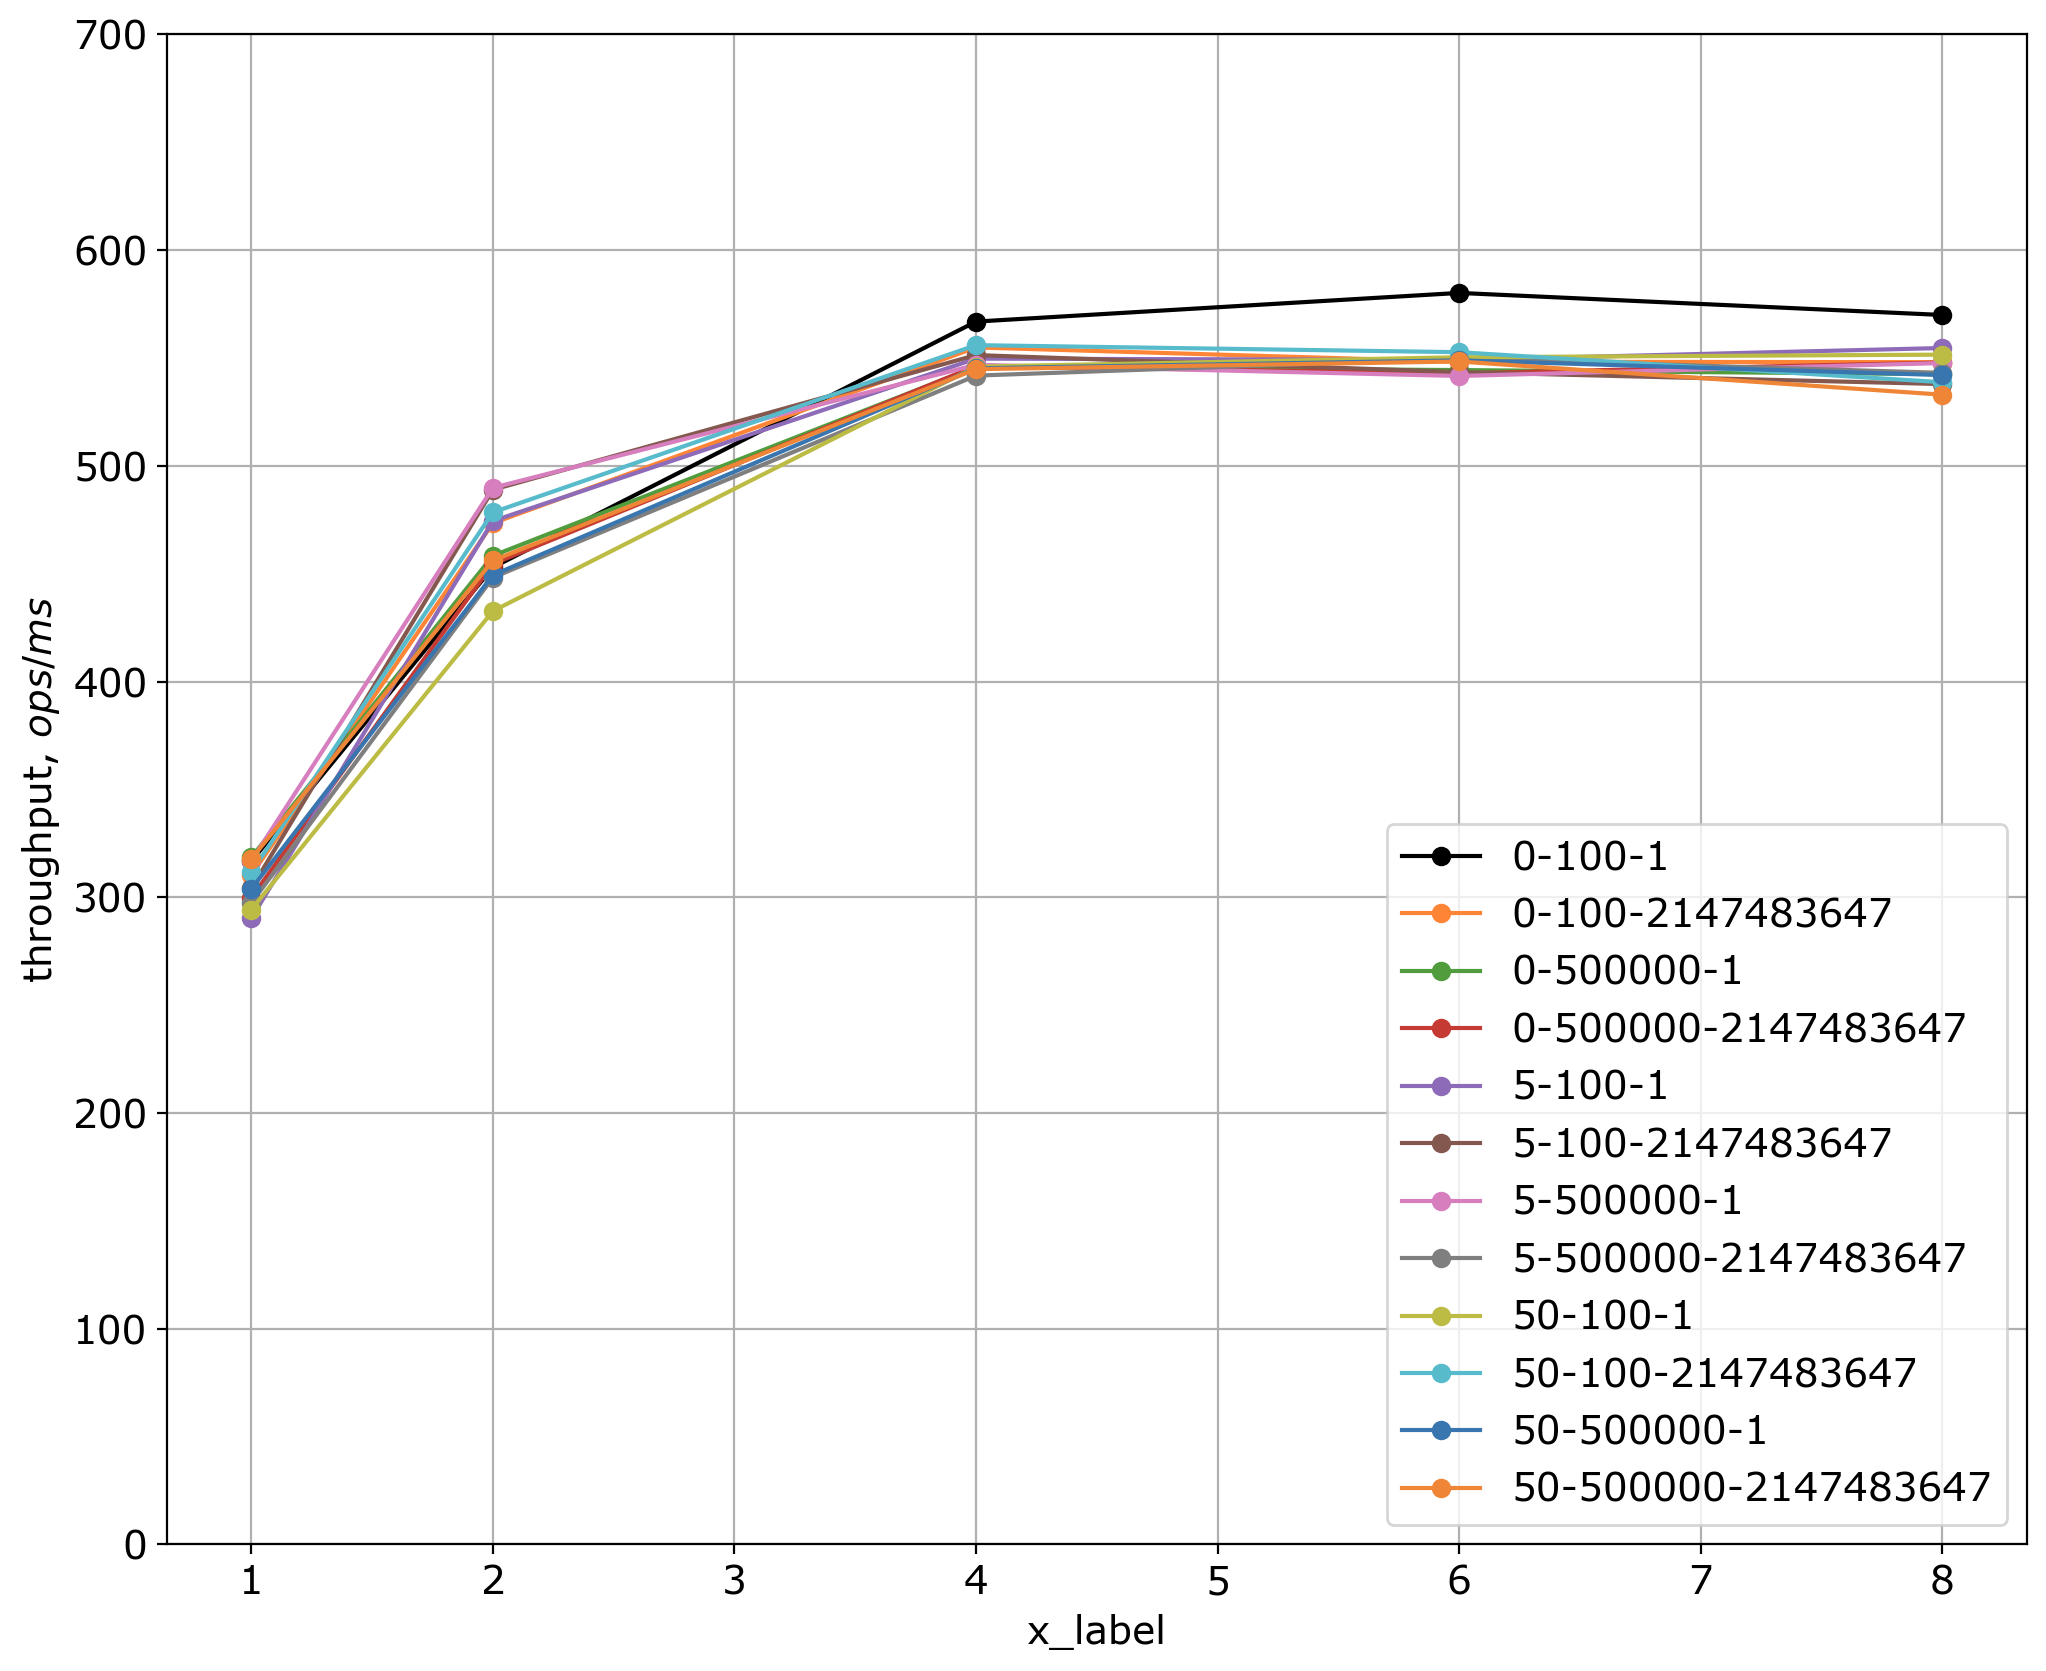

In [289]:
plot_salsa_equal_cons_dist(df, 1, types, colors, 0, 700)

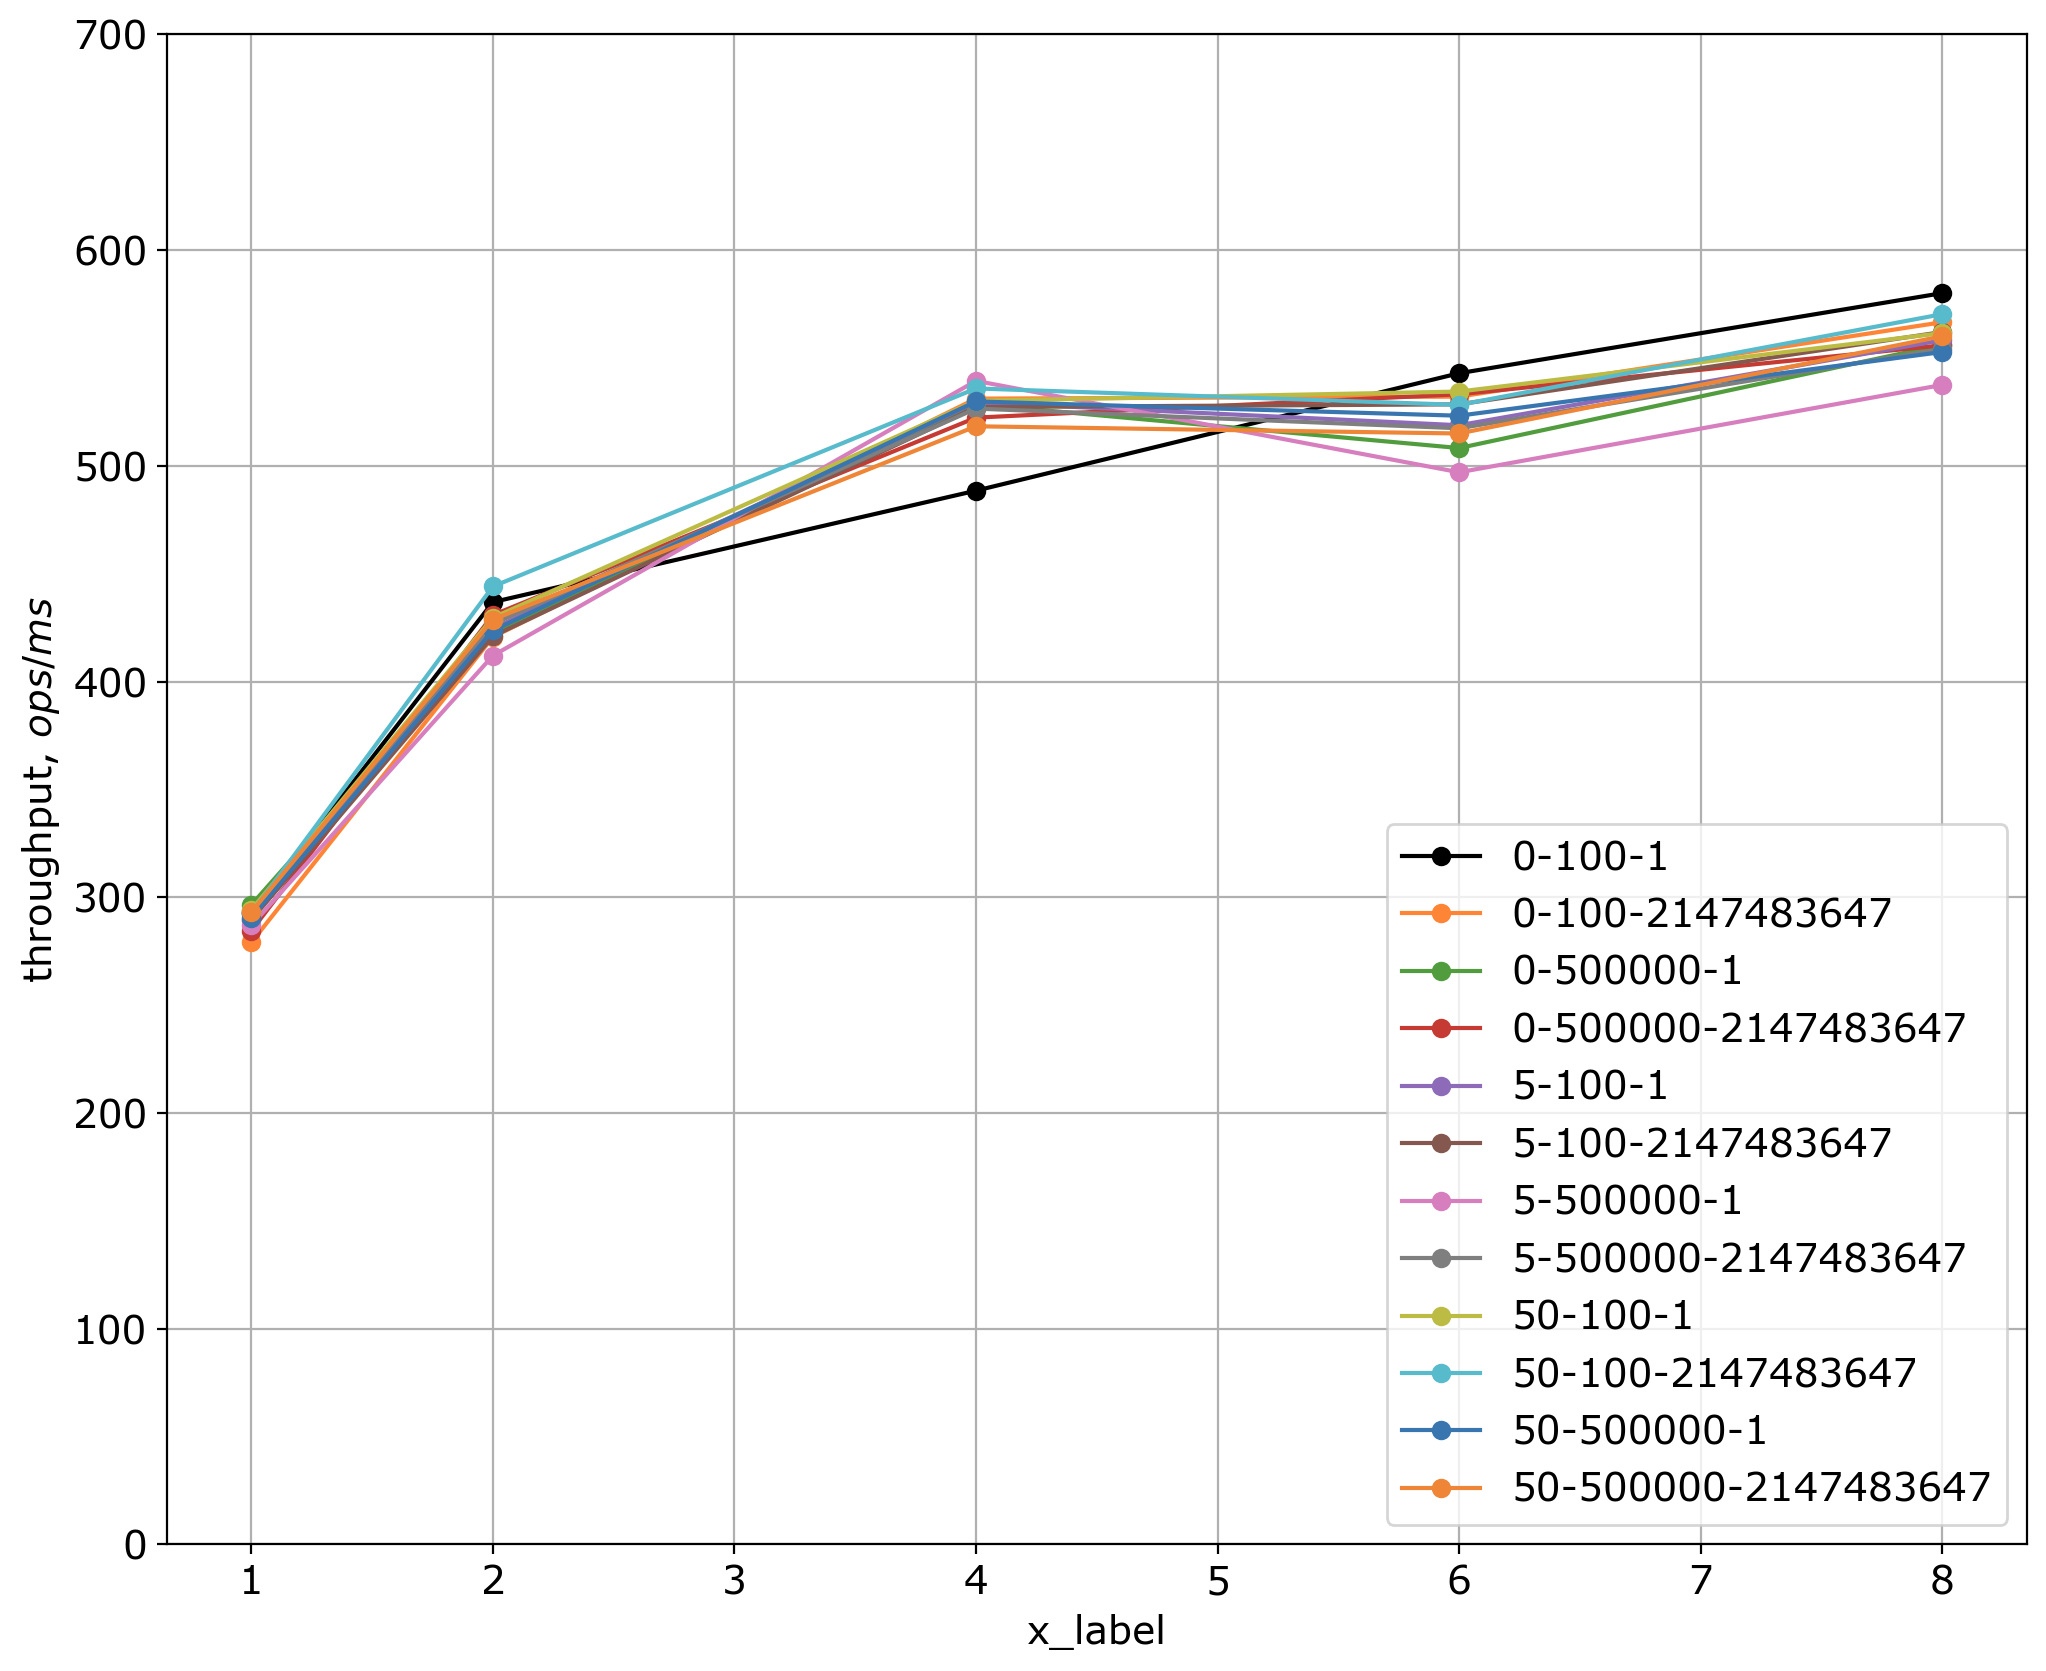

In [290]:
plot_salsa_equal_cons_dist(df, 2, types, colors, 0, 700)

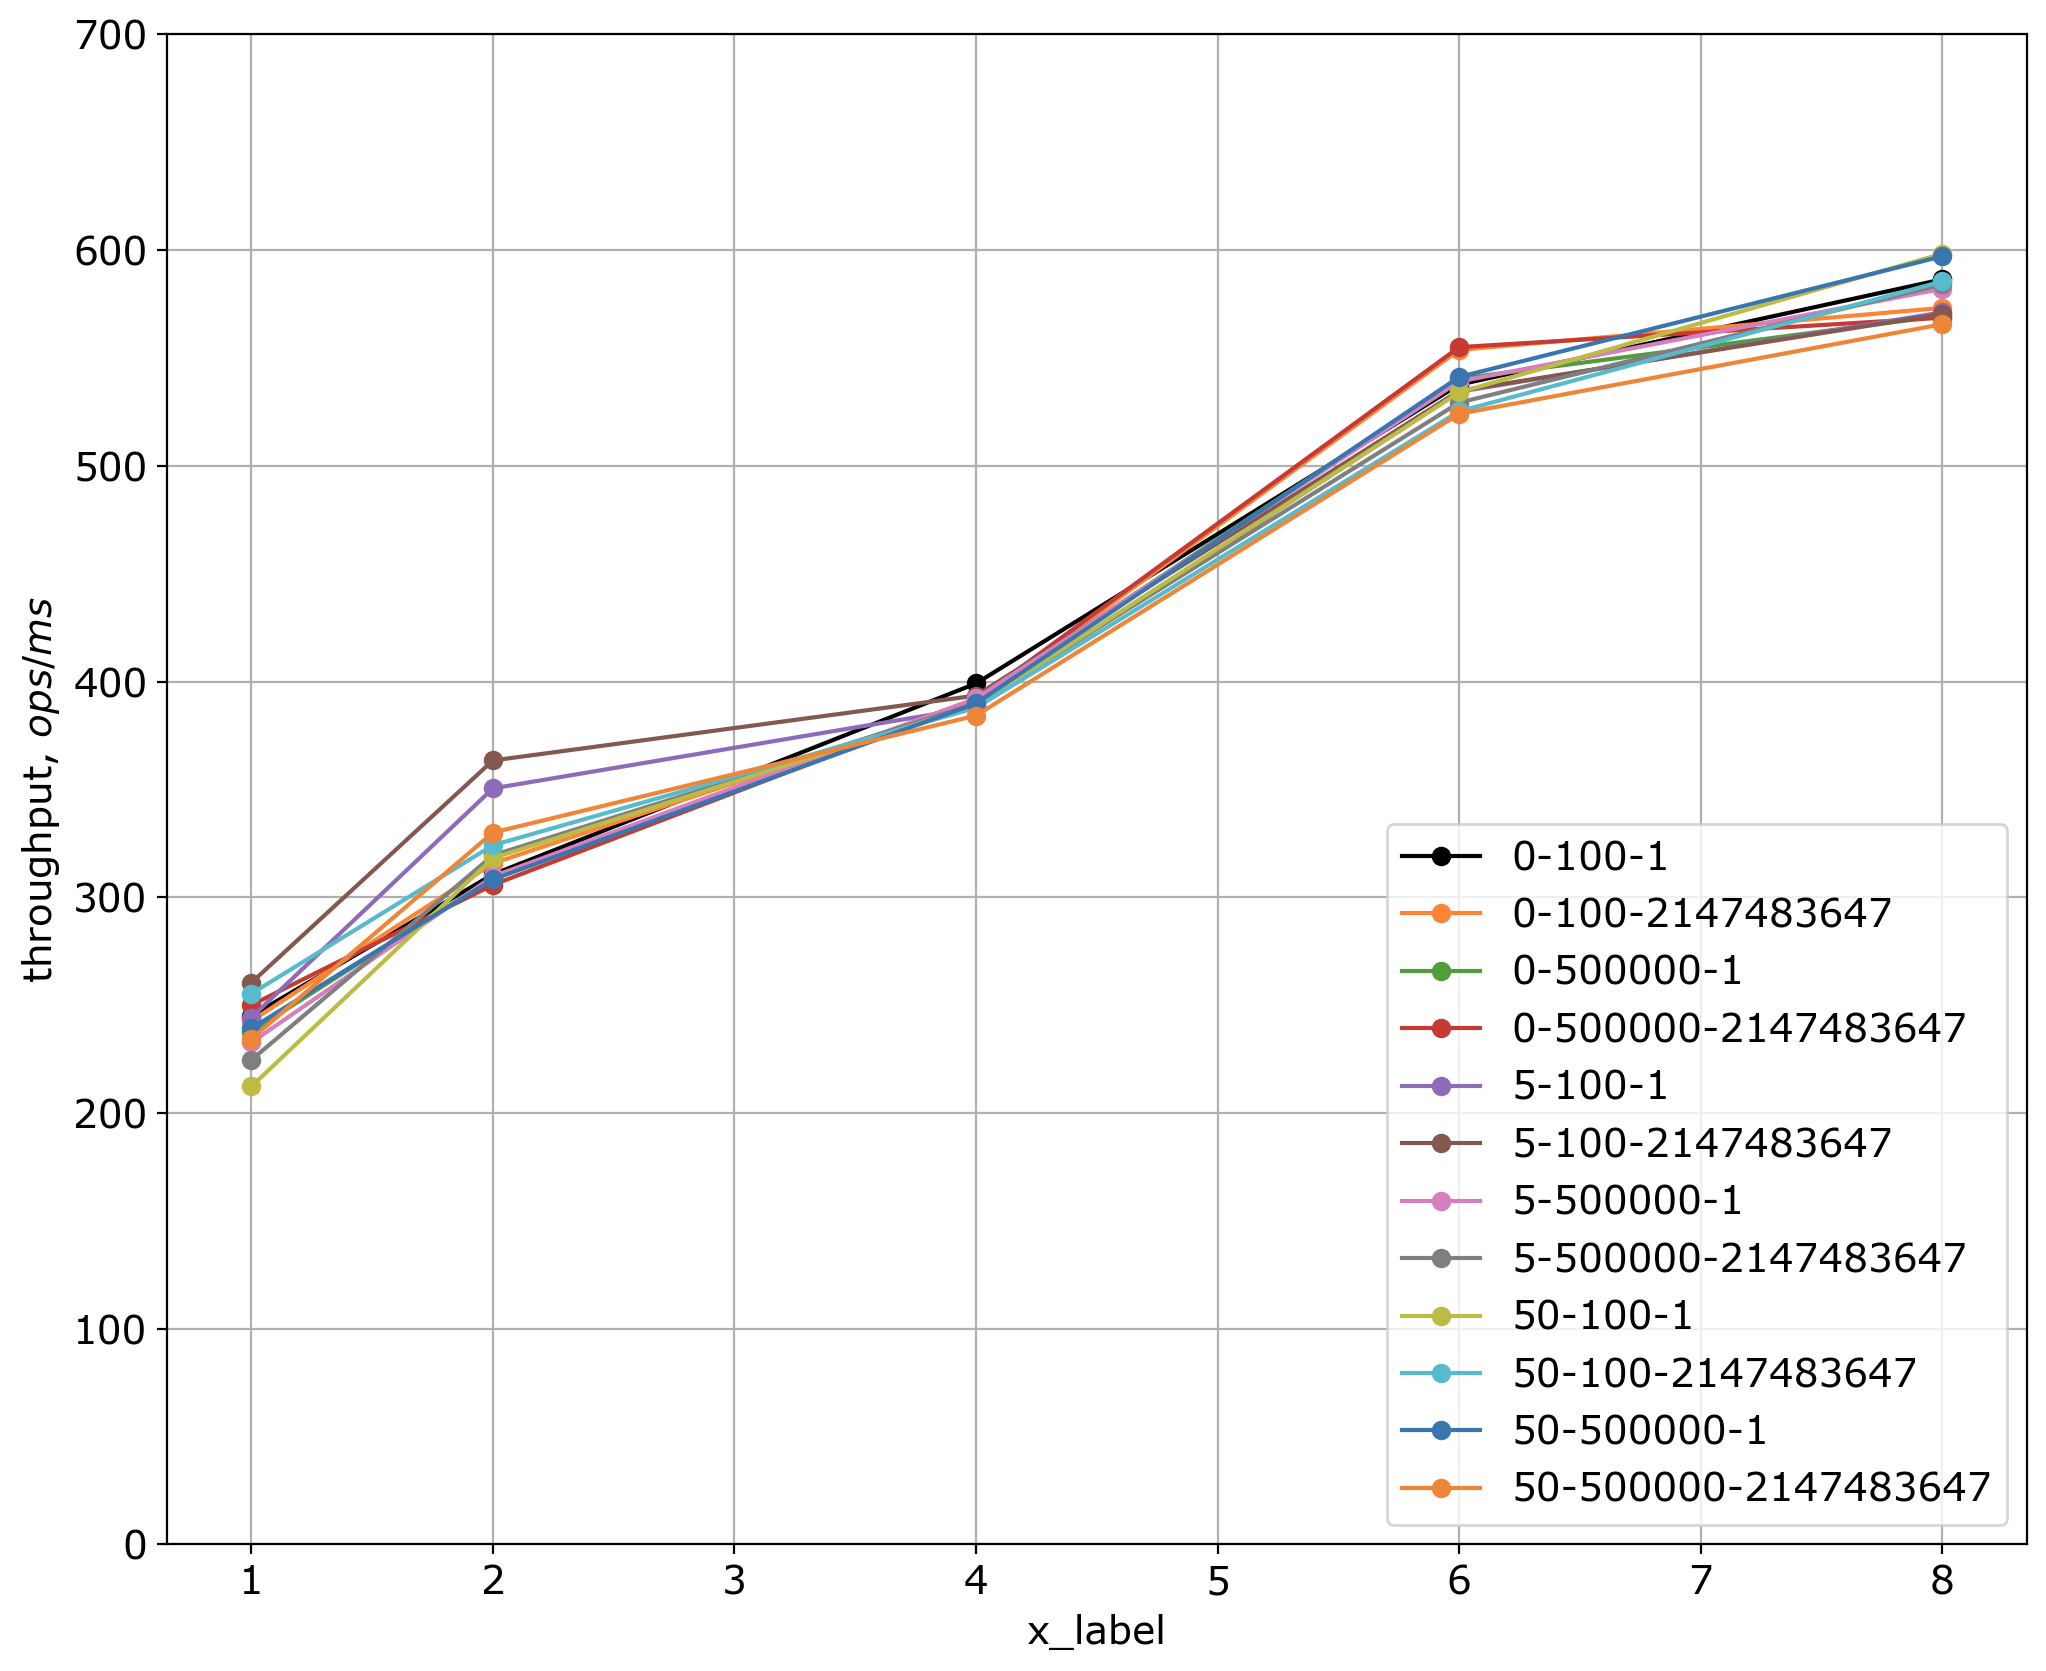

In [291]:
plot_salsa_equal_cons_dist(df, 4, types, colors, 0, 700)

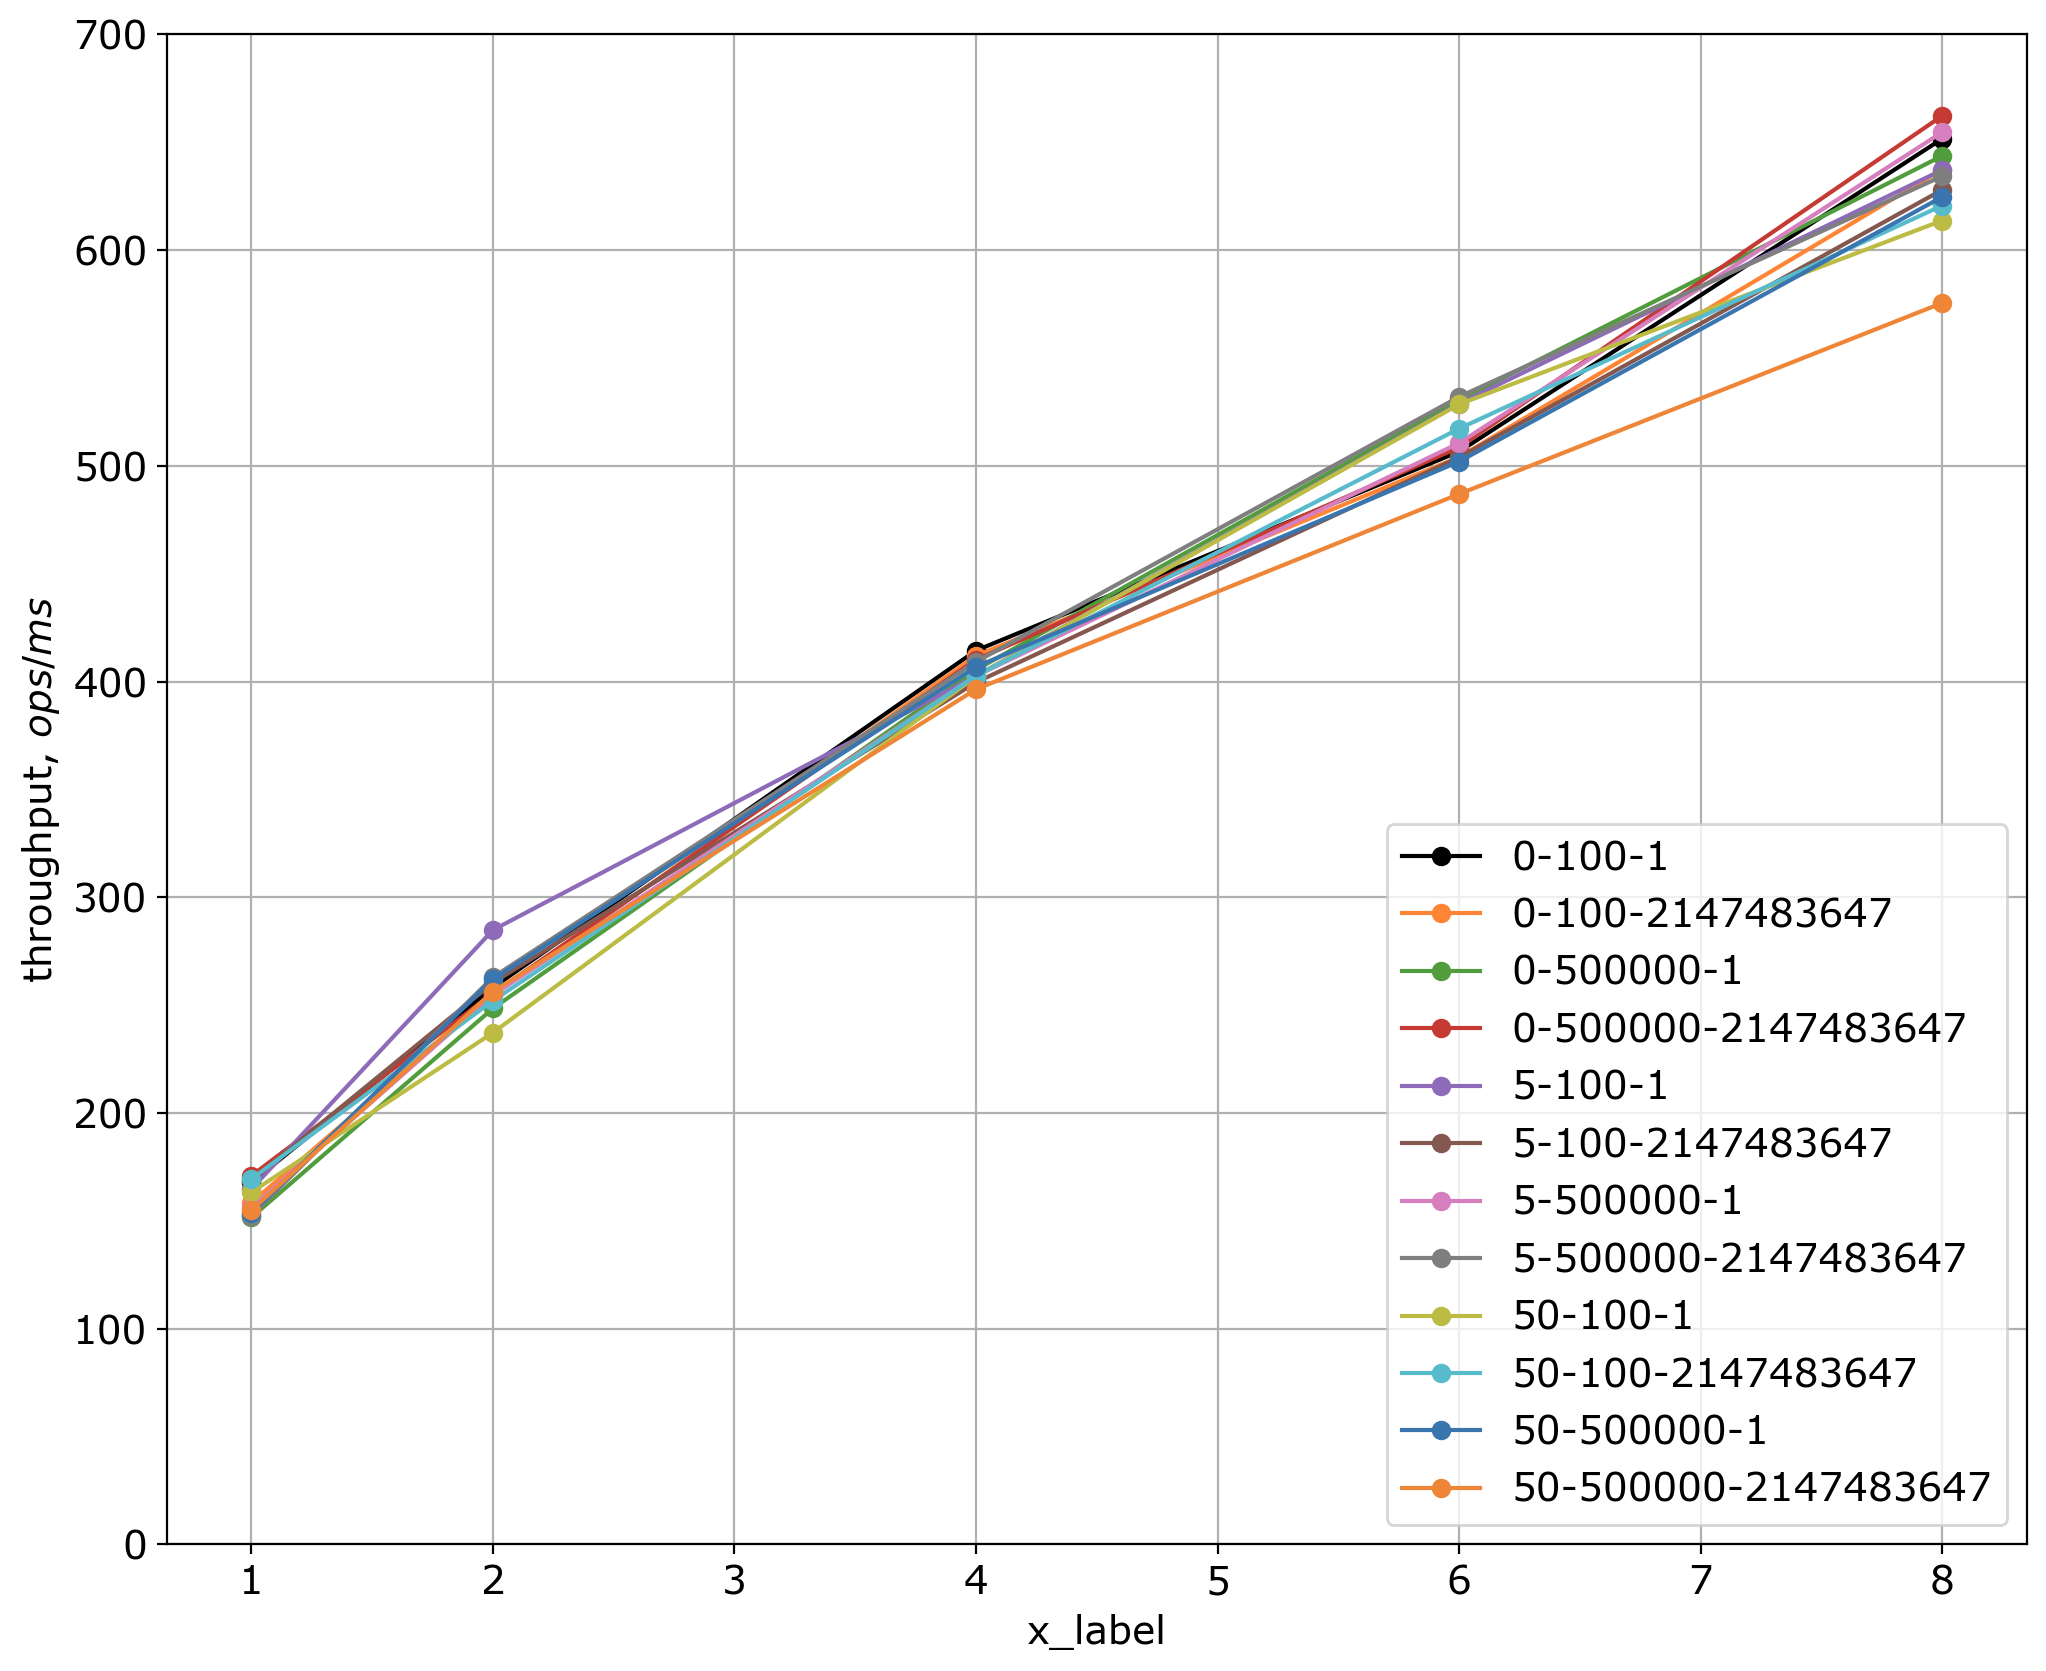

In [292]:
plot_salsa_equal_cons_dist(df, 6, types, colors, 0, 700)

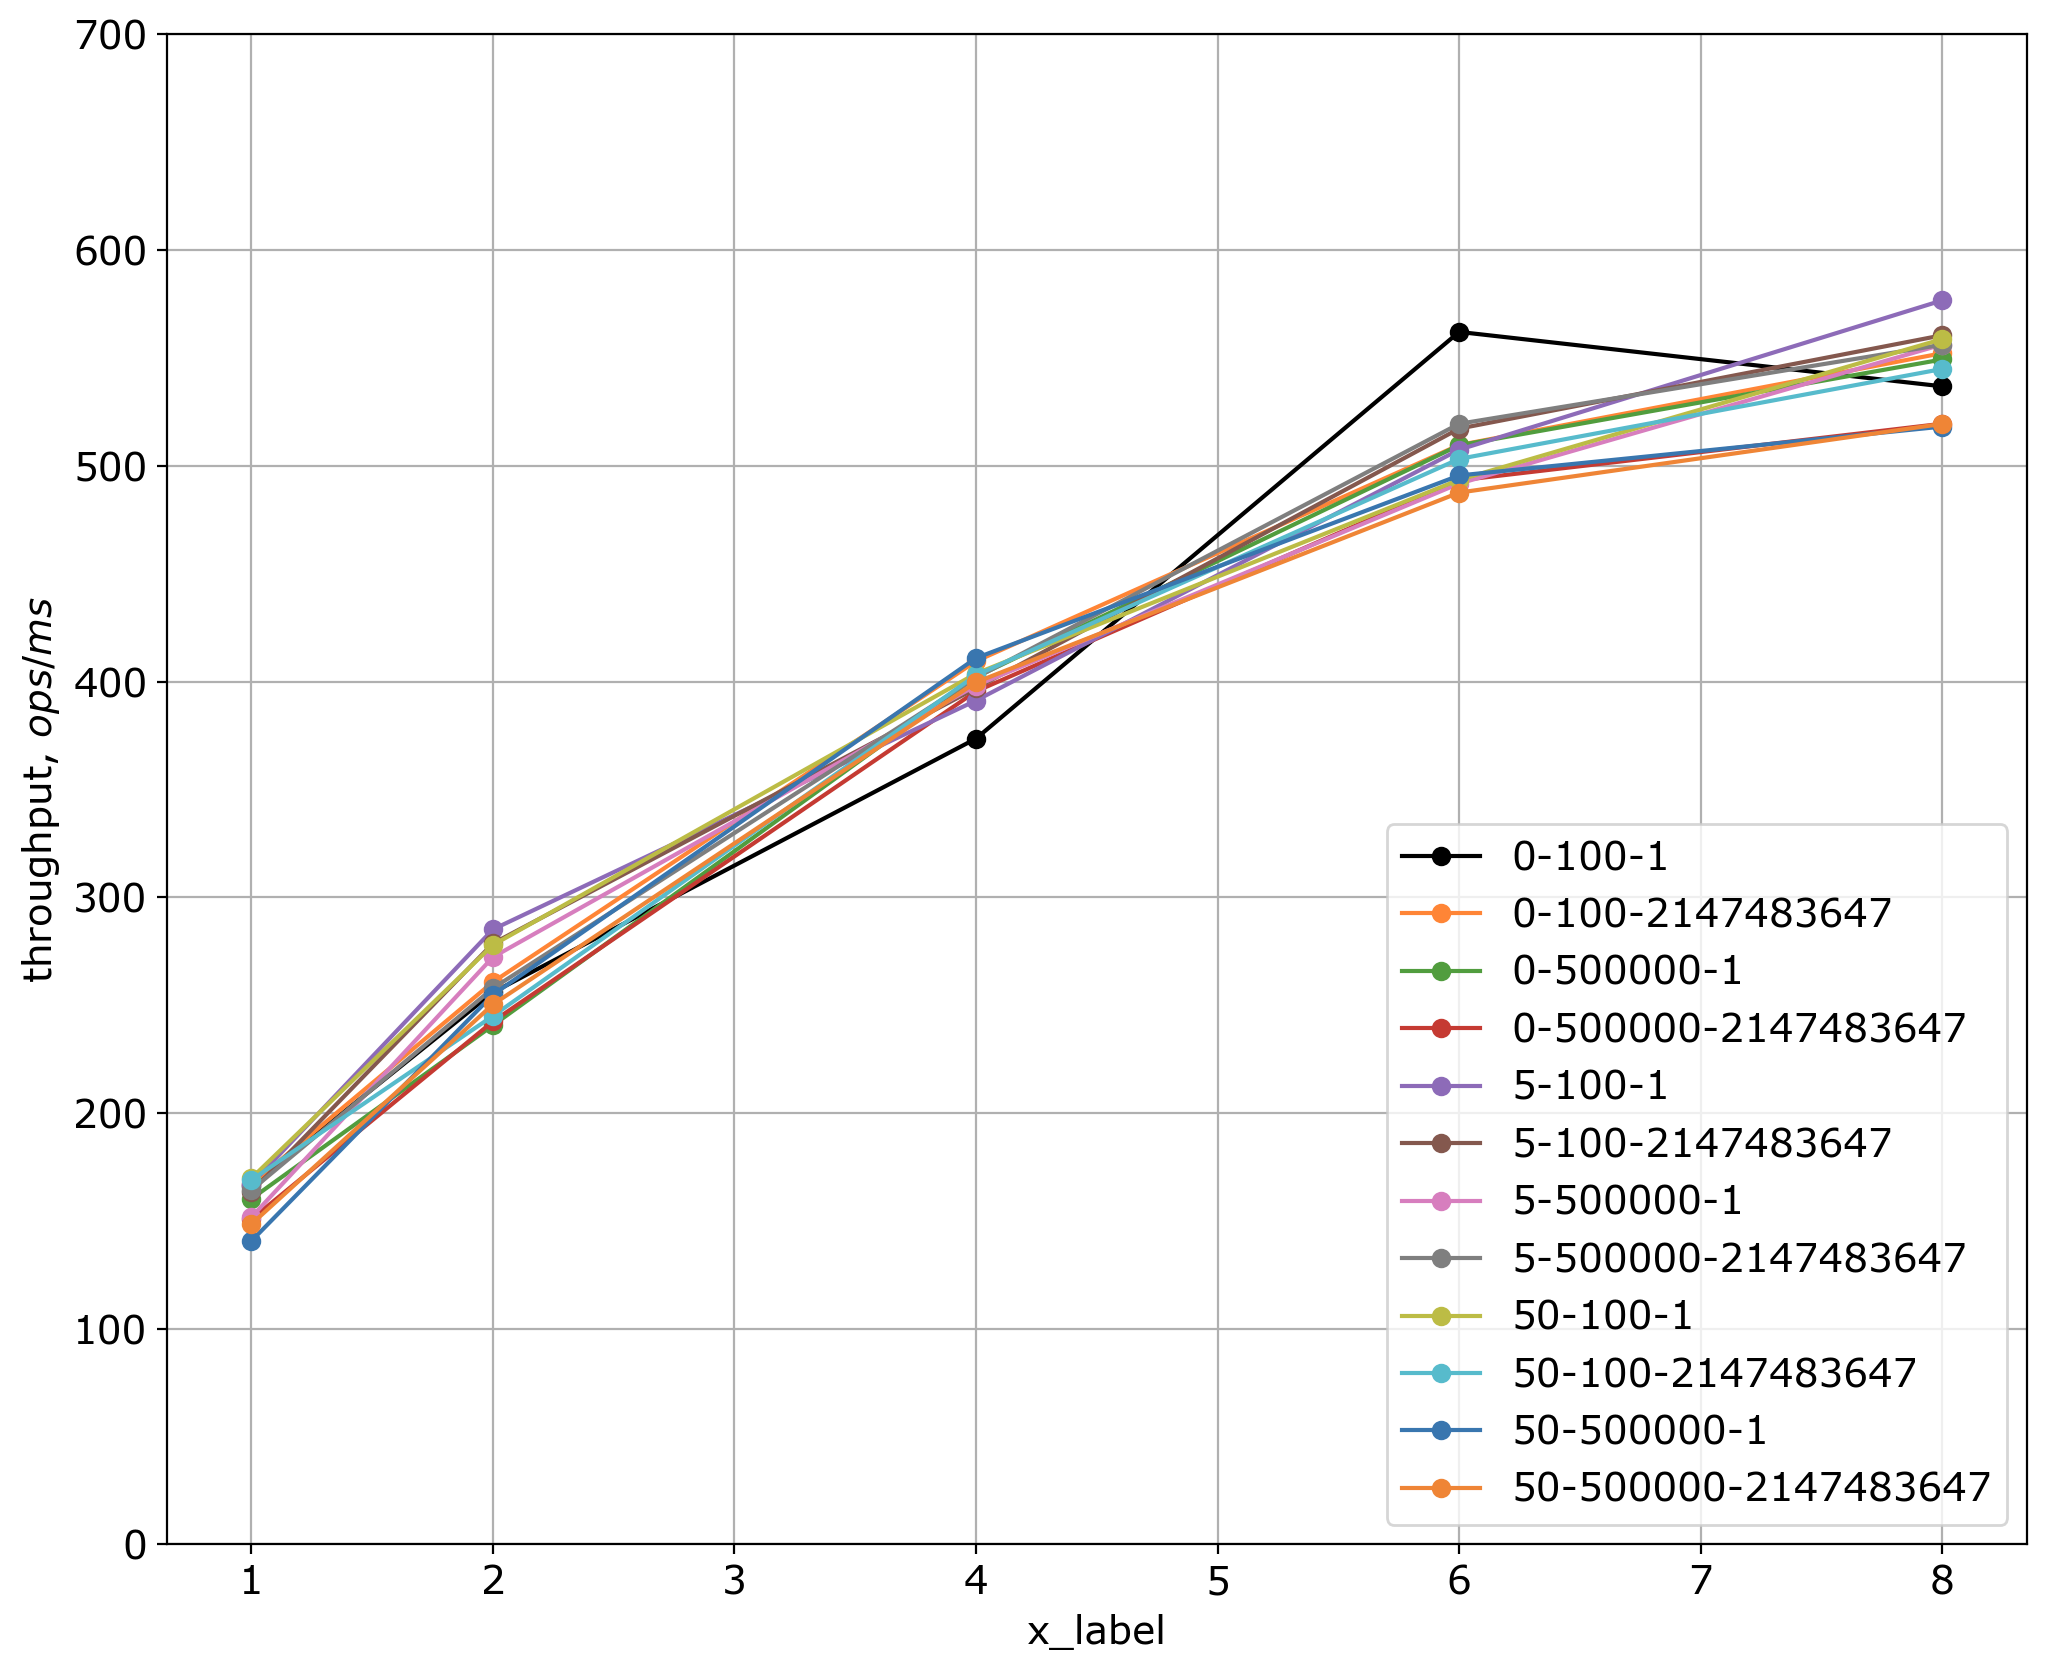

In [293]:
plot_salsa_equal_cons_dist(df, 8, types, colors, 0, 700)

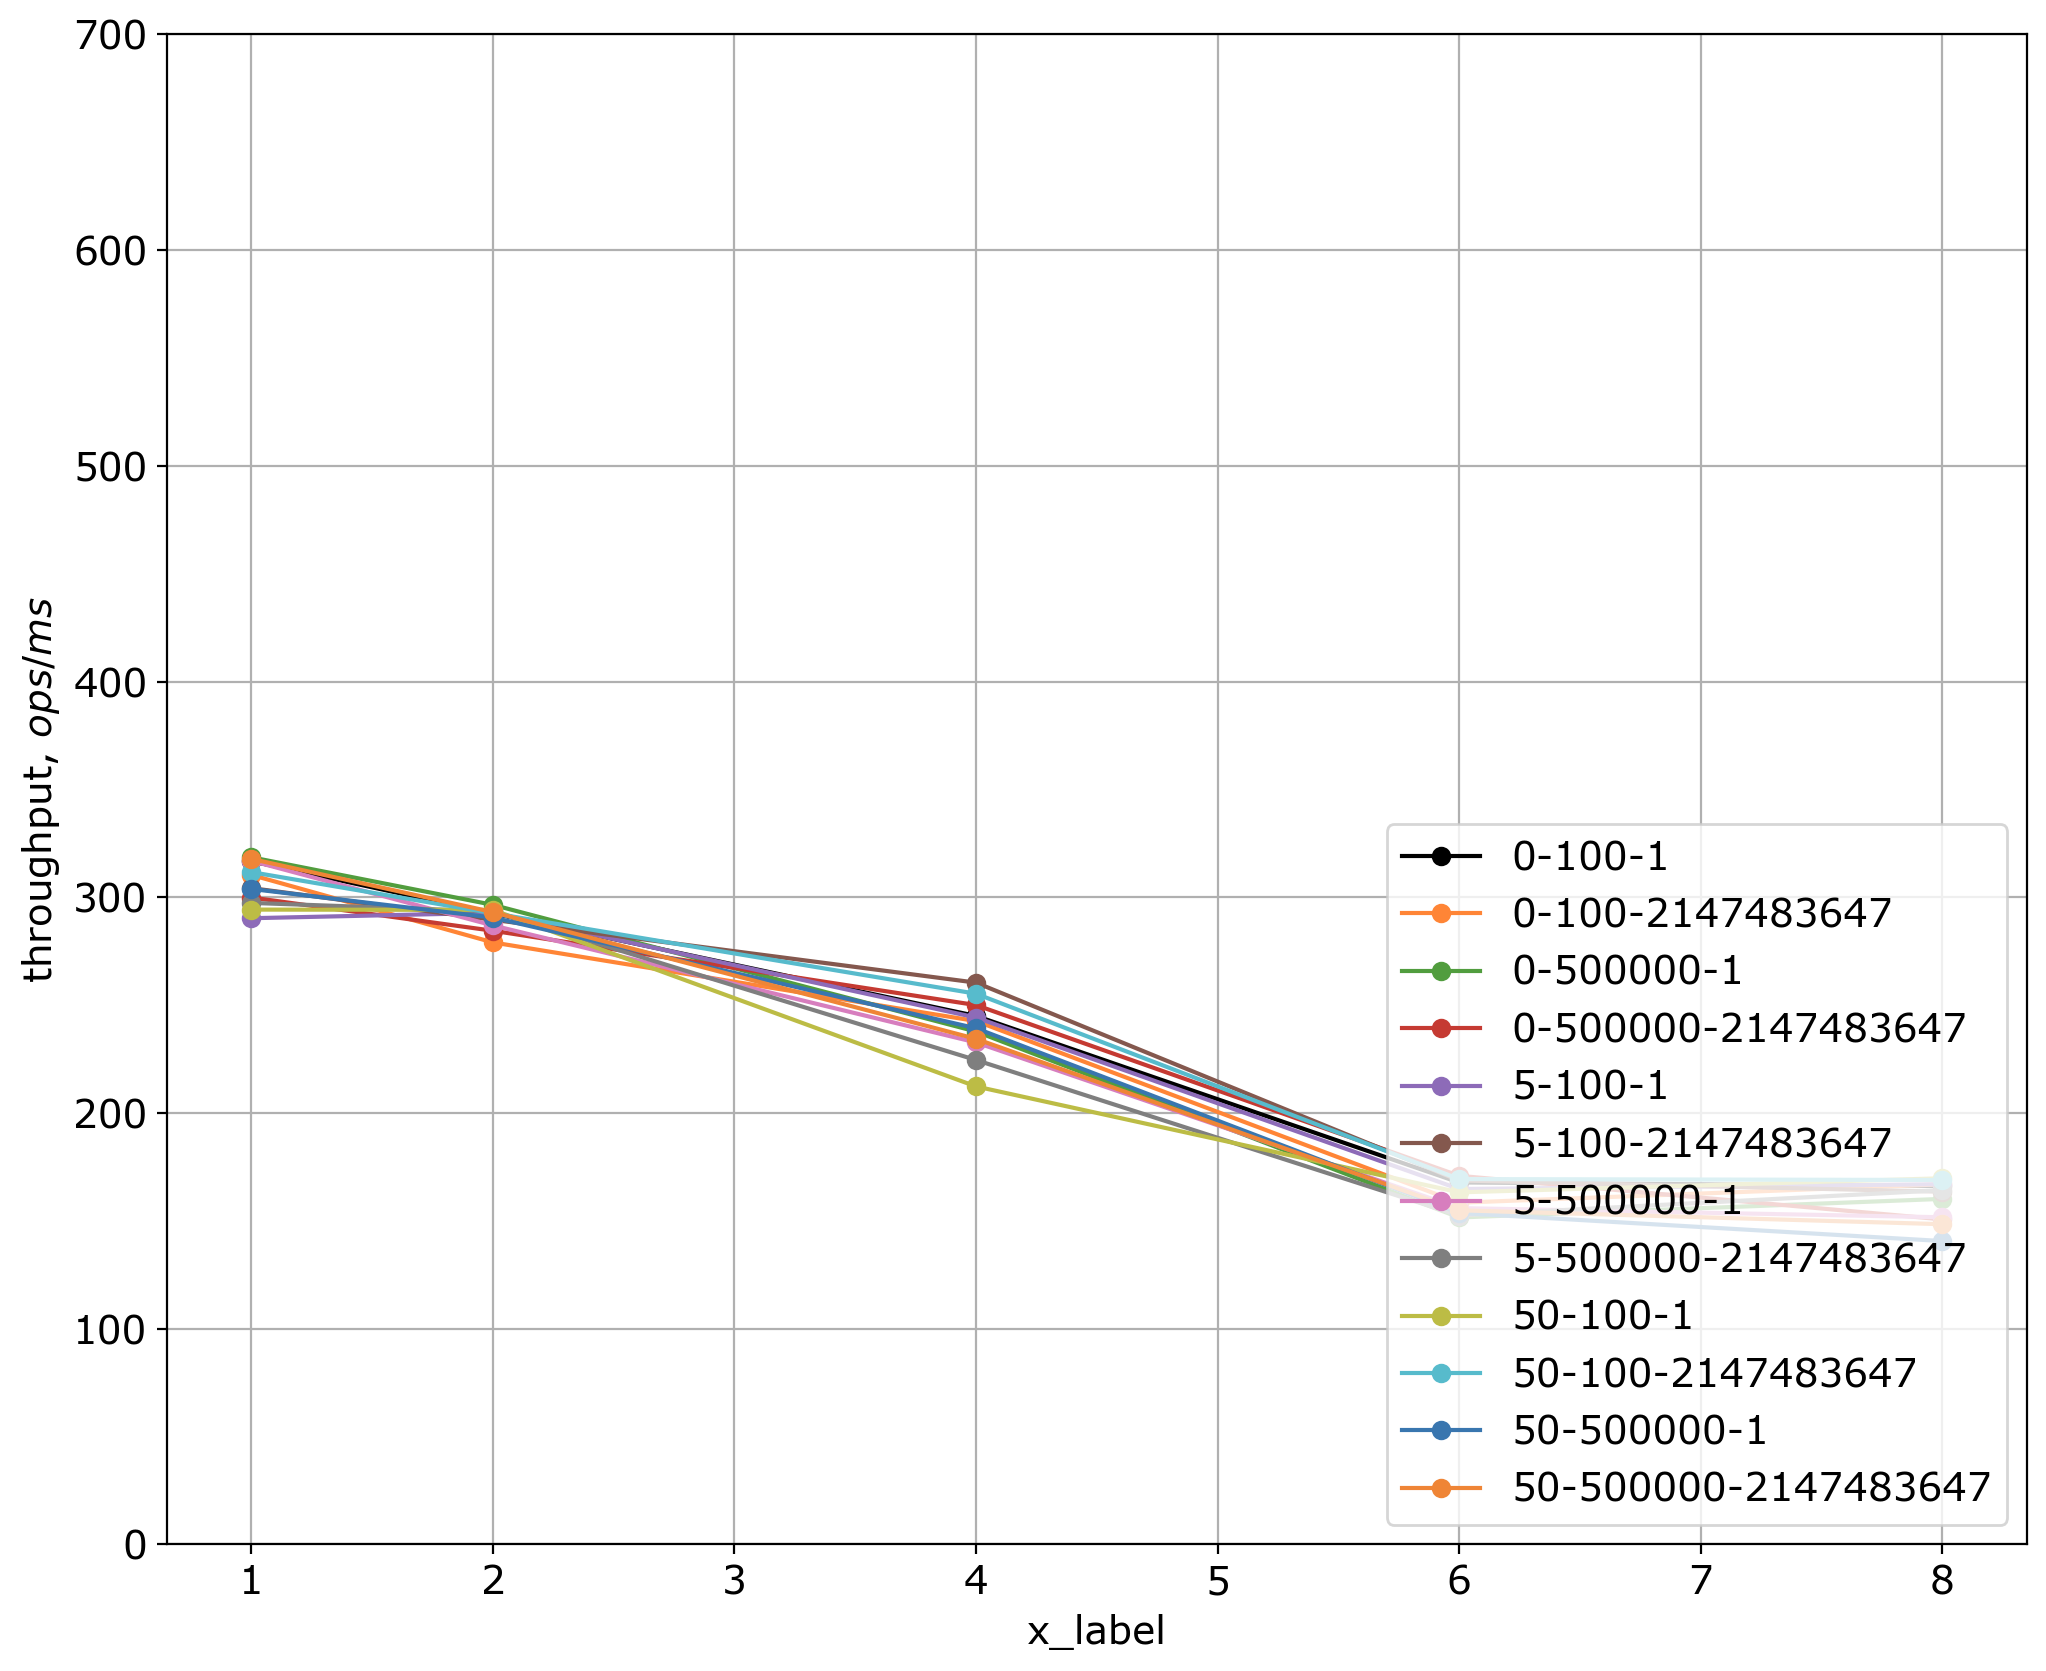

In [294]:
plot_salsa_equal_prod_dist(df, 1, types, colors, 0, 700)

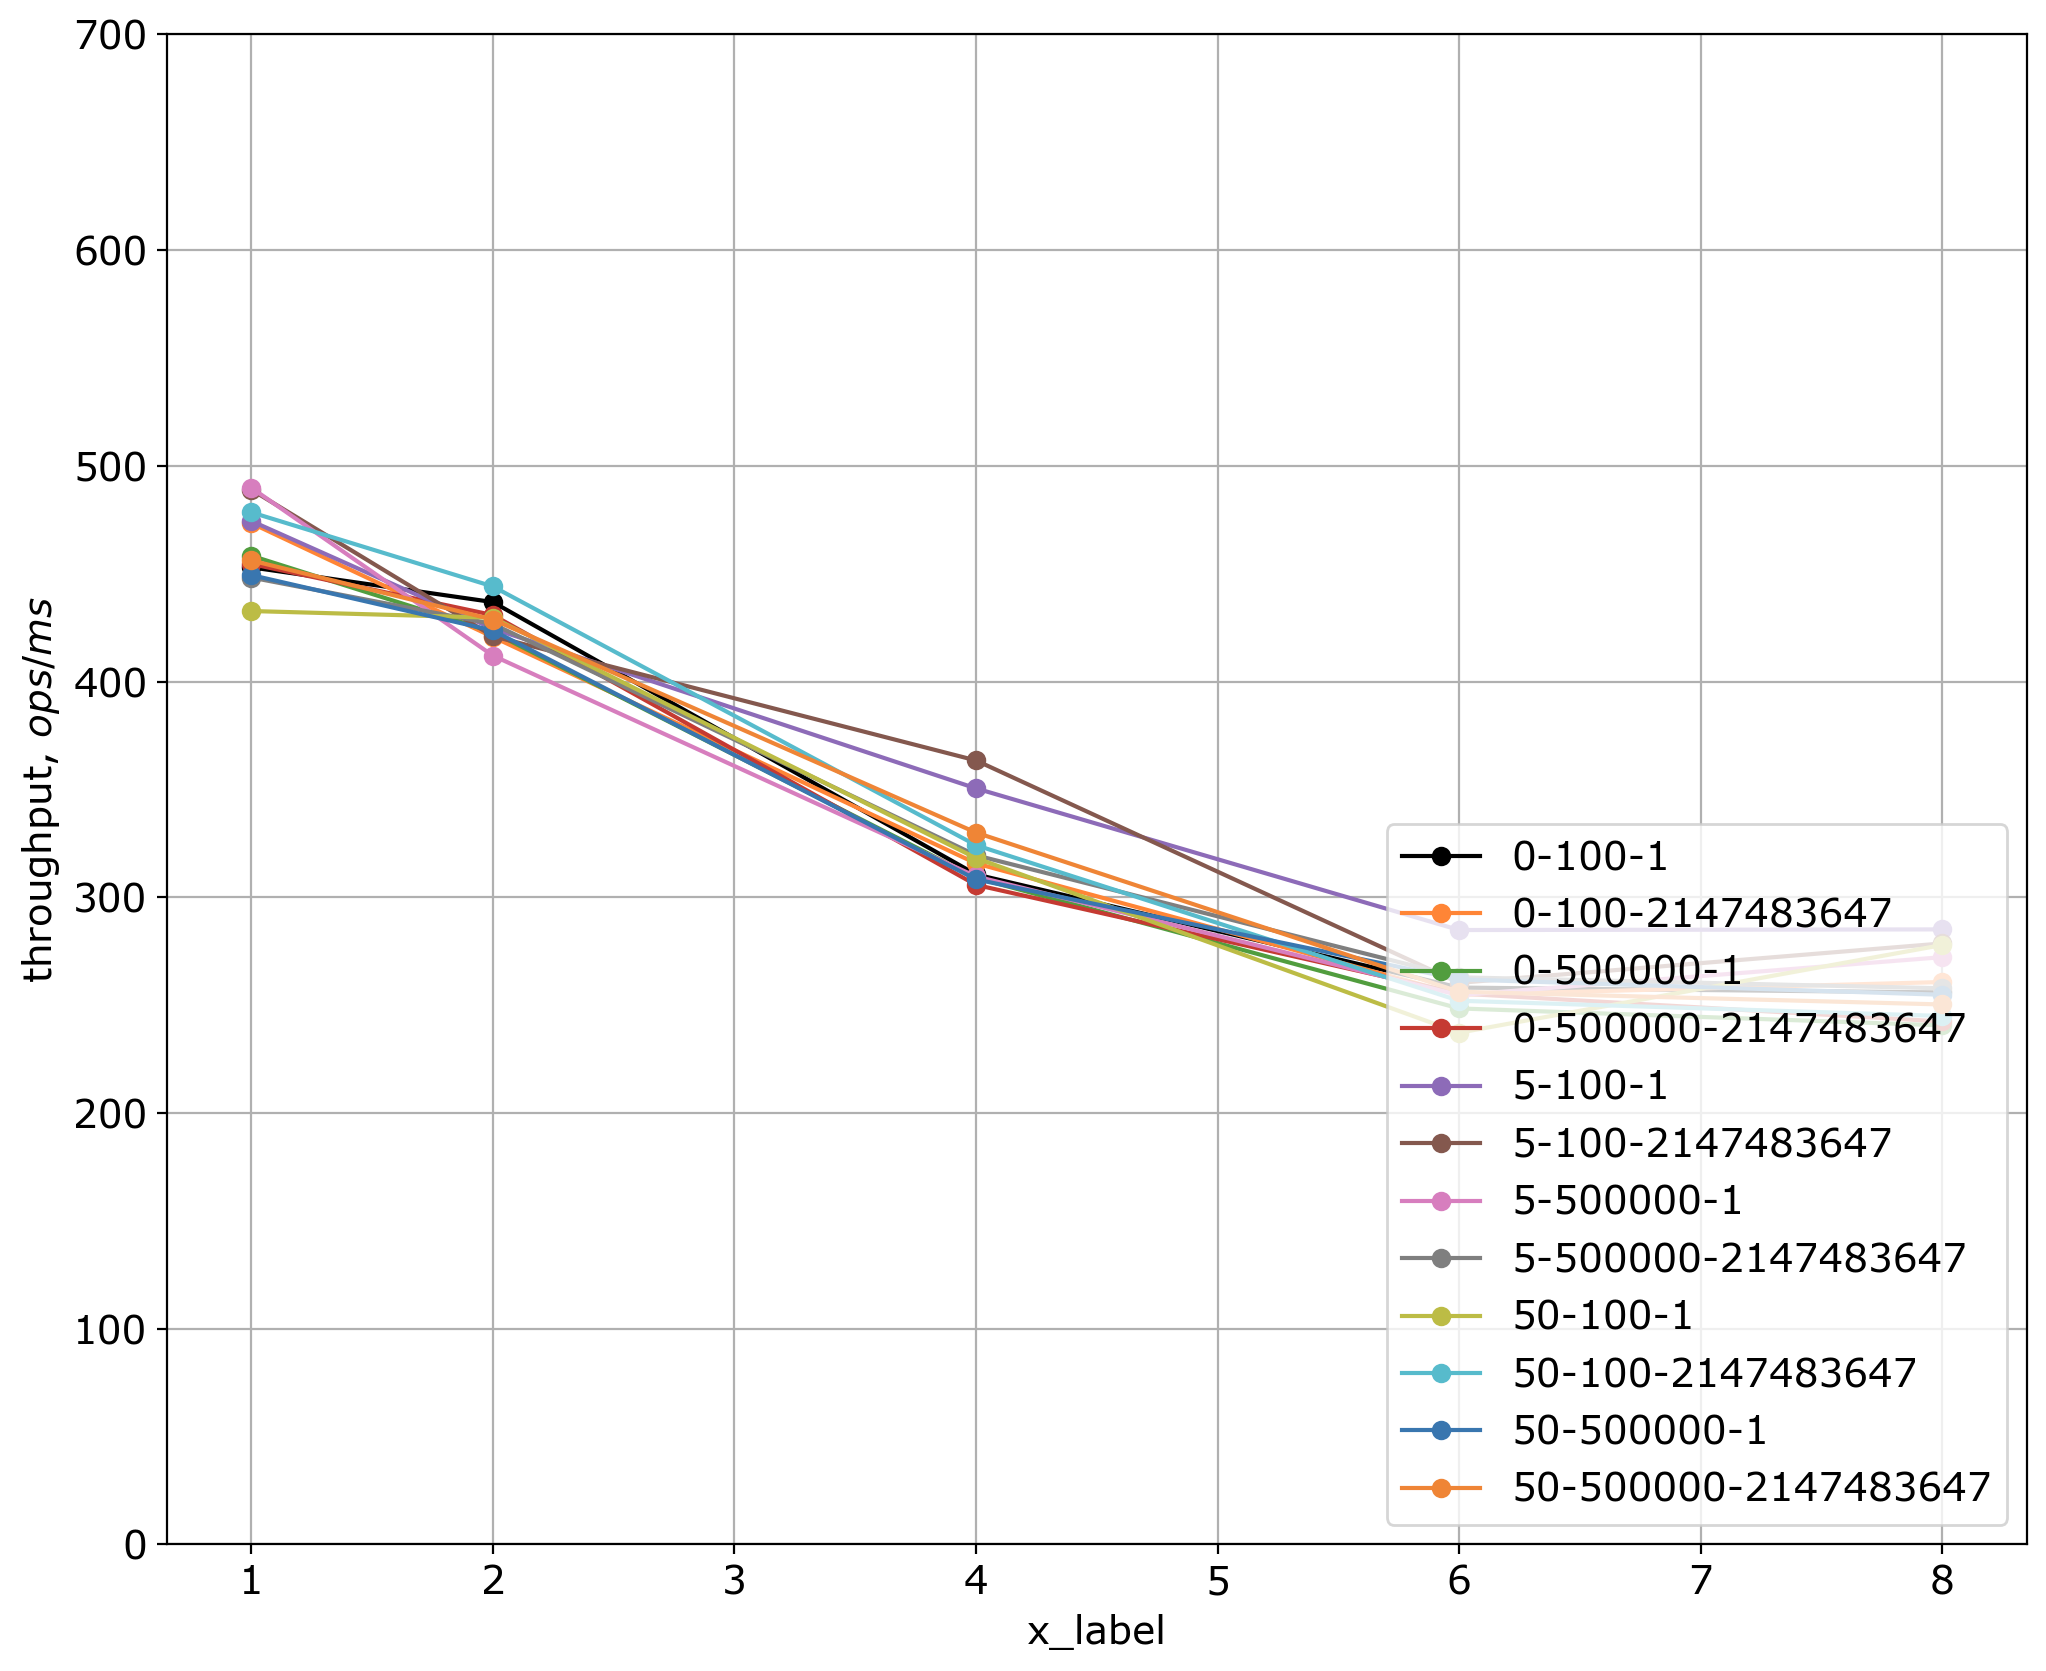

In [295]:
plot_salsa_equal_prod_dist(df, 2, types, colors, 0, 700)

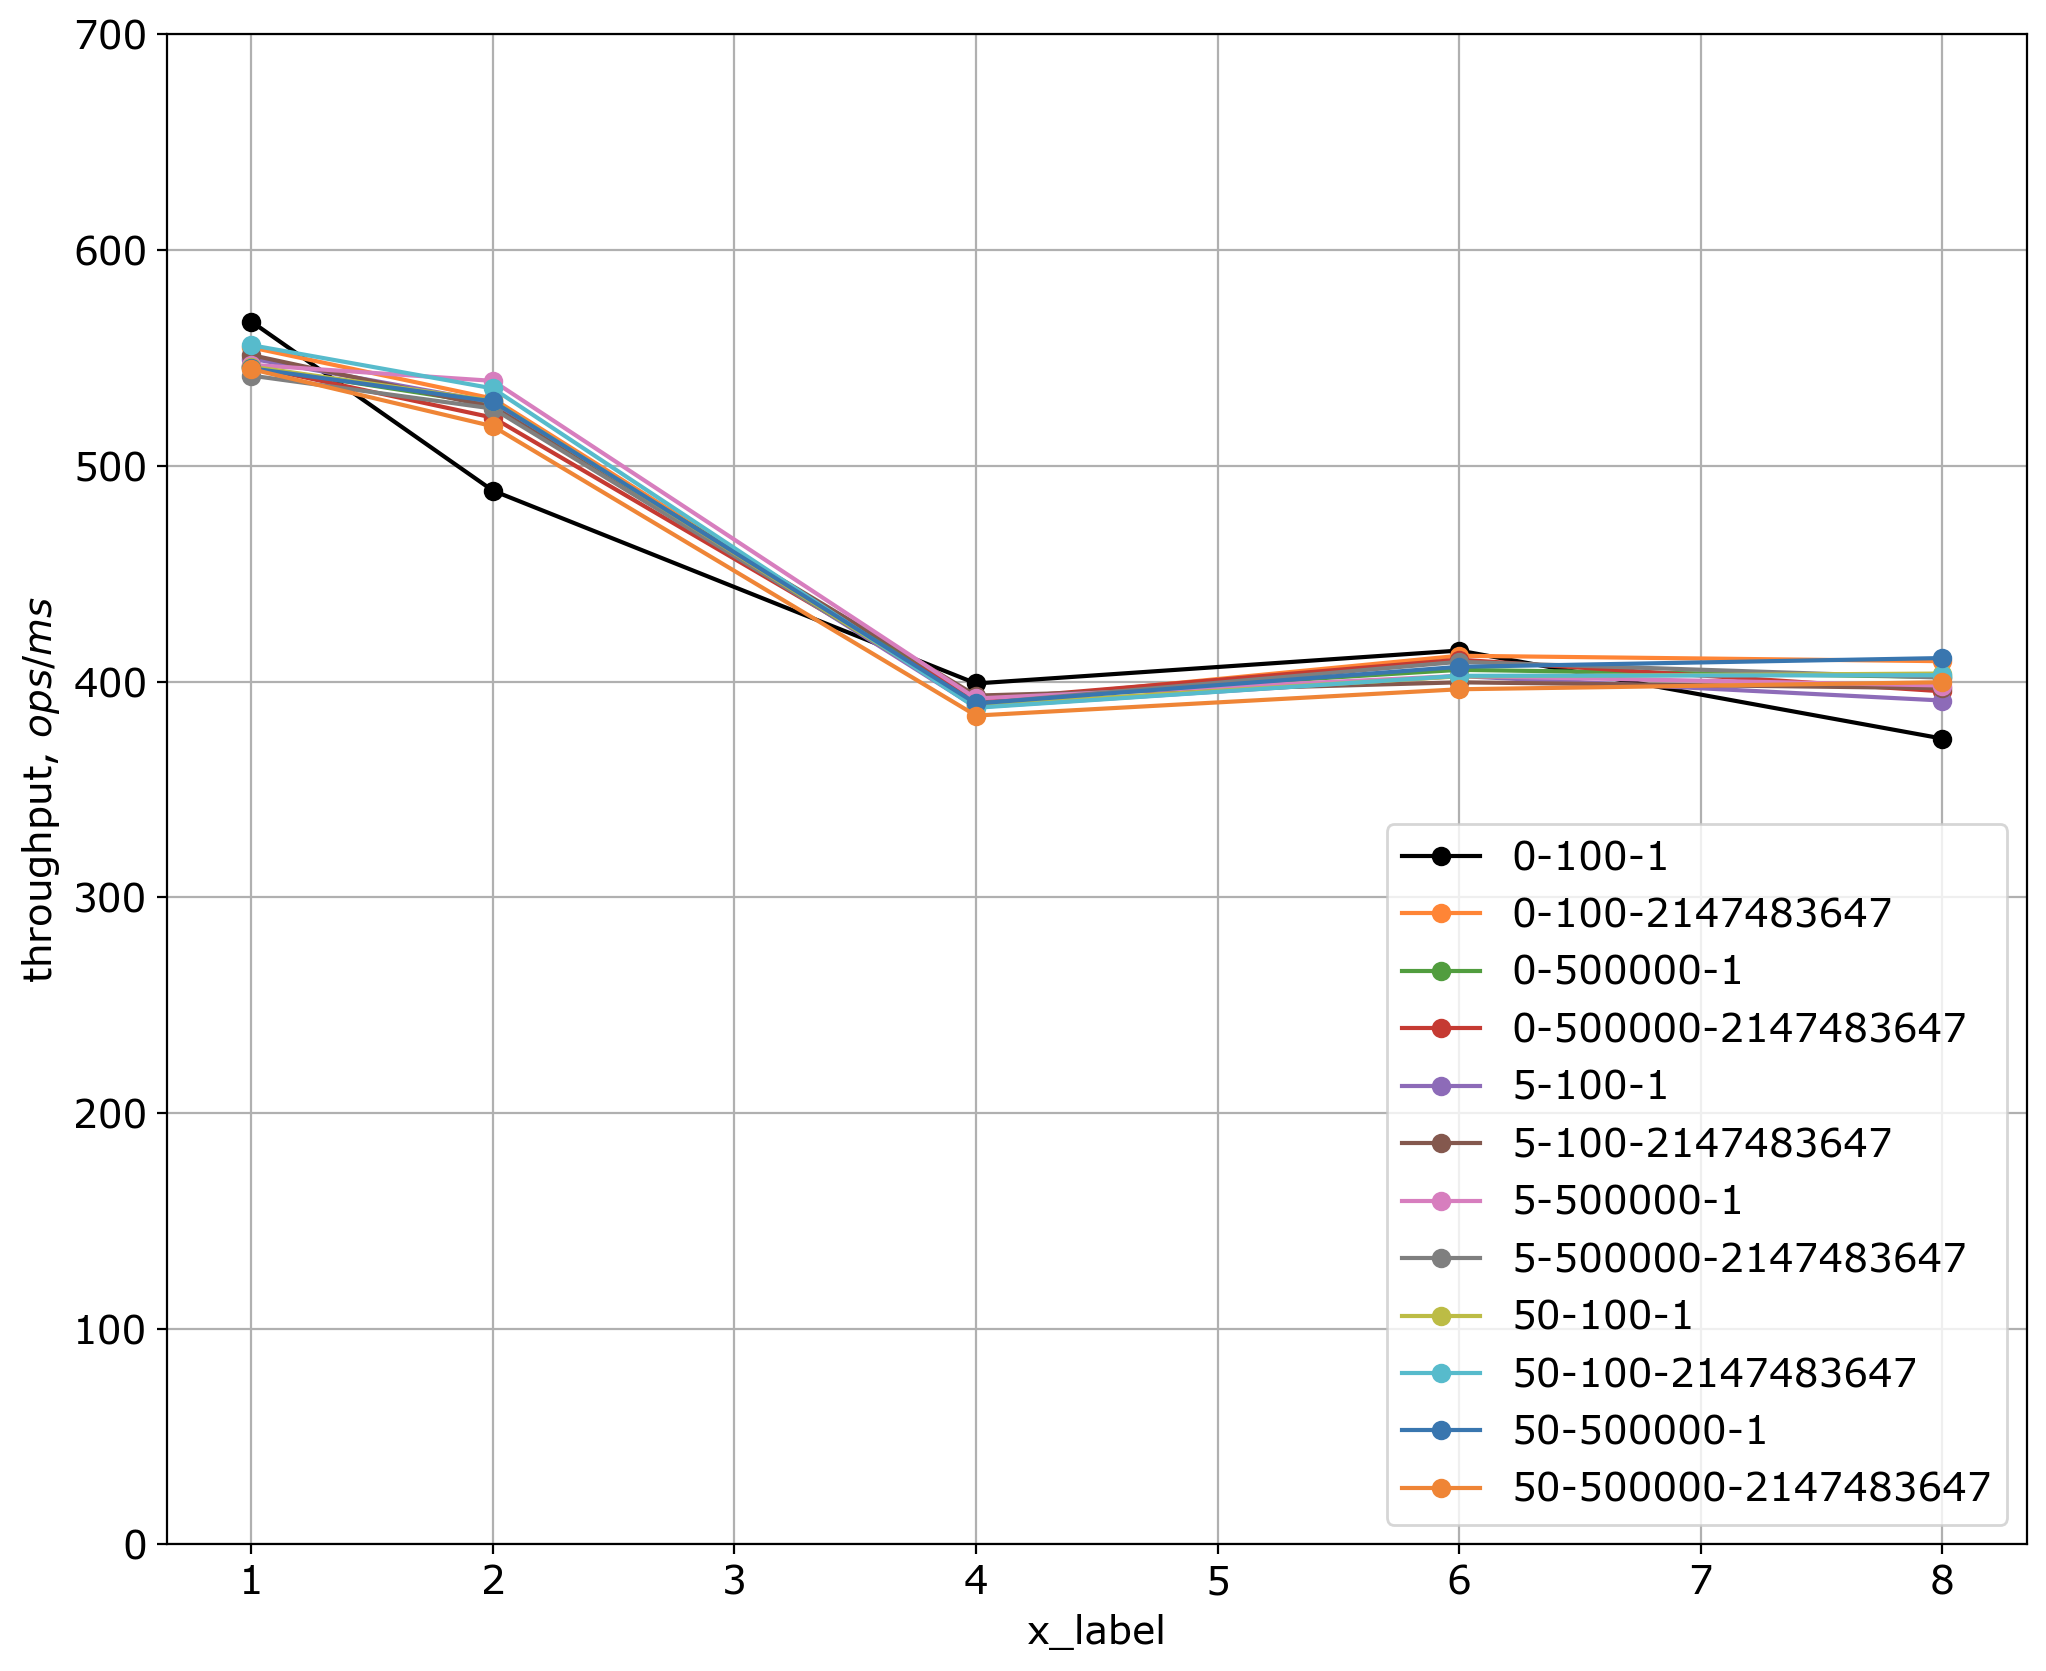

In [296]:
plot_salsa_equal_prod_dist(df, 4, types, colors, 0, 700)

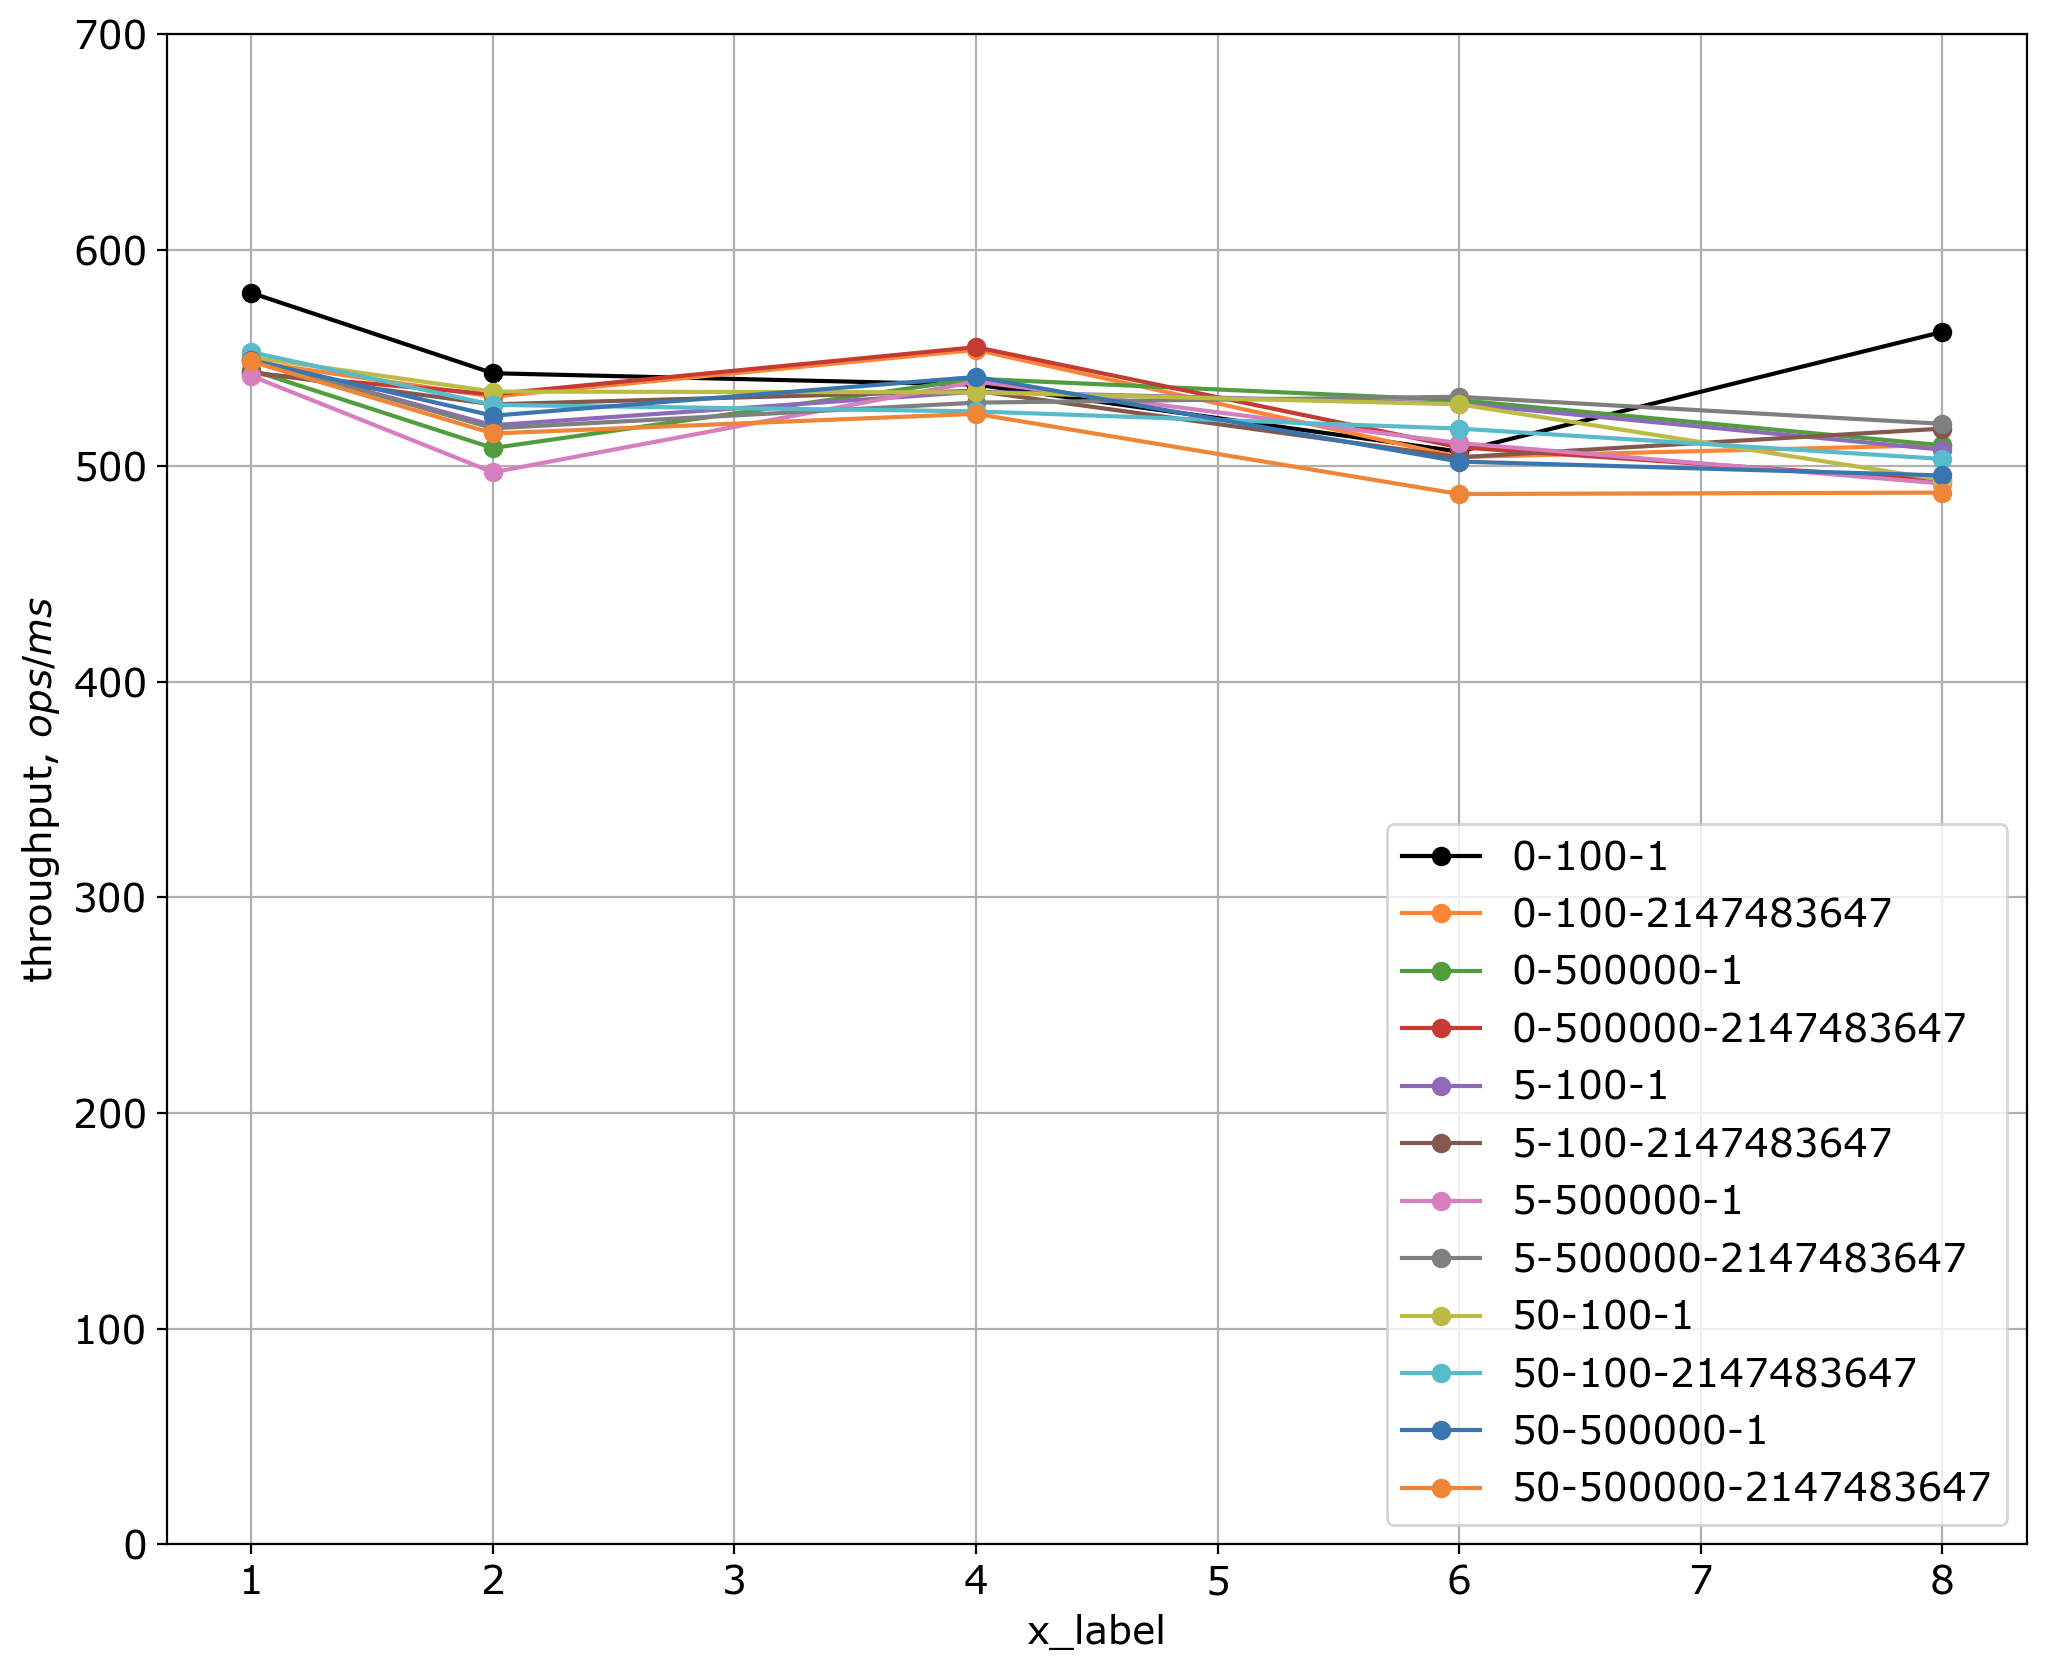

In [297]:
plot_salsa_equal_prod_dist(df, 6, types, colors, 0, 700)

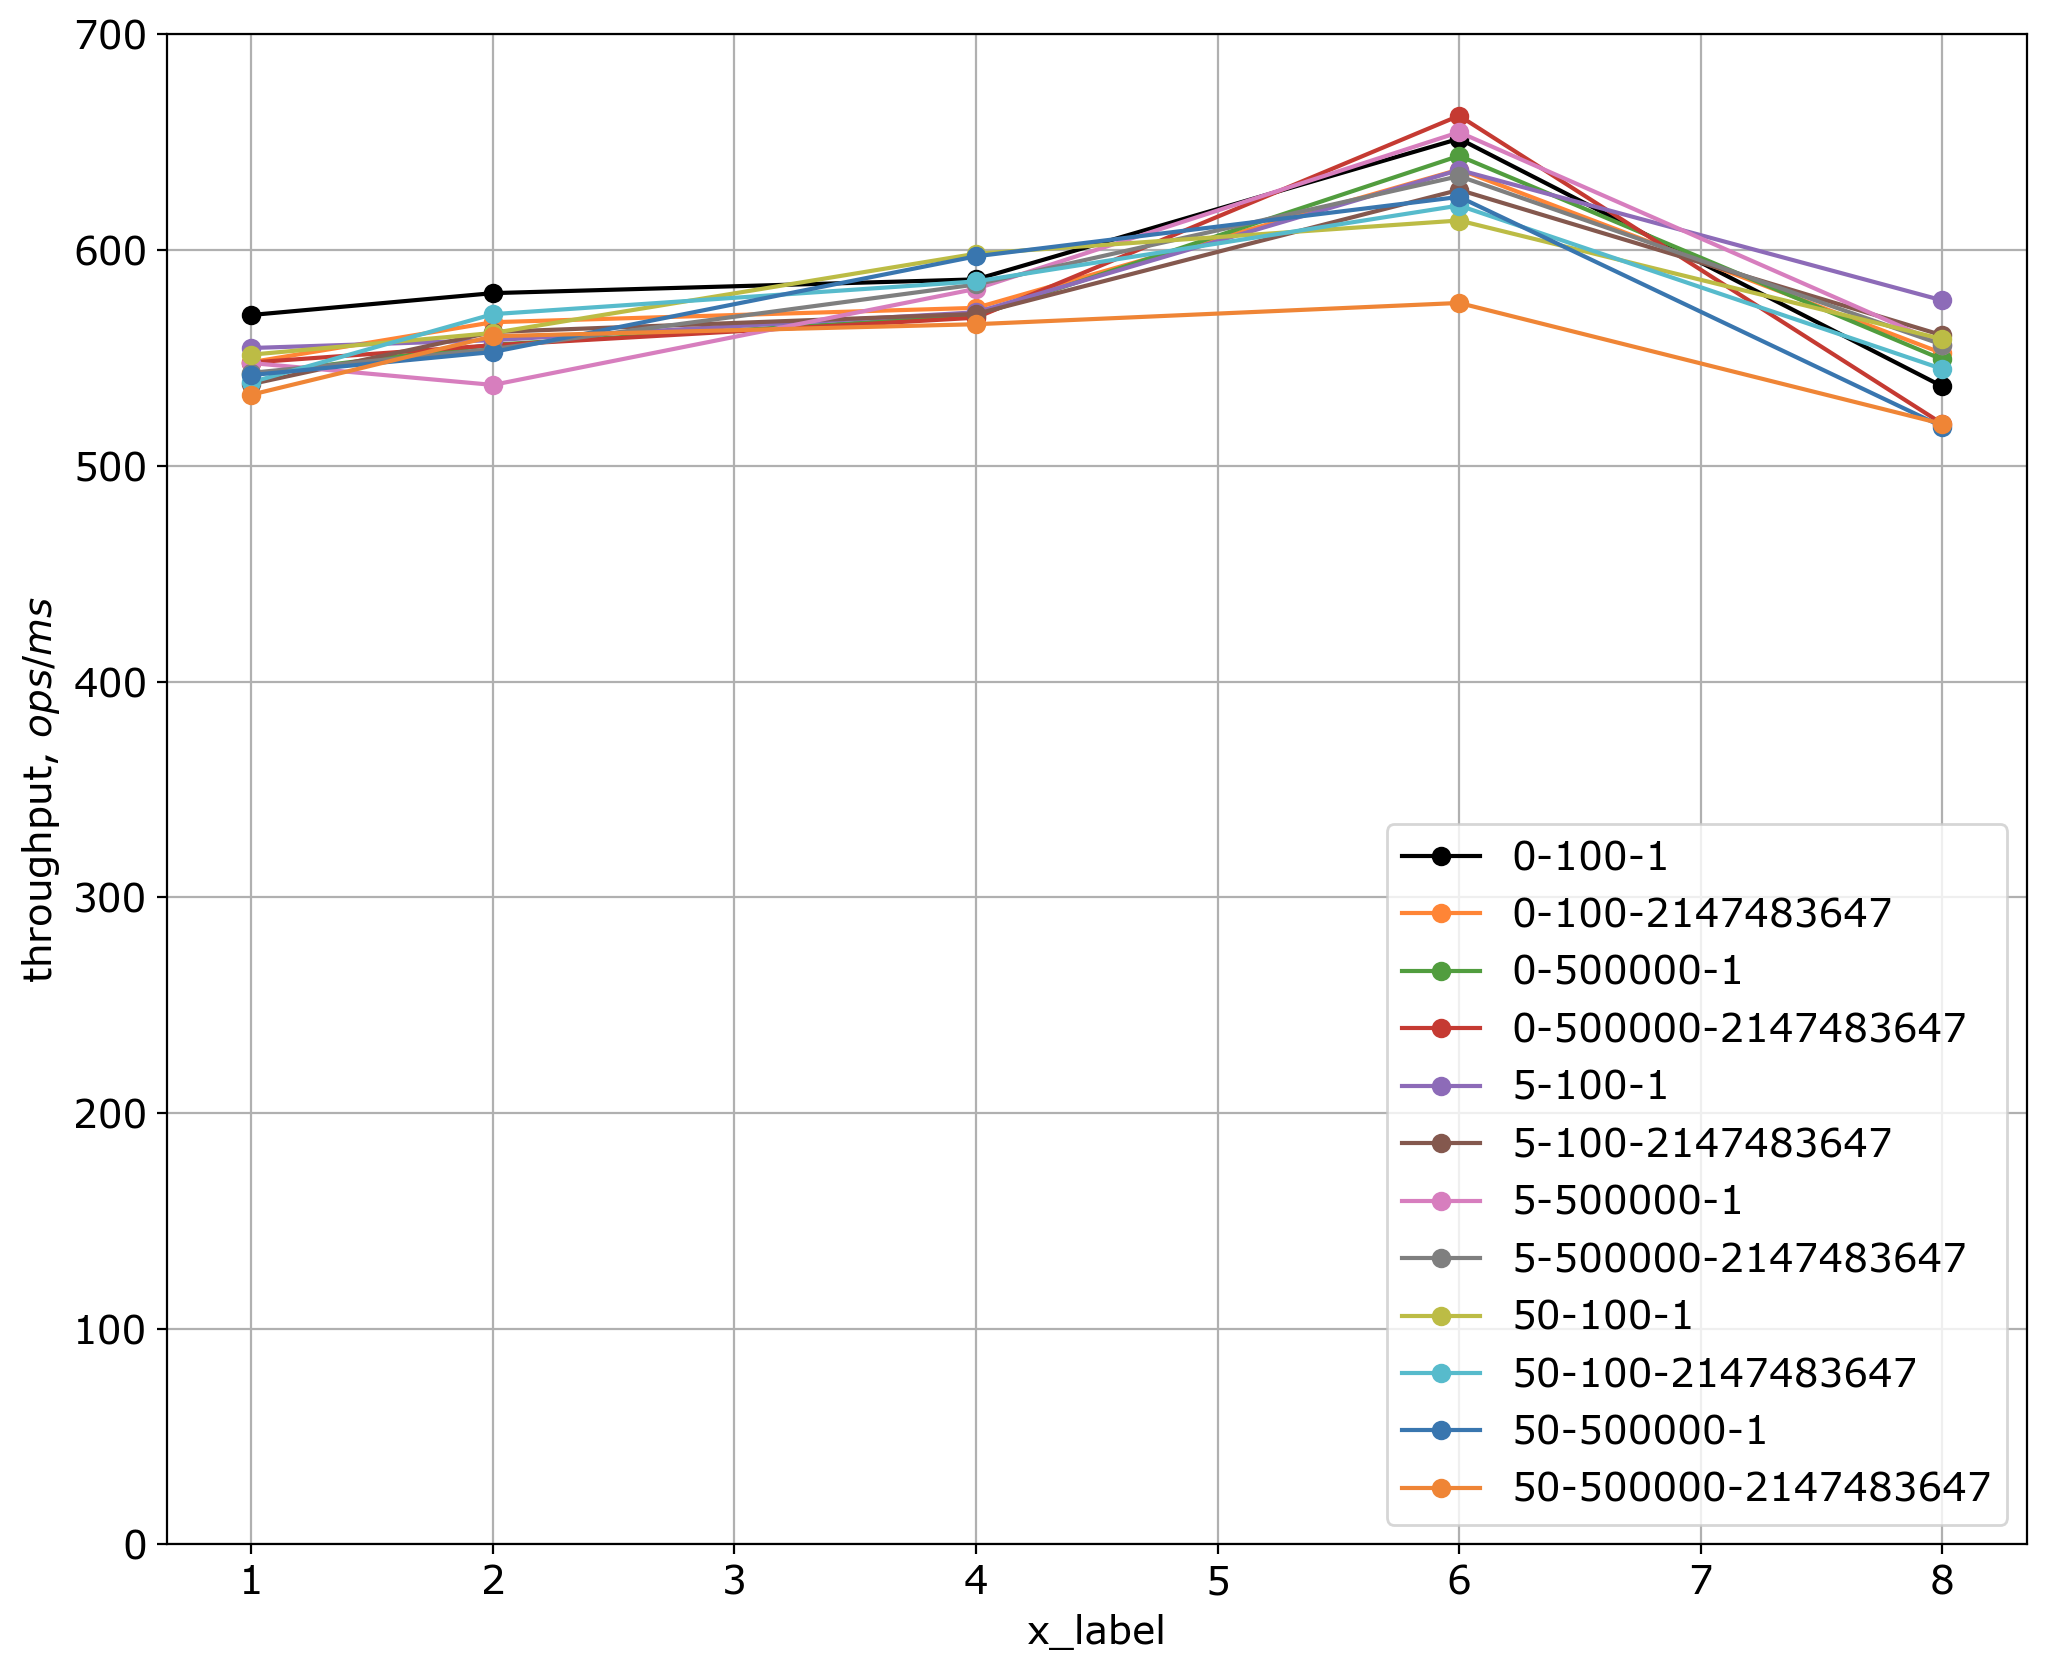

In [298]:
plot_salsa_equal_prod_dist(df, 8, types, colors, 0, 700)

In [299]:
types = ["FJP", "TPE"]
colors = ["#FF8536", "#519D3E"]

def plot_equal_cons_dist(df, nConsumers, types, colors, y_from, y_to):
  df1 = filter_cons(df, nConsumers)
  x = [1, 2, 4, 6, 8]
  ys = []
  ys_labels = []
  for type in types:
    df2 = filter_type(df1, type)
    ys.append(list(df2["Score"].to_numpy()))
    ys_labels.append(type)
    
  plot(x, ys, "$n$ consumers", ys_labels, colors, y_from, y_to)

def plot_equal_prod_dist(df, nProducers, types, colors, y_from, y_to):
  df1 = filter_prods(df, nProducers)
  x = [1, 2, 4, 6, 8]
  ys = []
  ys_labels = []
  for type in types:
    df2 = filter_type(df1, type)
    ys.append(list(df2["Score"].to_numpy()))
    ys_labels.append(type)
    
  plot(x, ys, "$n$ producers", ys_labels, colors, y_from, y_to)

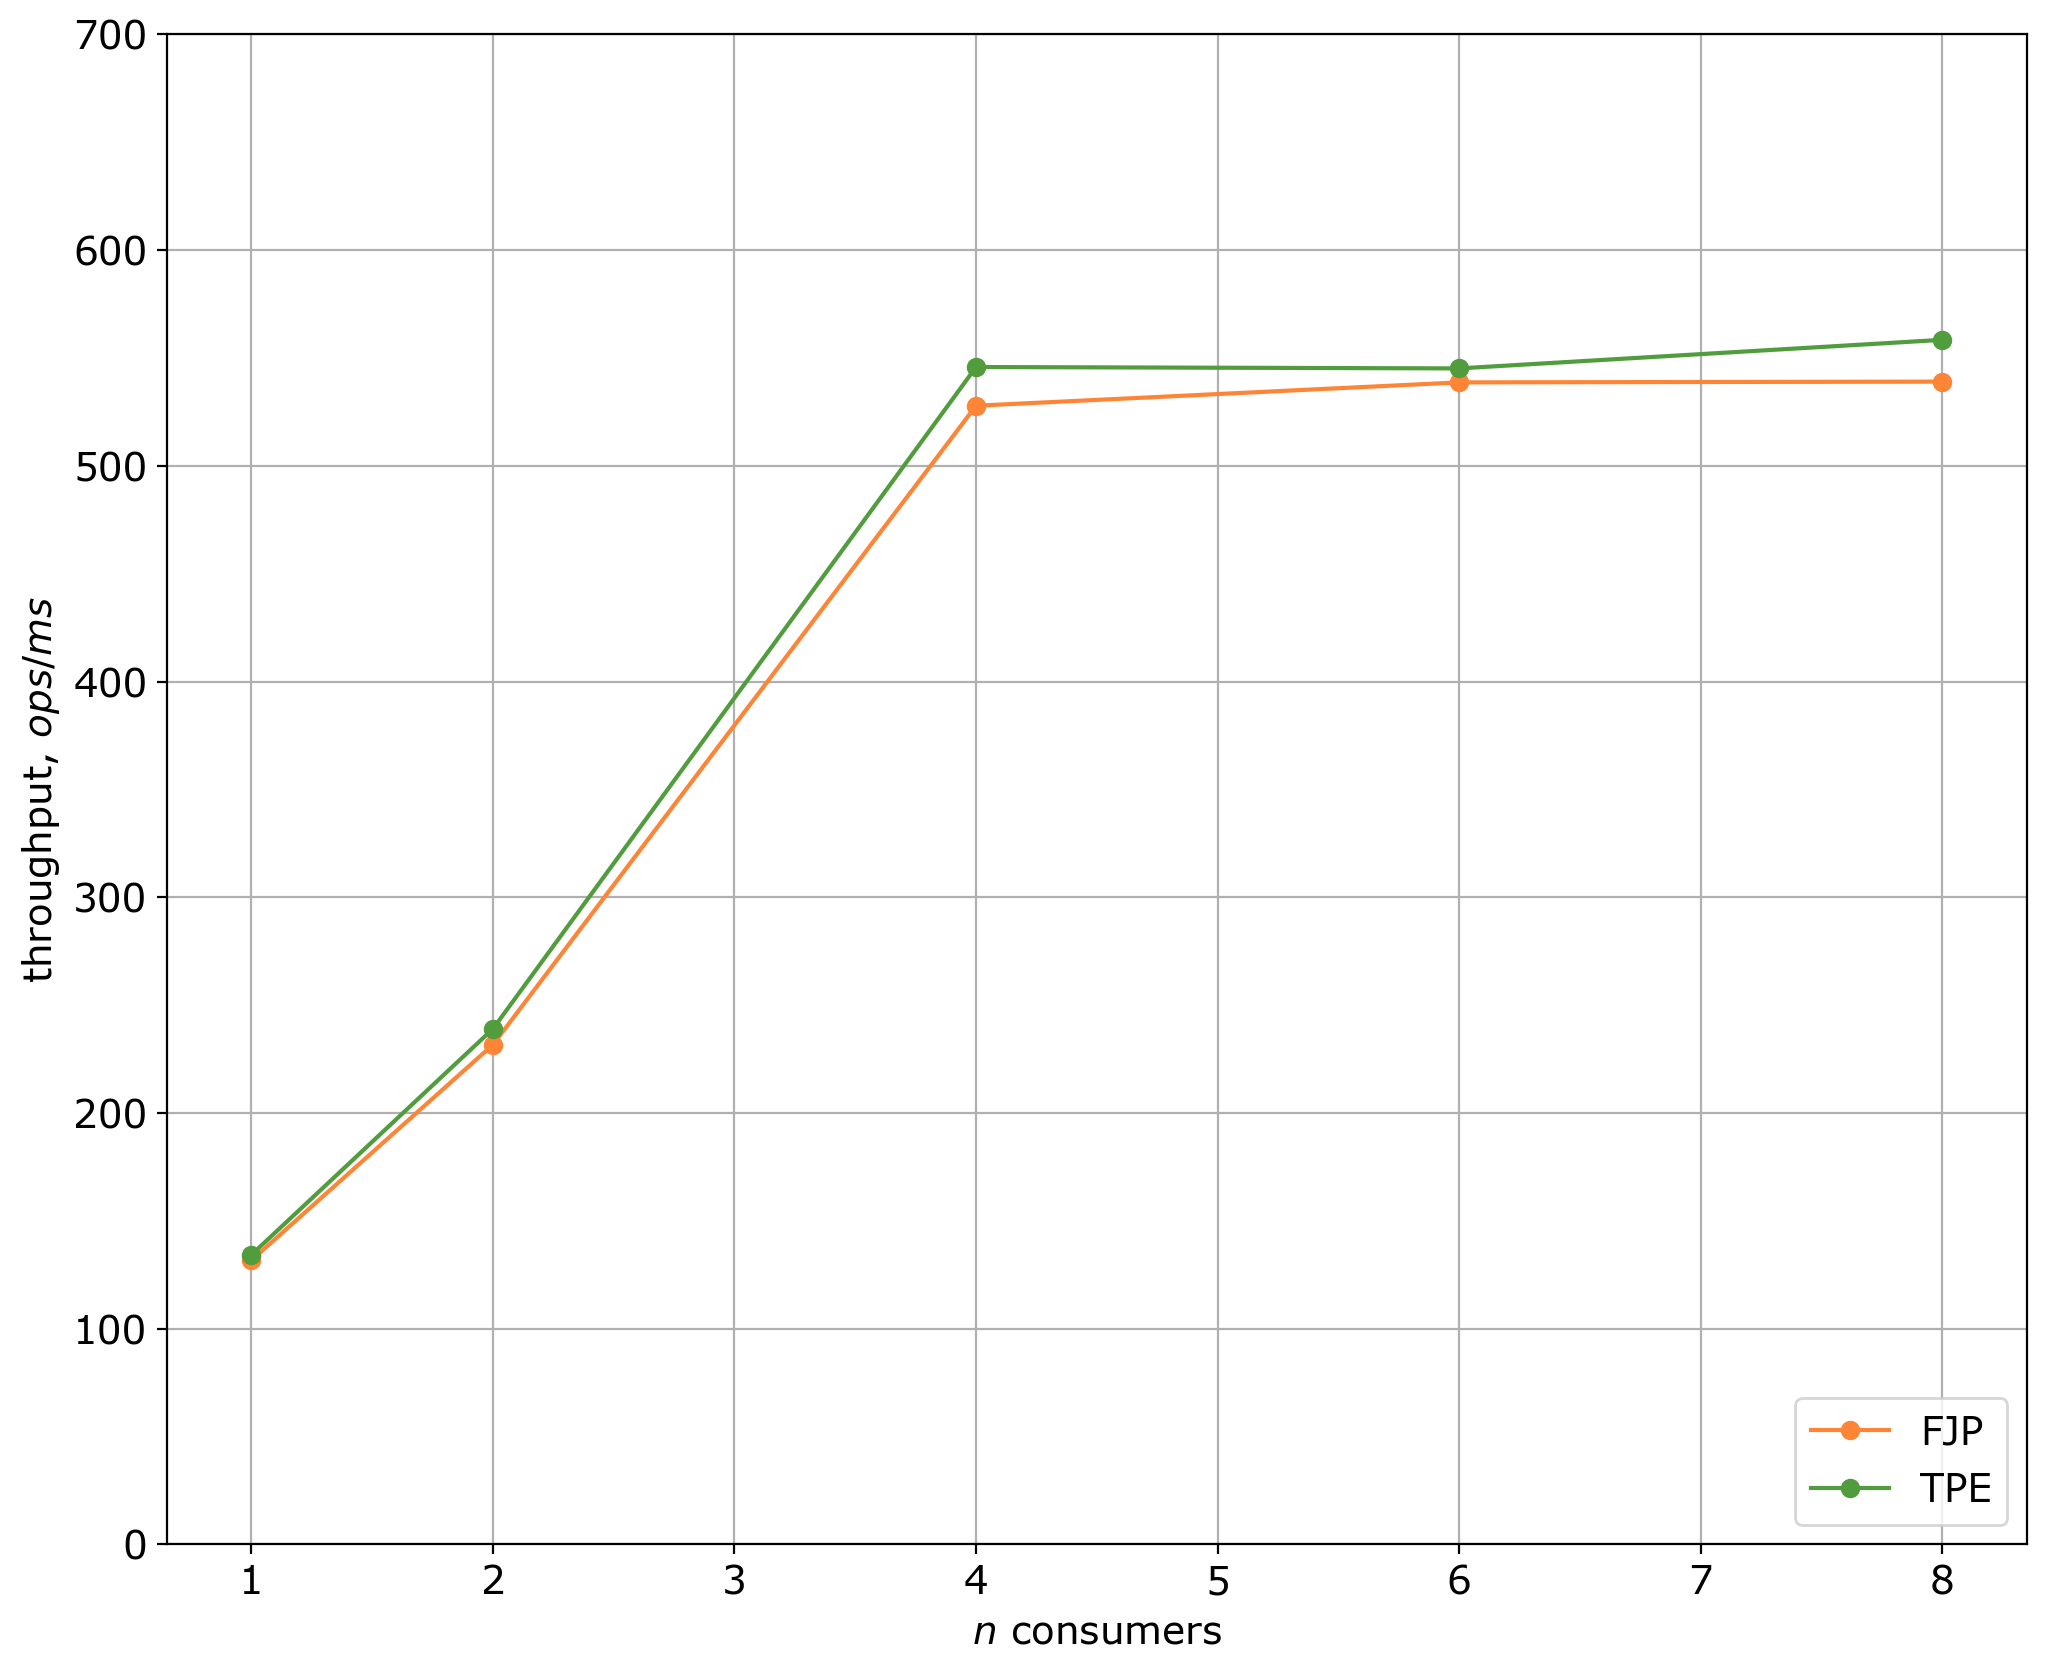

In [300]:
plot_equal_cons_dist(df, 1, types, colors, 0, 700)

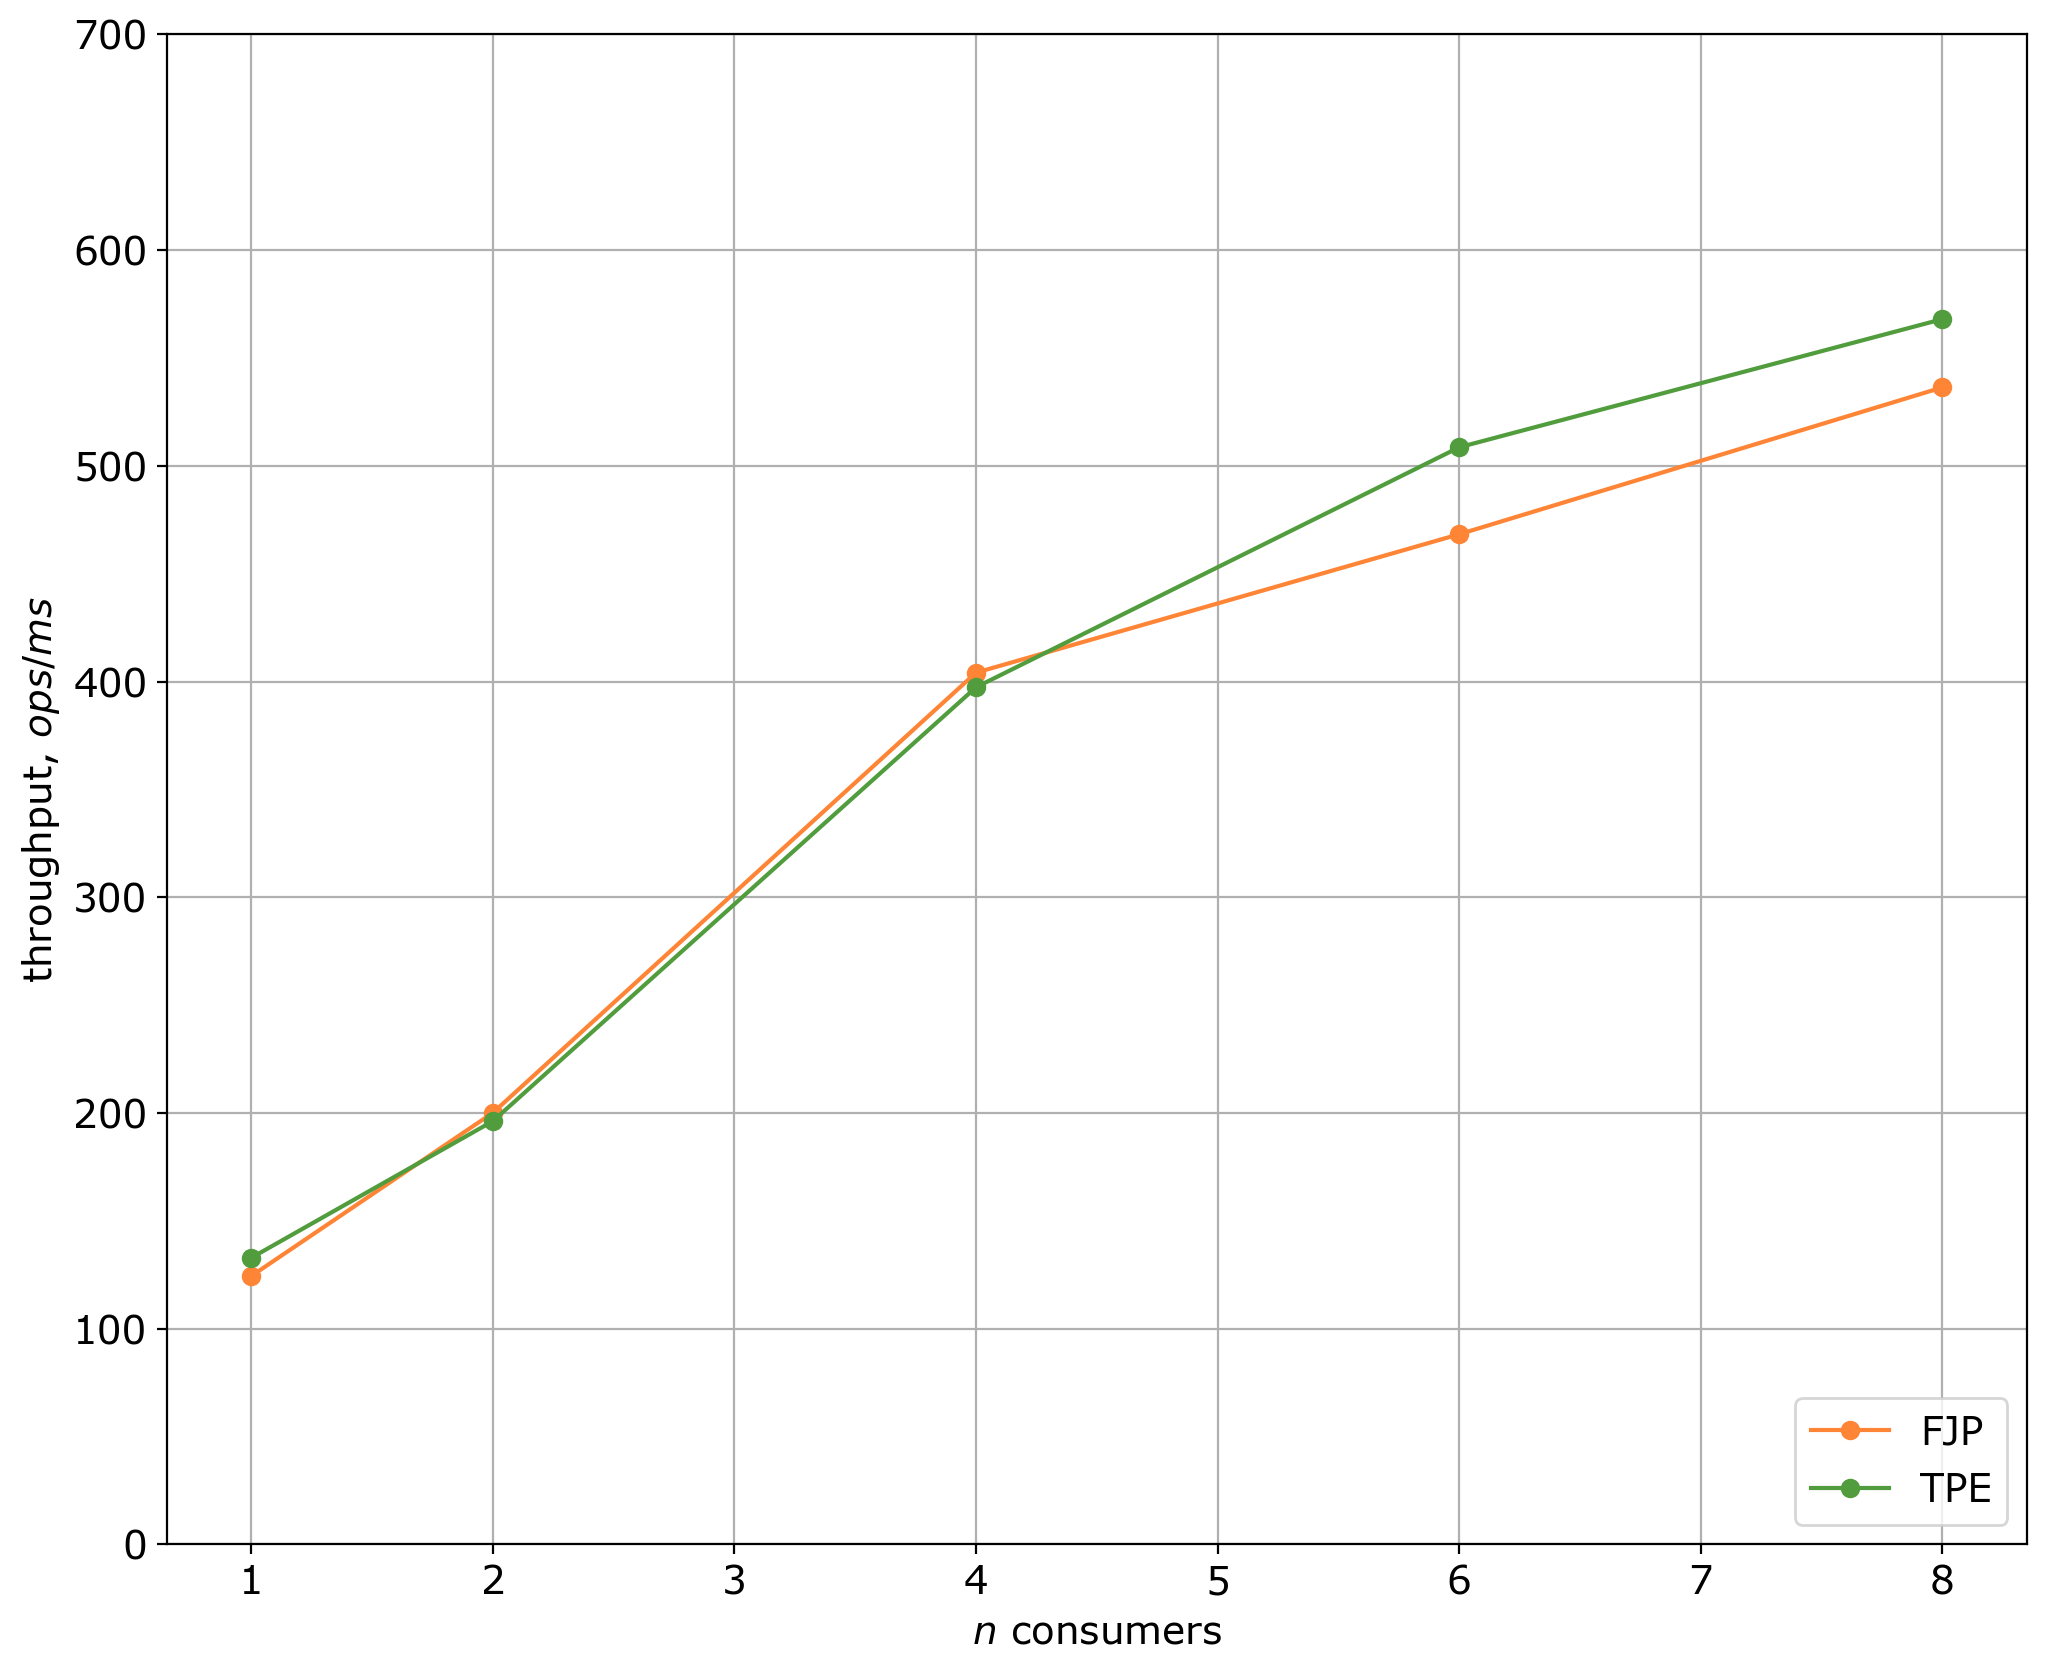

In [301]:
plot_equal_cons_dist(df, 2, types, colors, 0, 700)

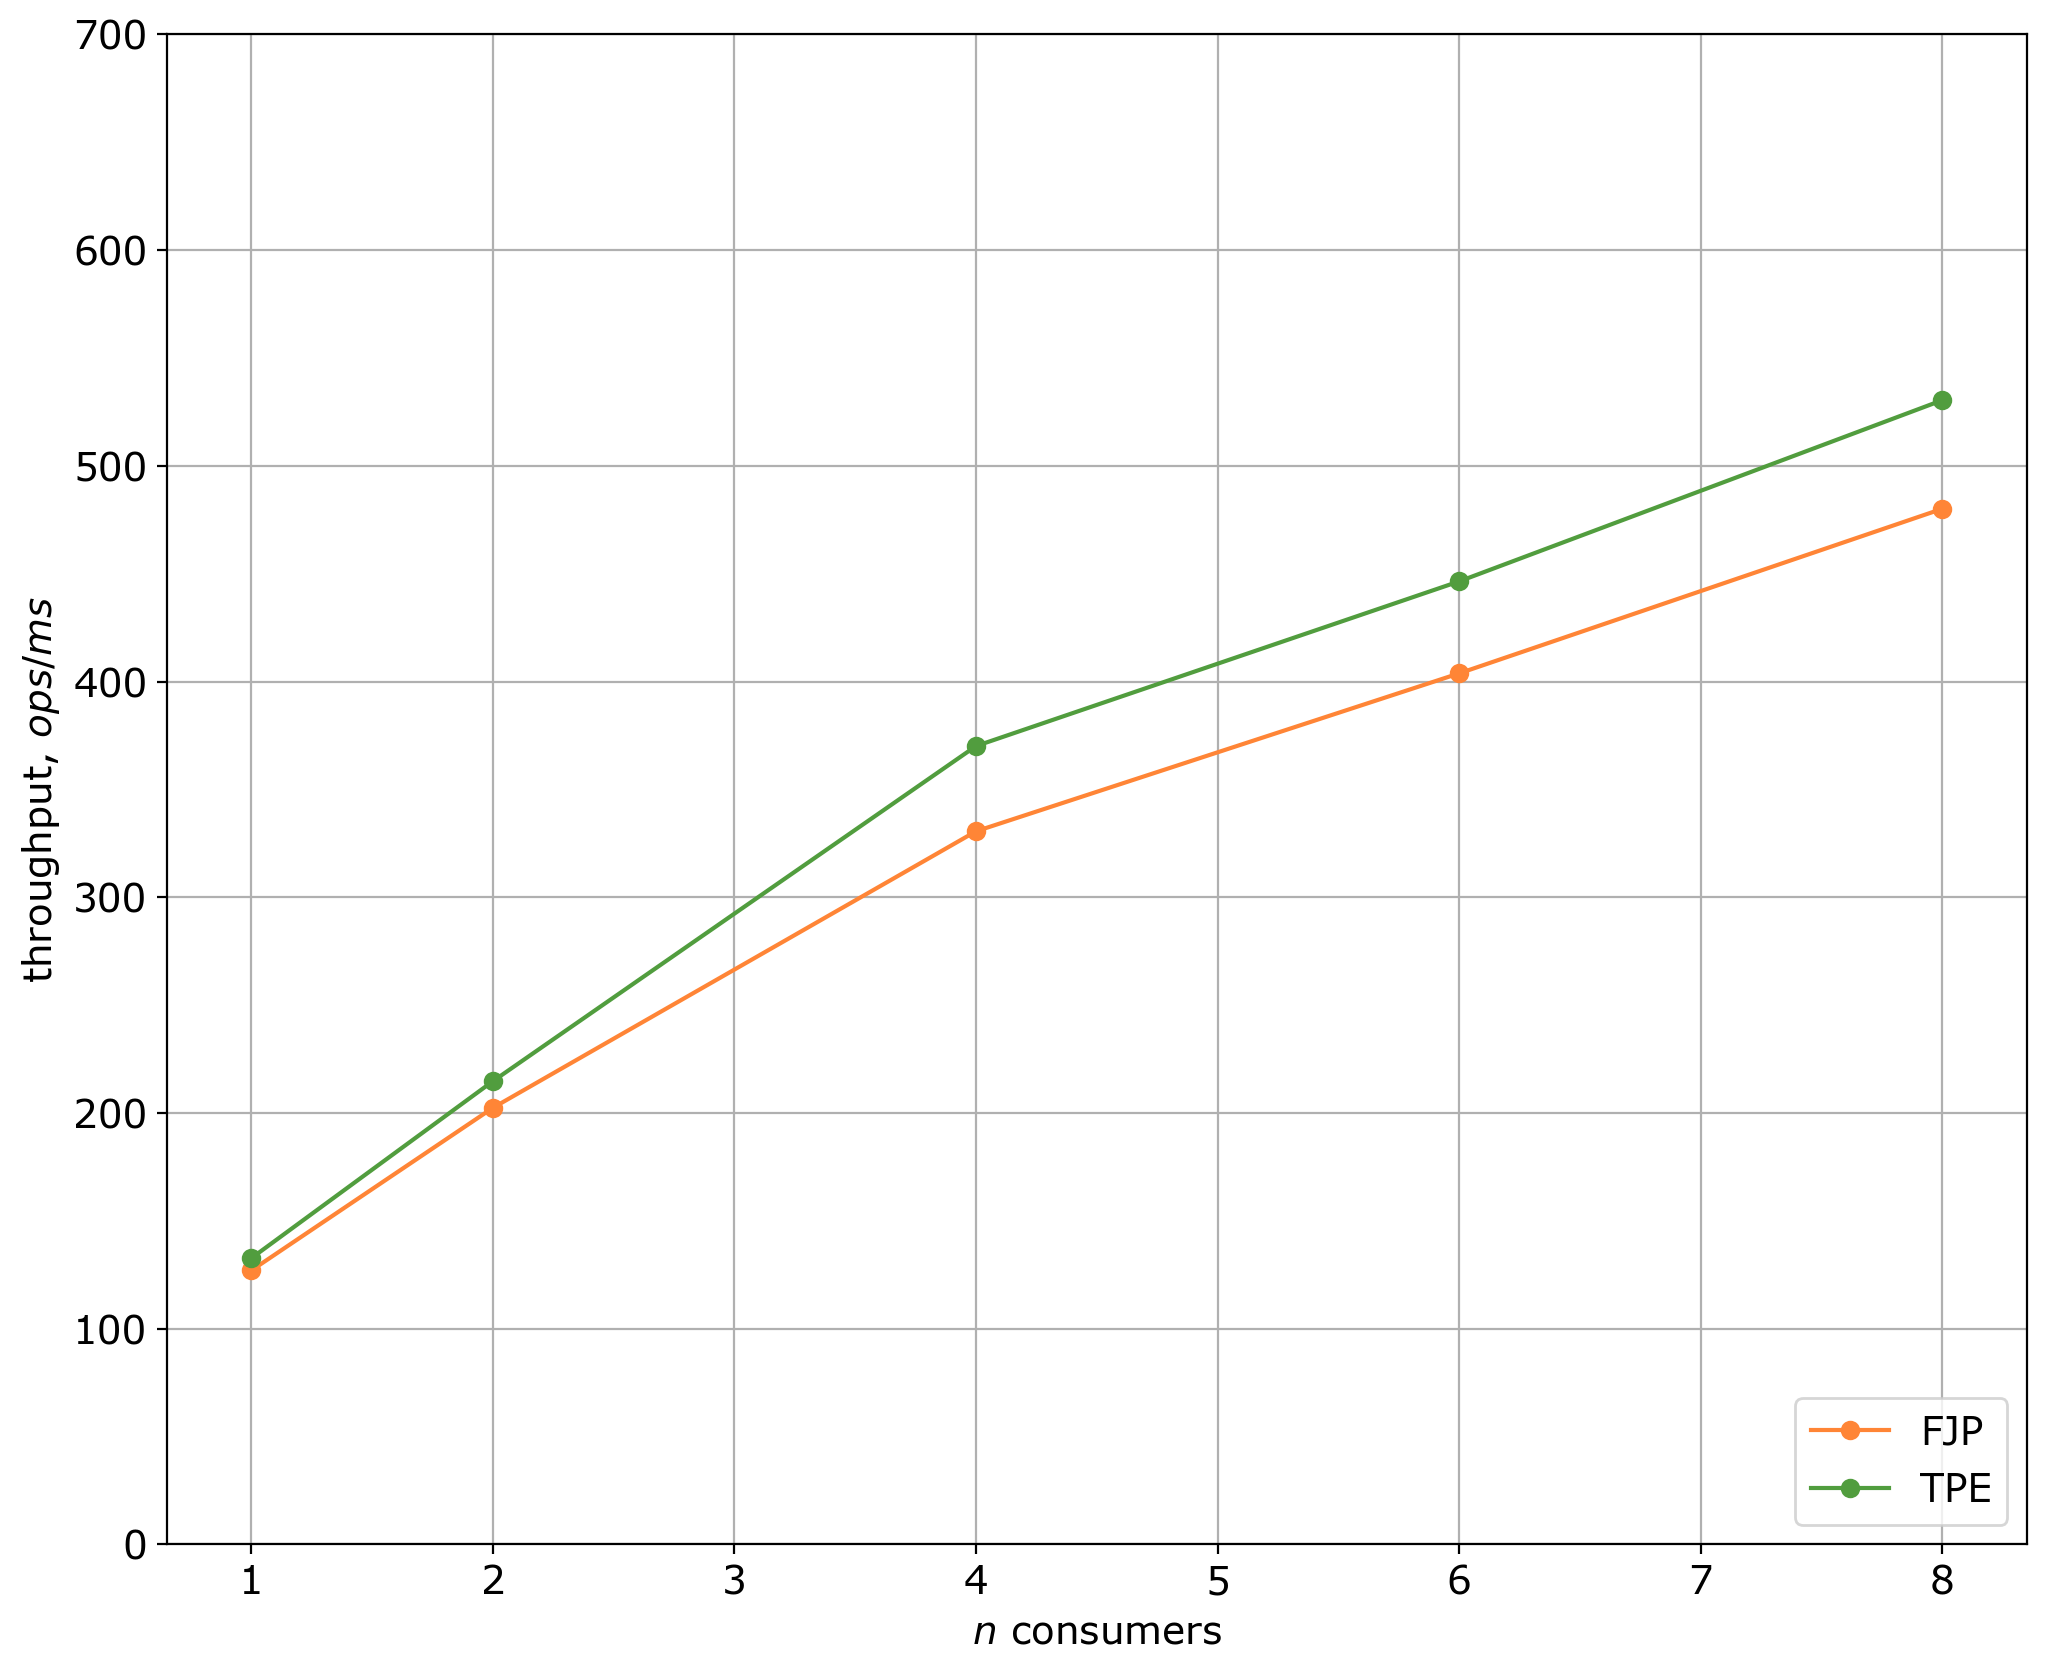

In [302]:
plot_equal_cons_dist(df, 4, types, colors, 0, 700)

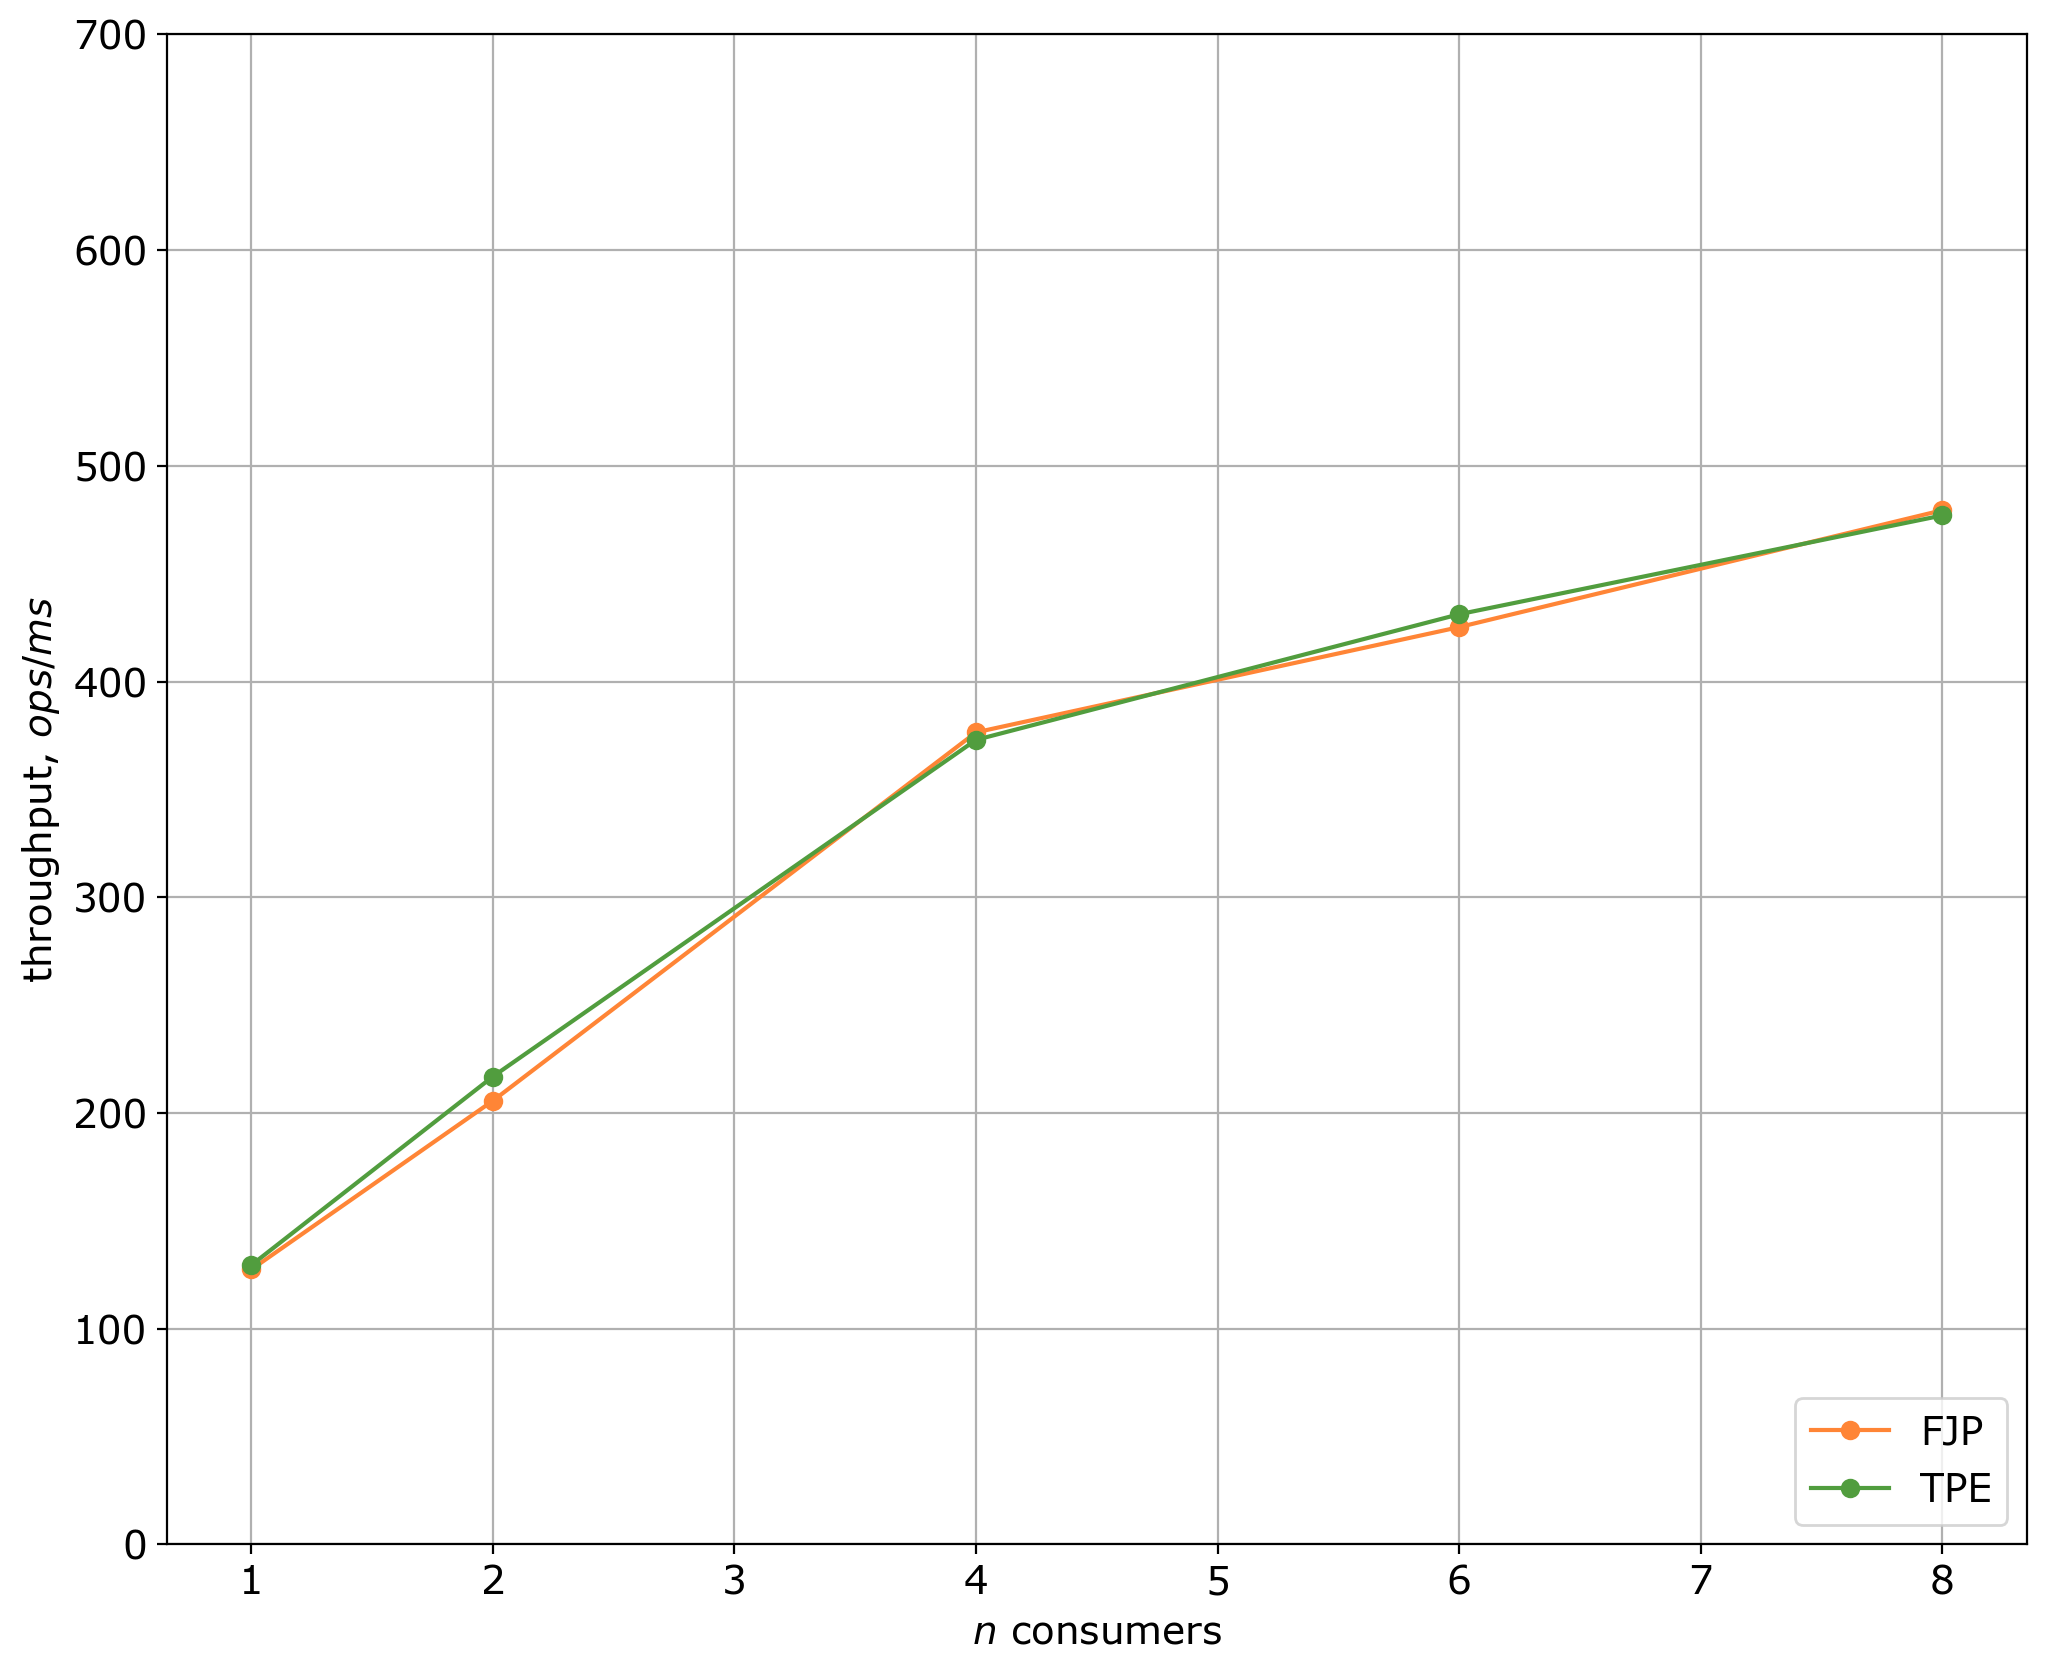

In [303]:
plot_equal_cons_dist(df, 6, types, colors, 0, 700)

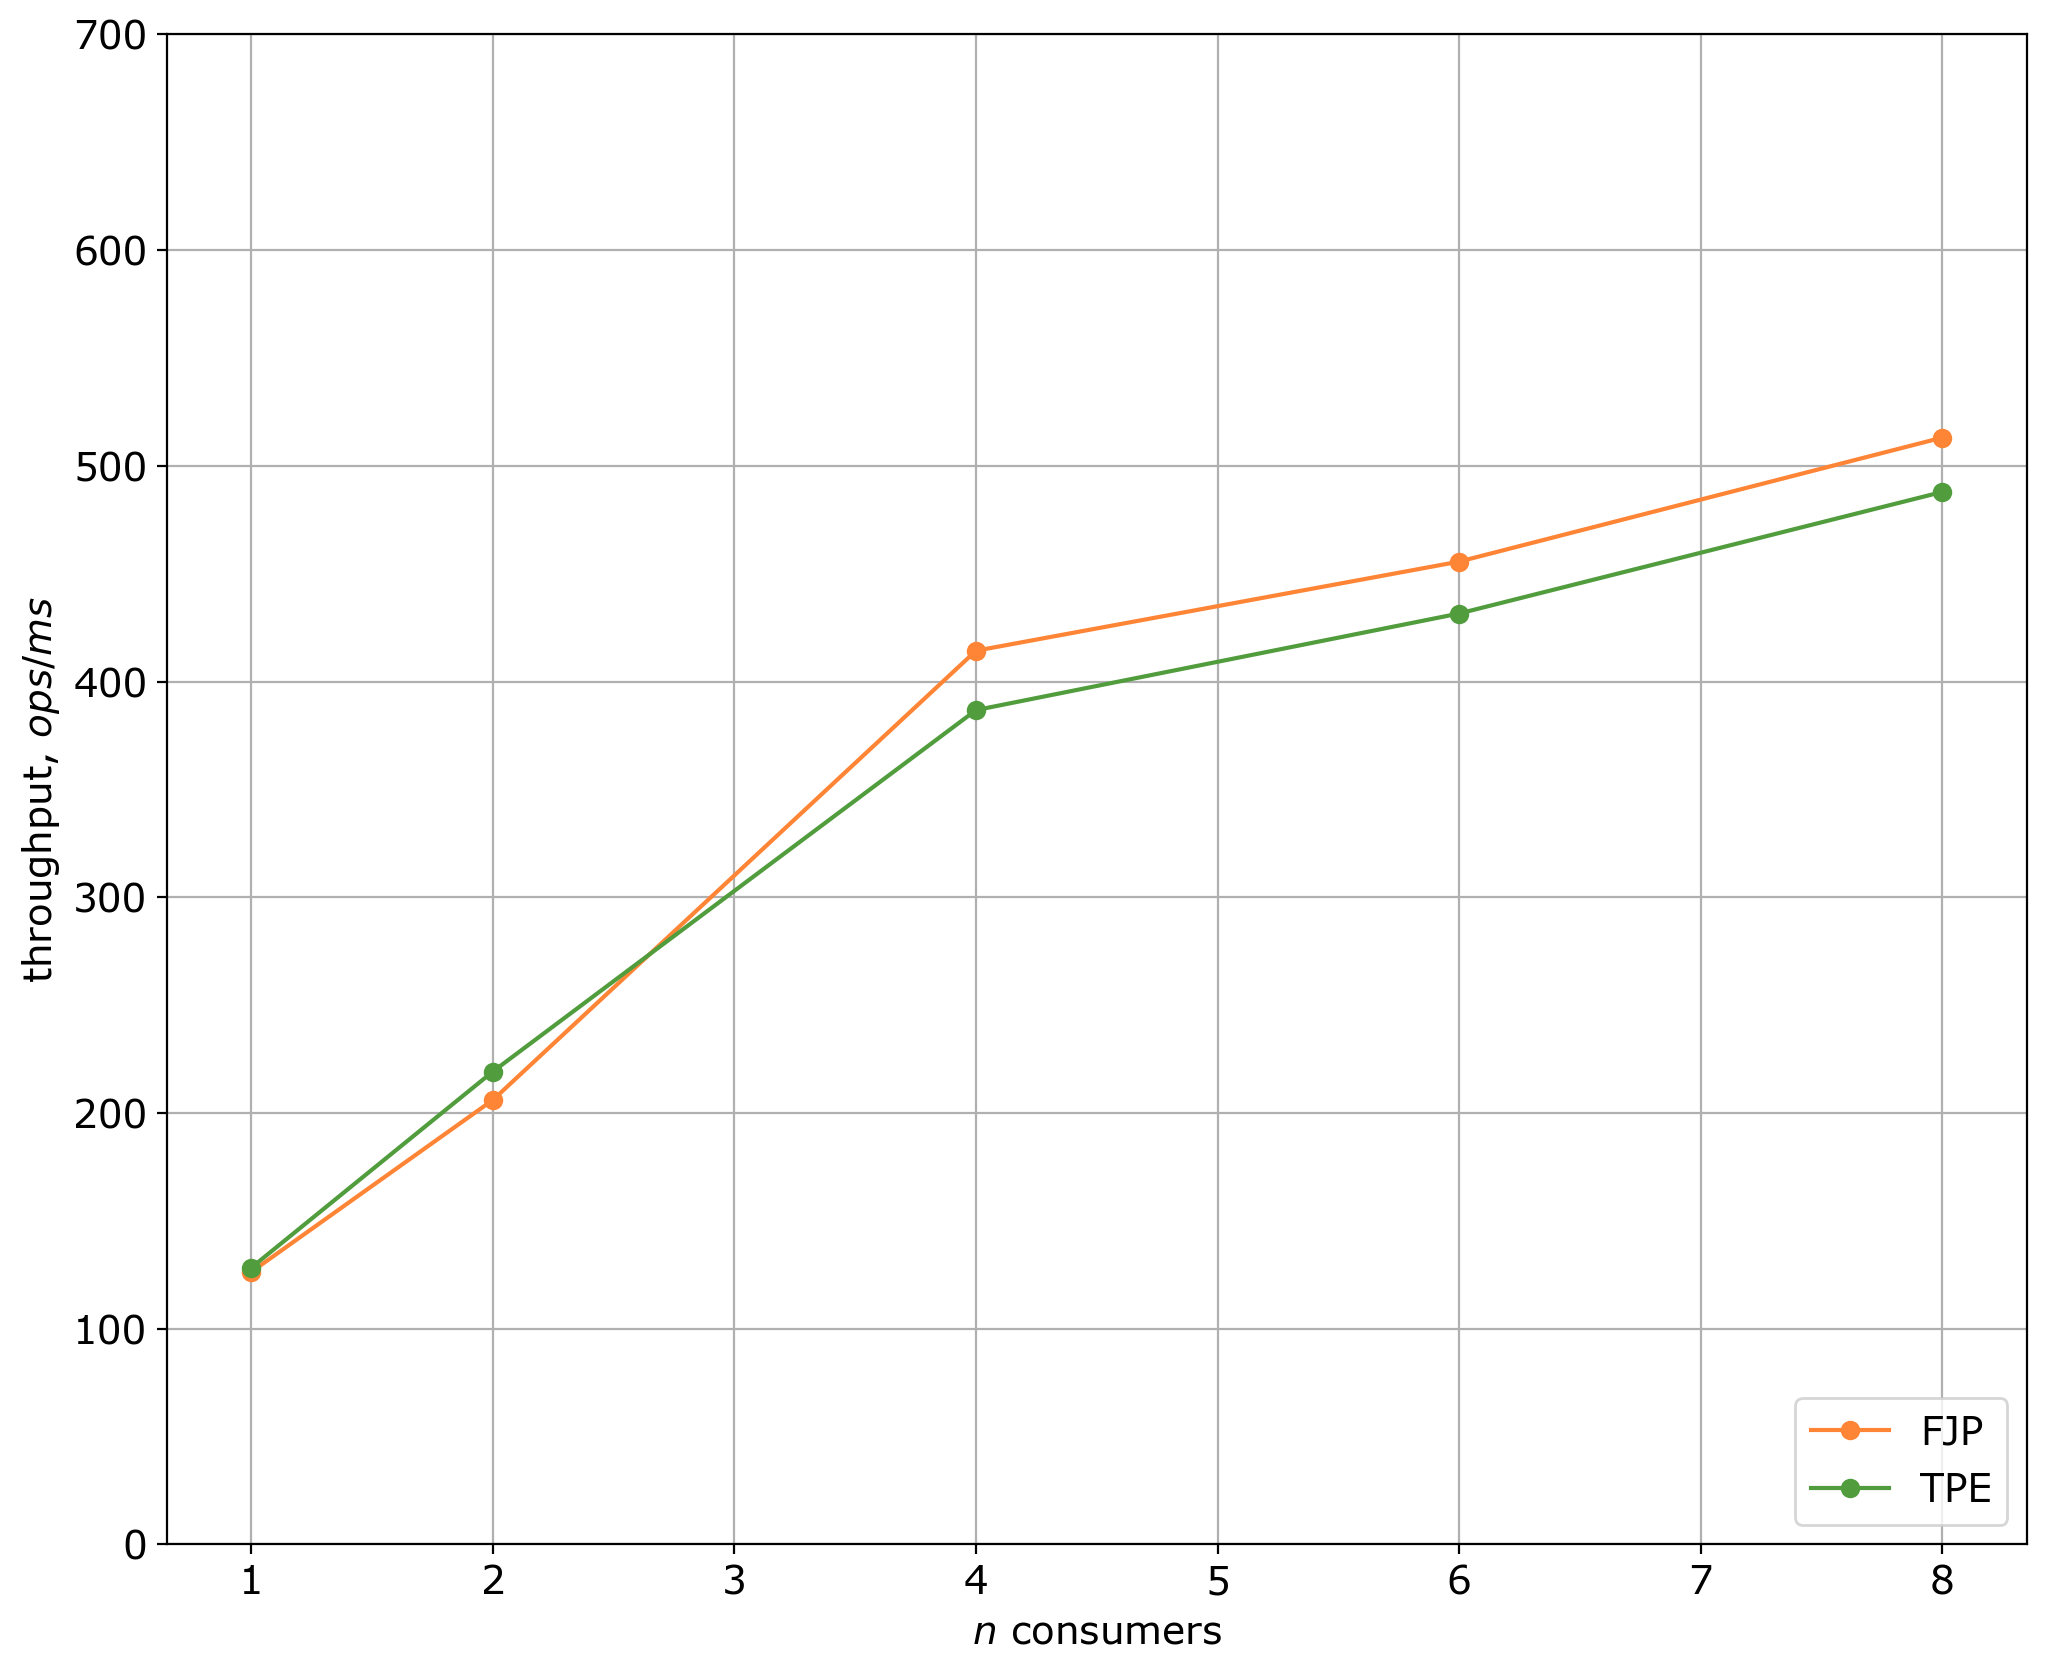

In [304]:
plot_equal_cons_dist(df, 8, types, colors, 0, 700)

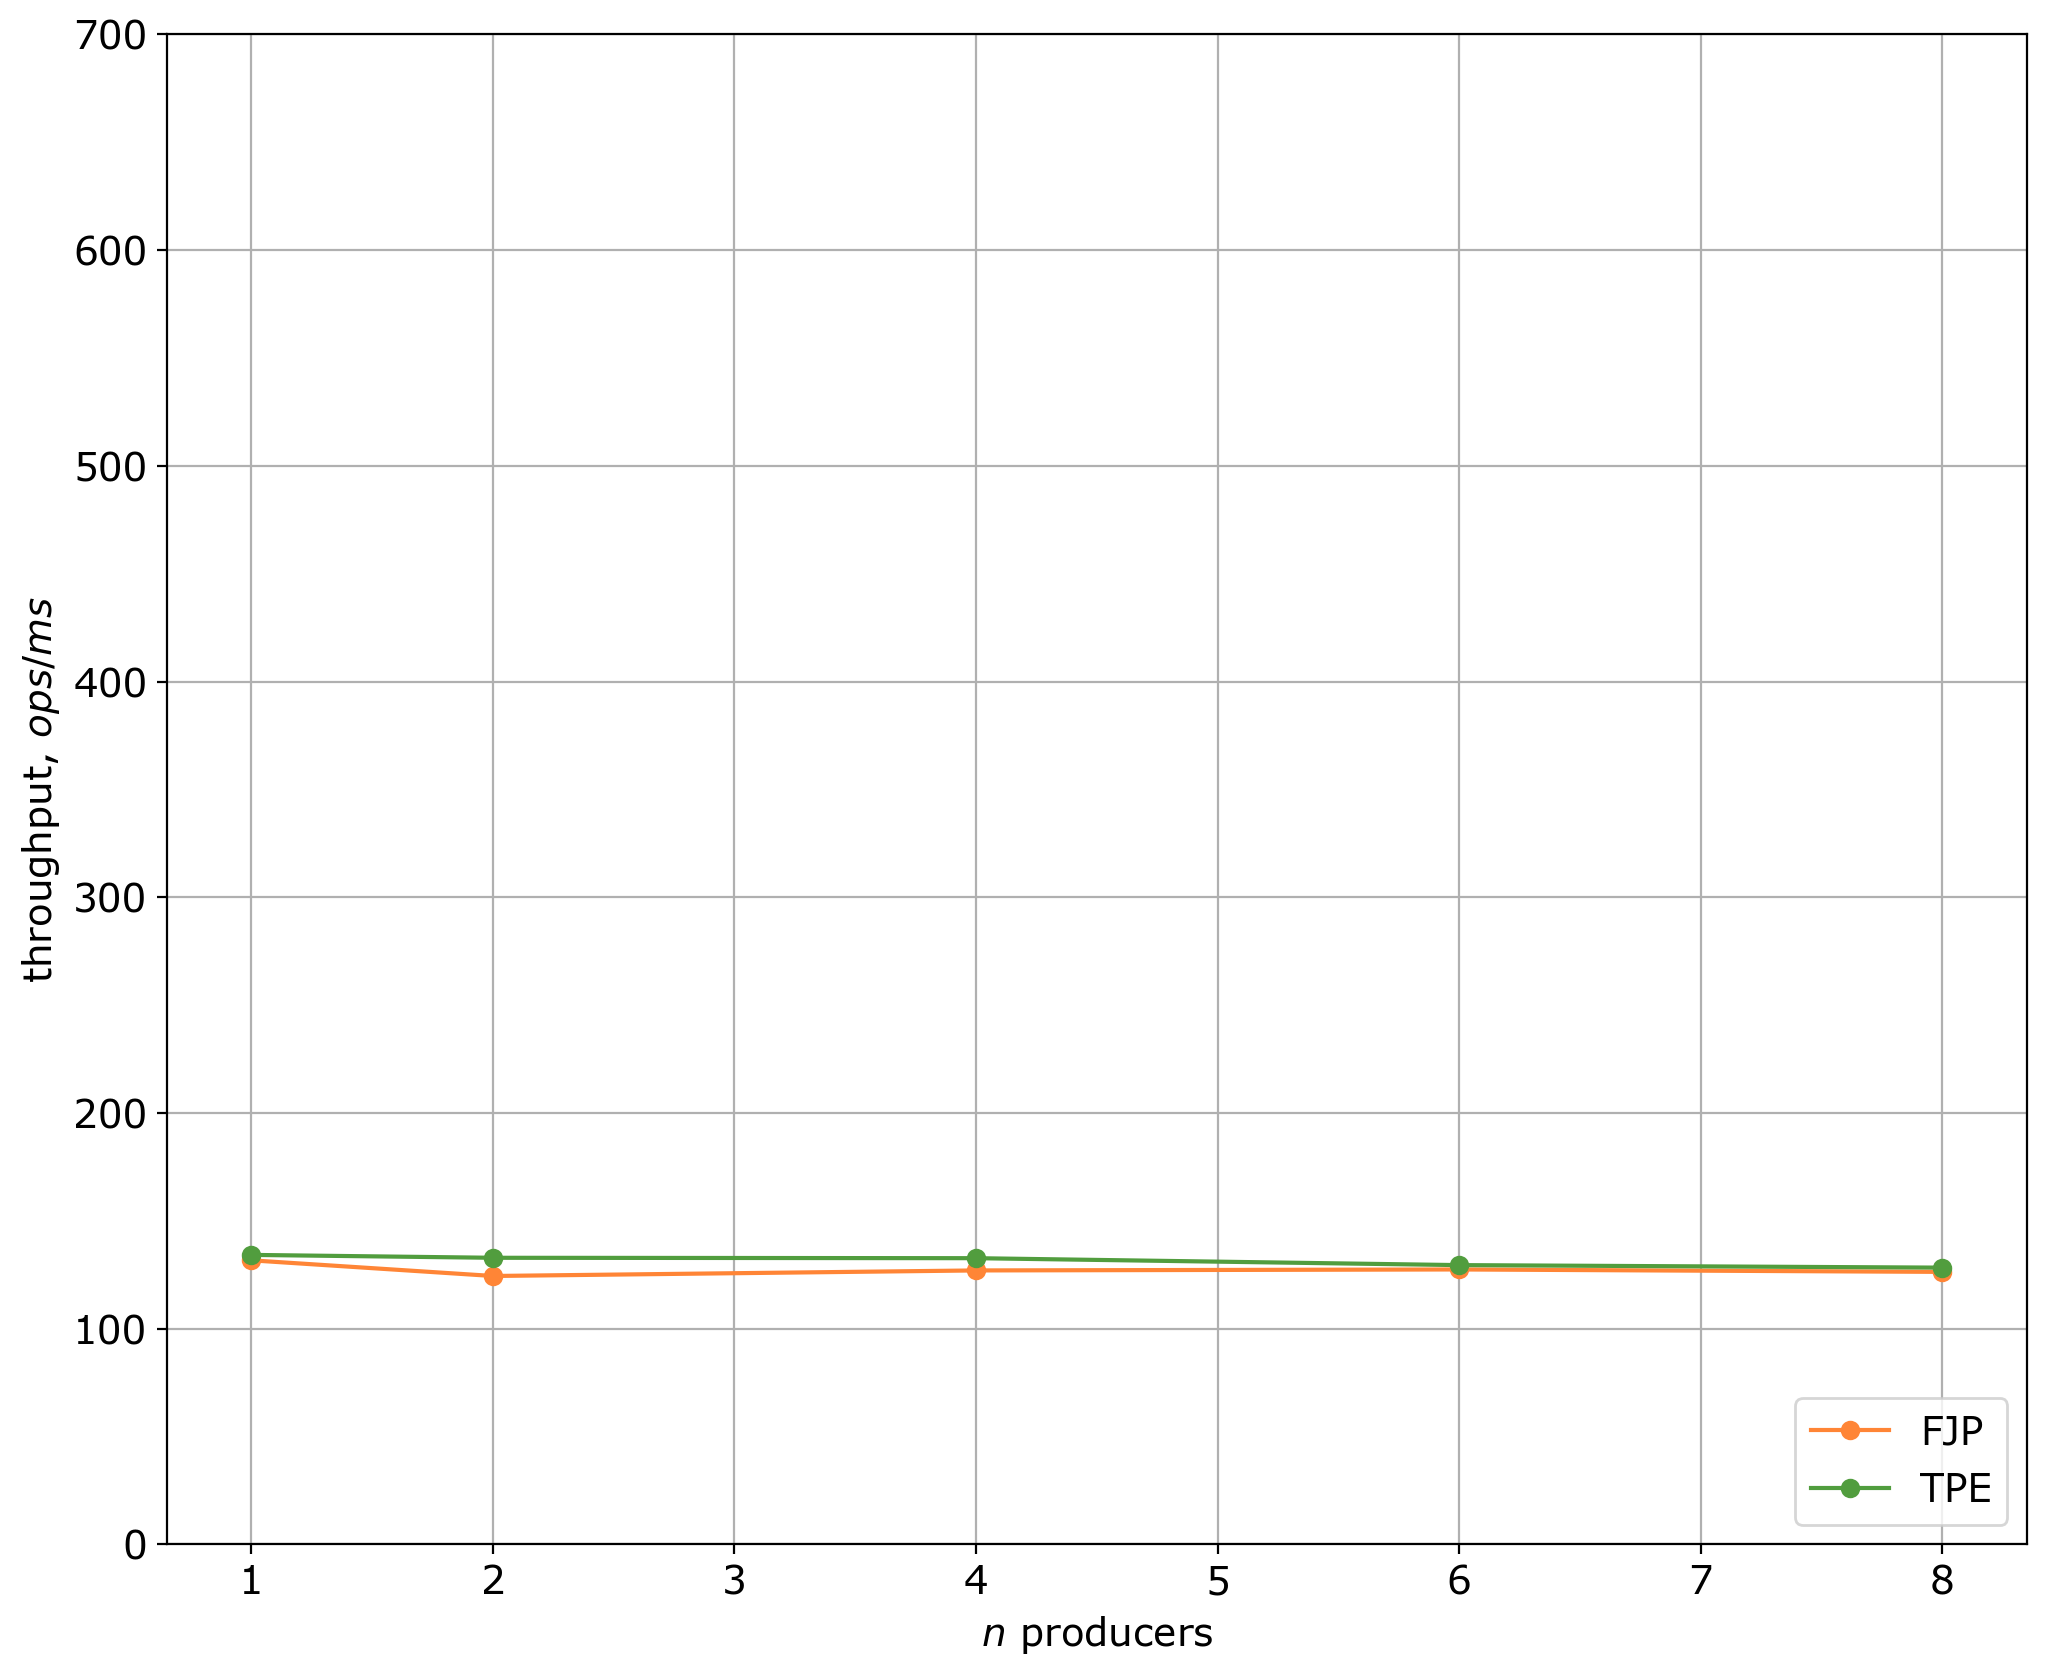

In [305]:
plot_equal_prod_dist(df, 1, types, colors, 0, 700)

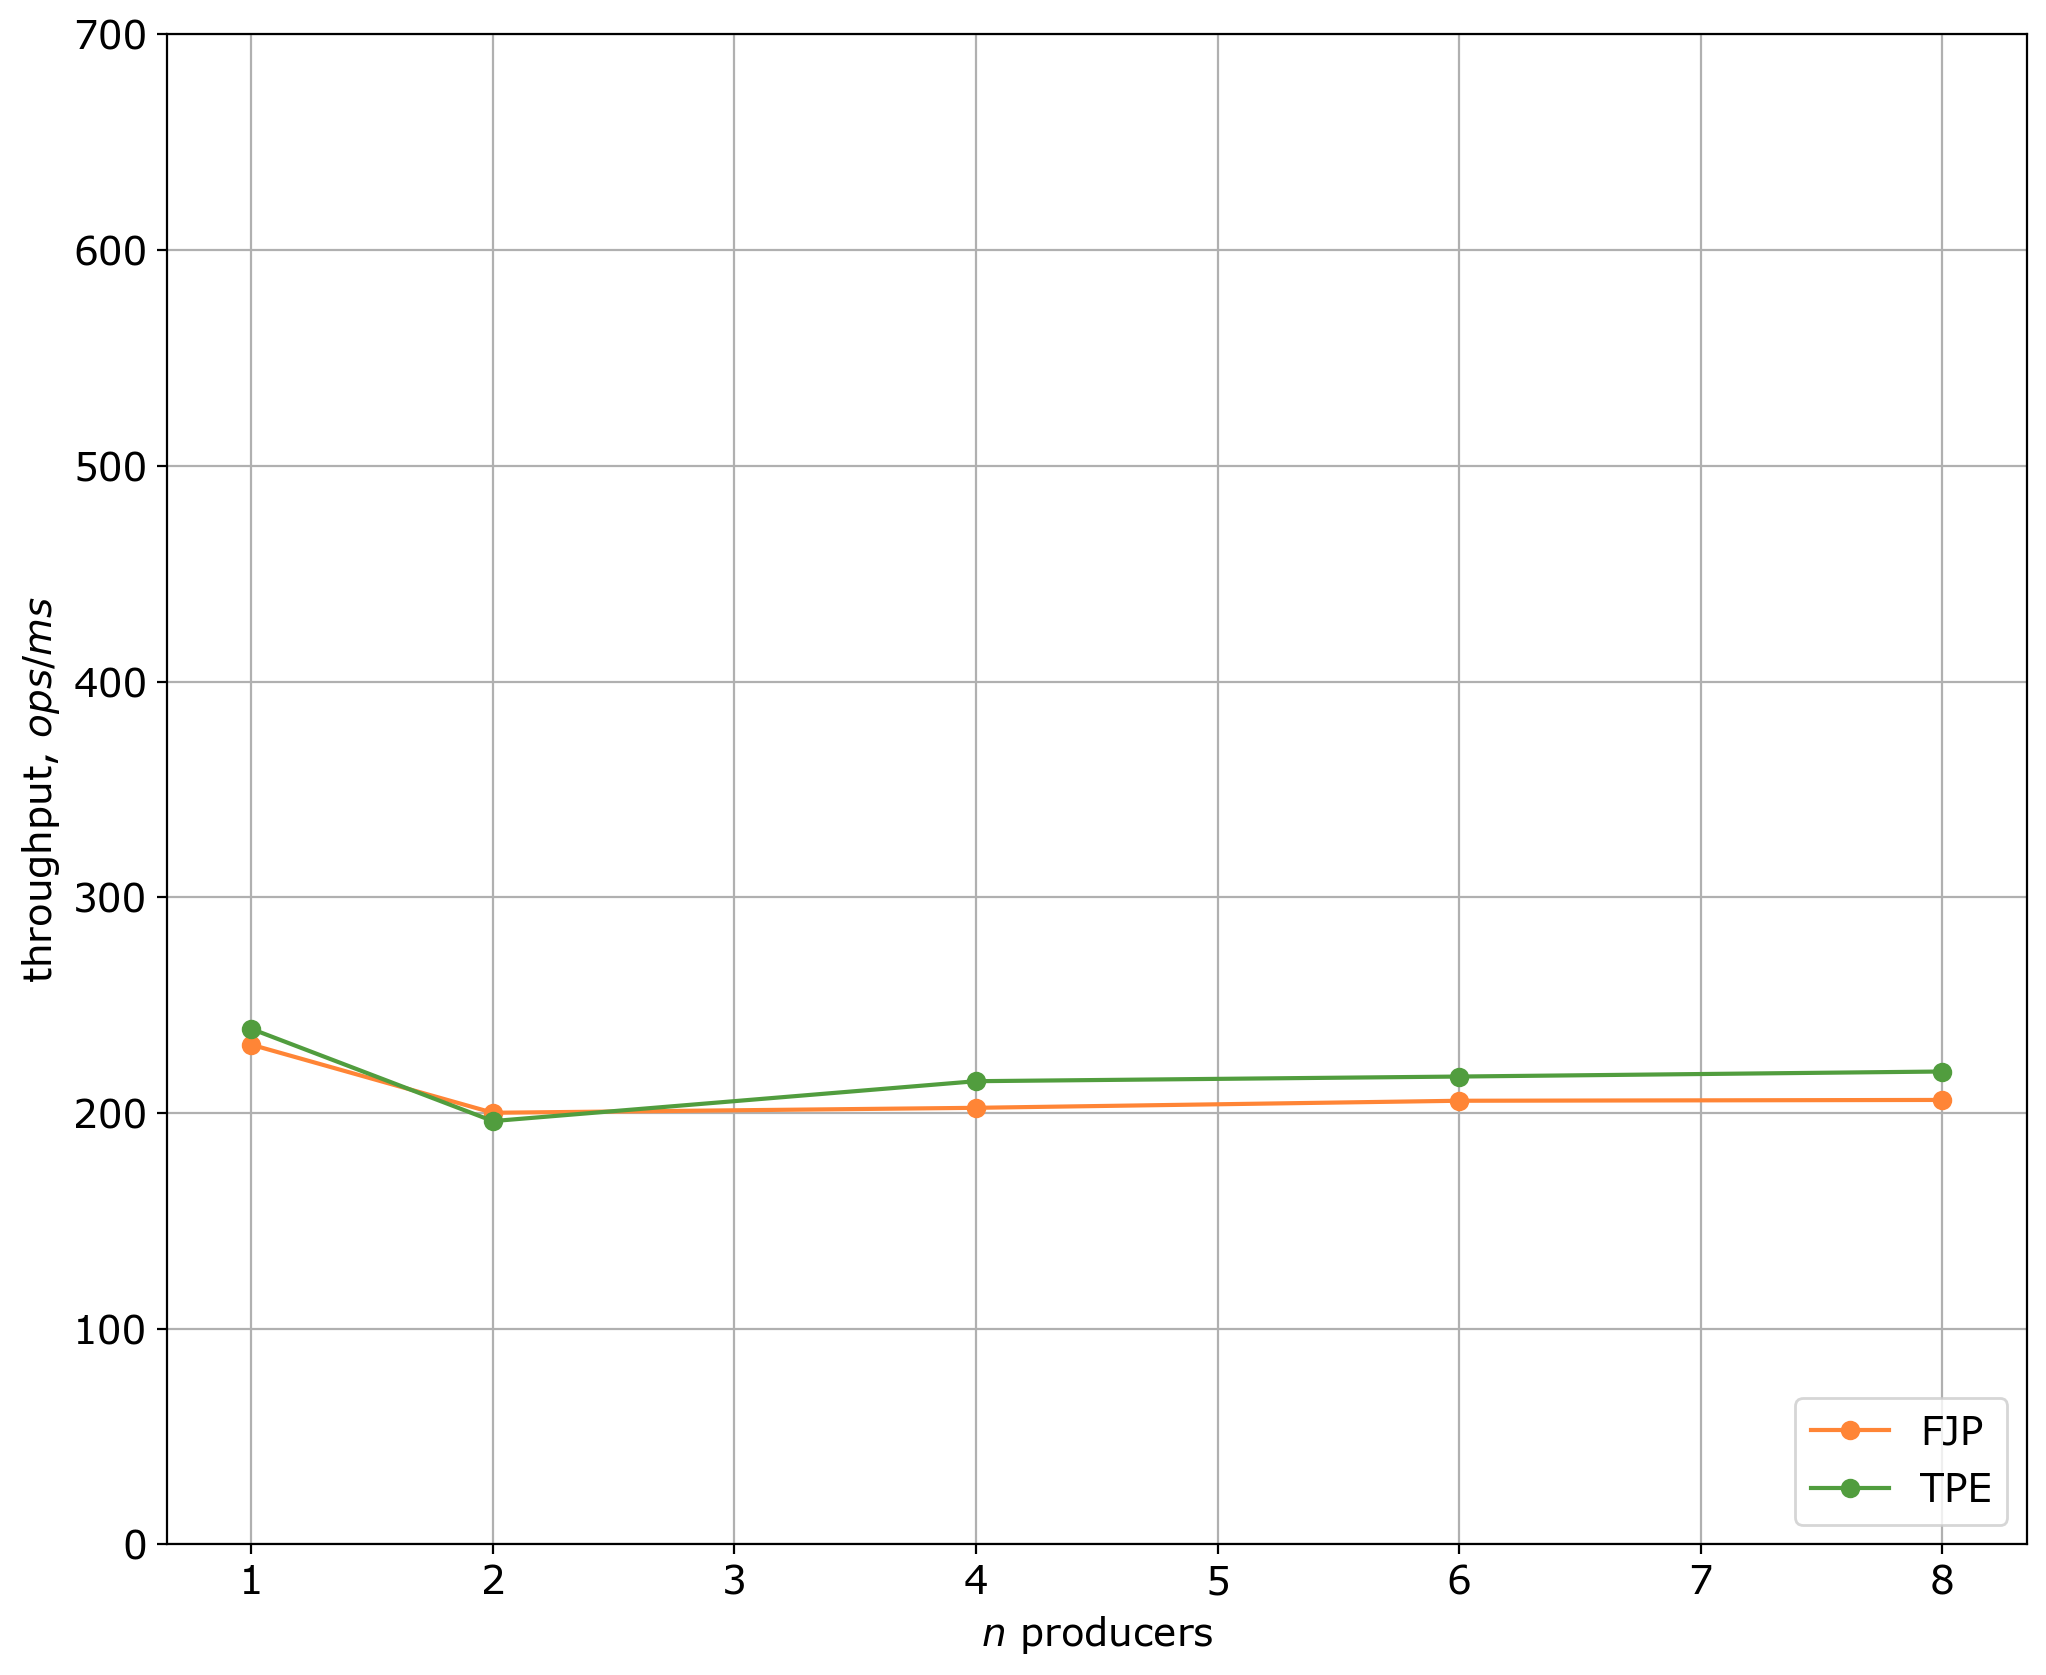

In [306]:
plot_equal_prod_dist(df, 2, types, colors, 0, 700)

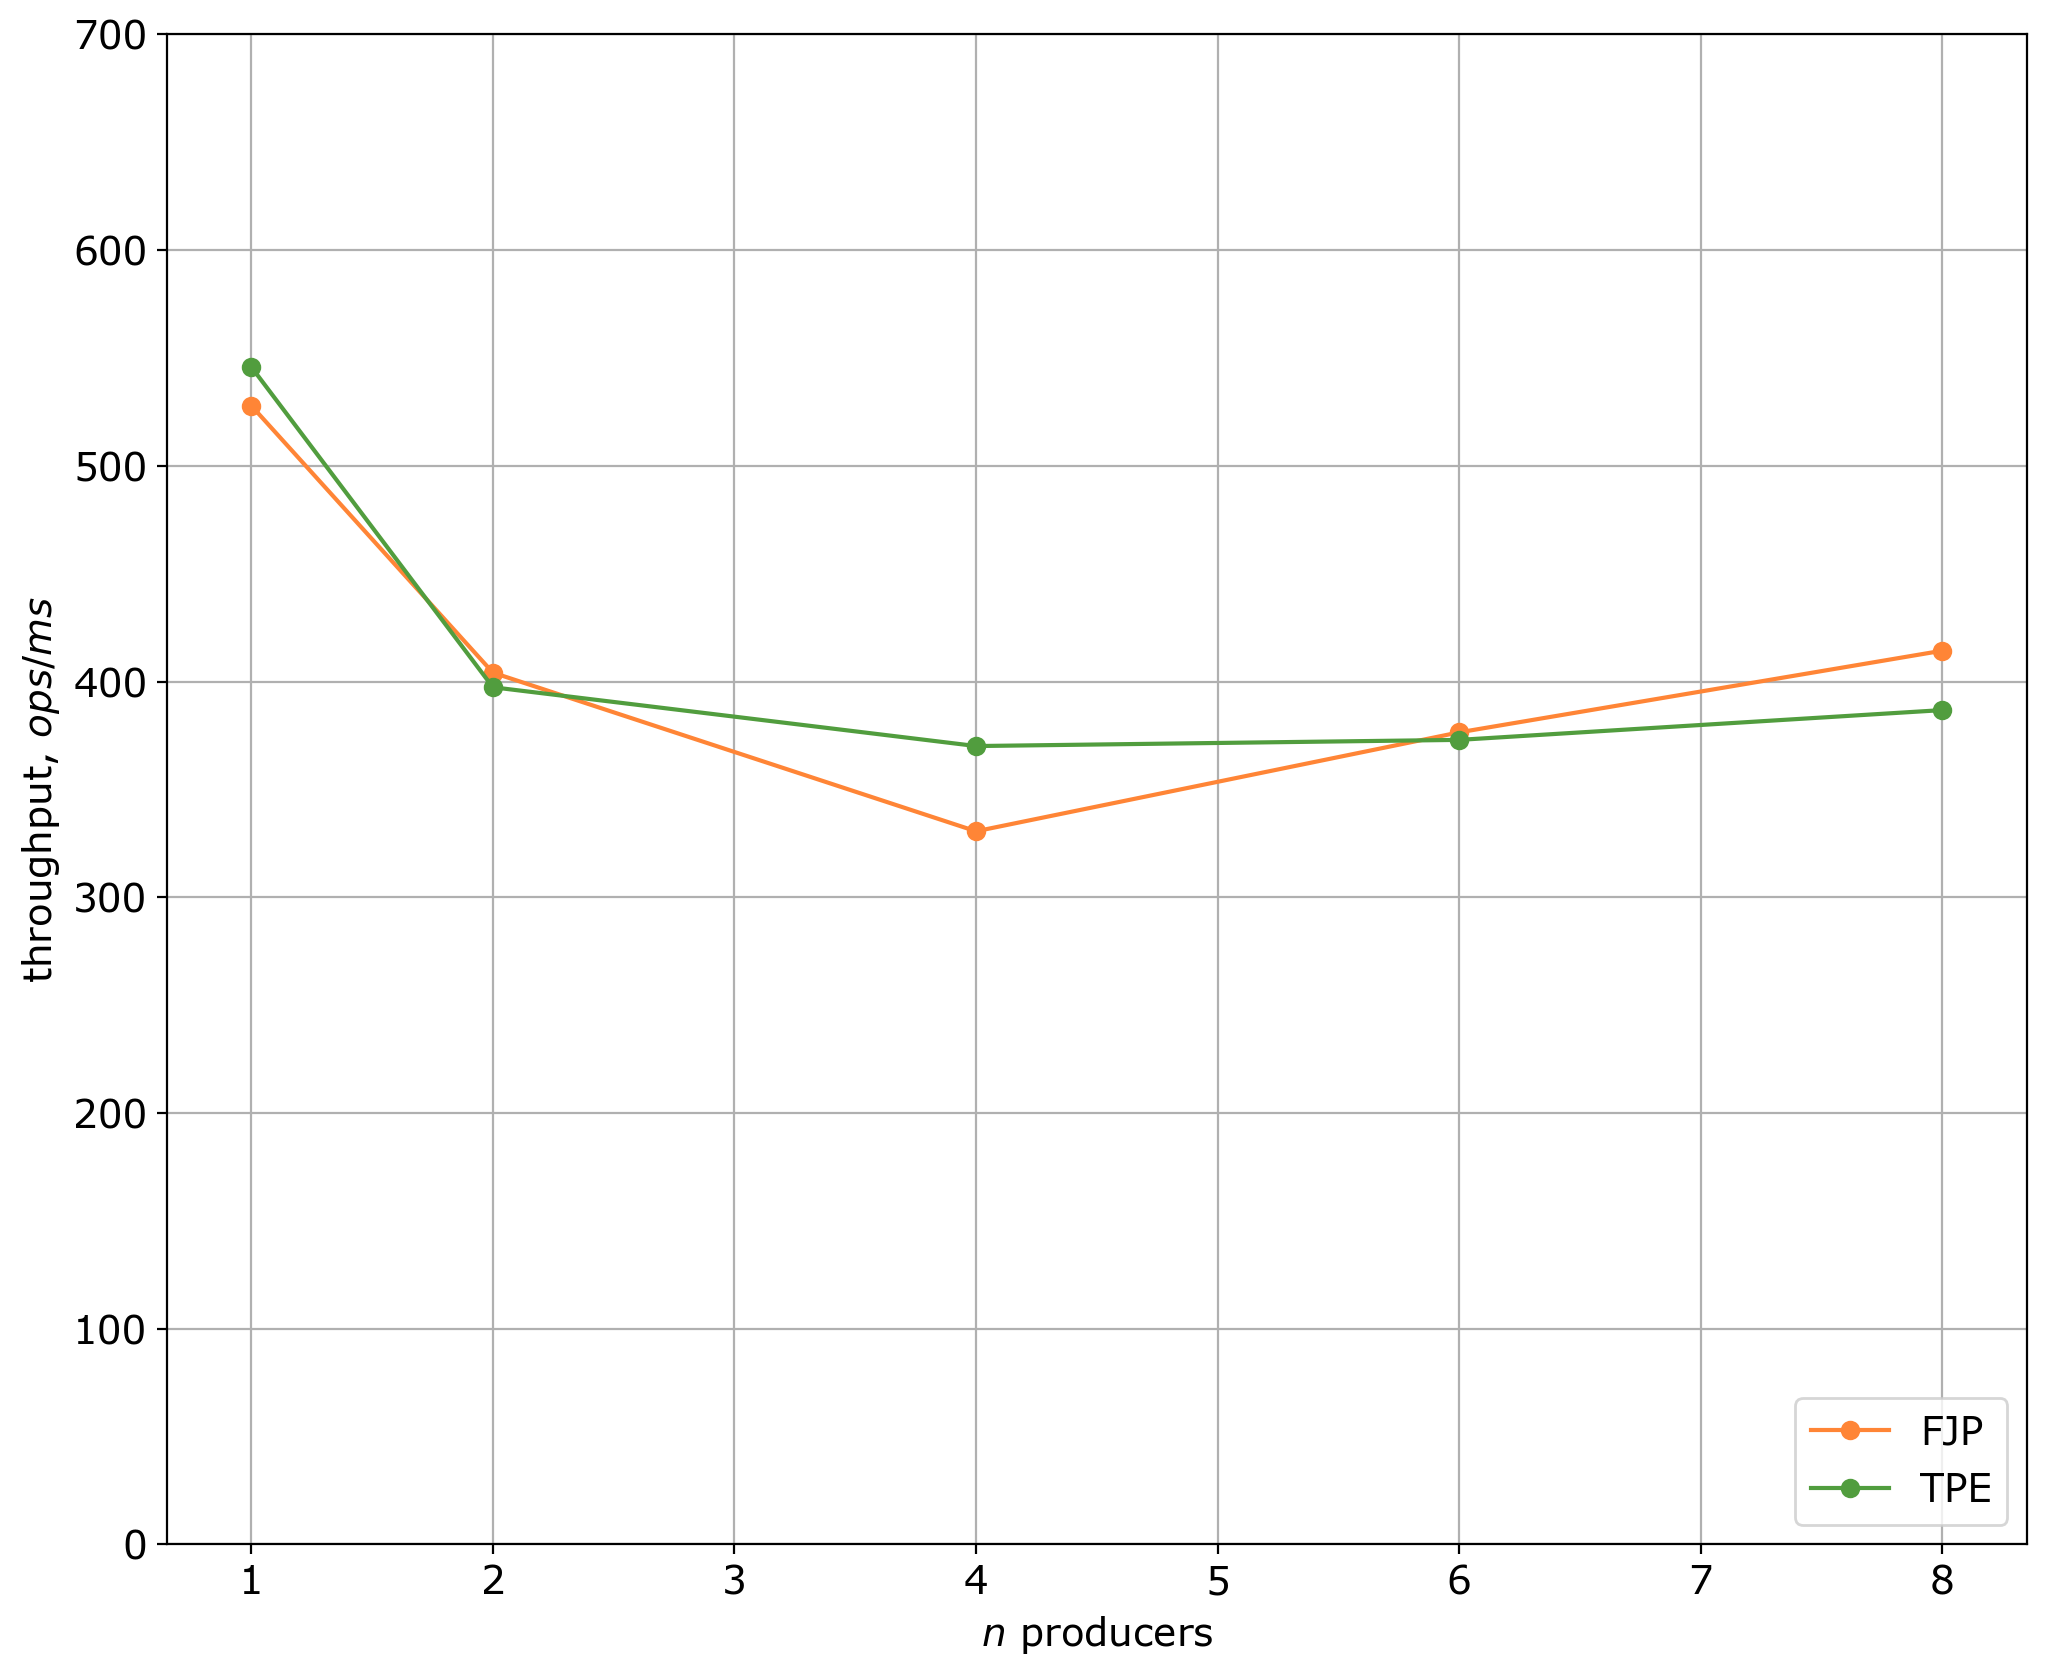

In [307]:
plot_equal_prod_dist(df, 4, types, colors, 0, 700)

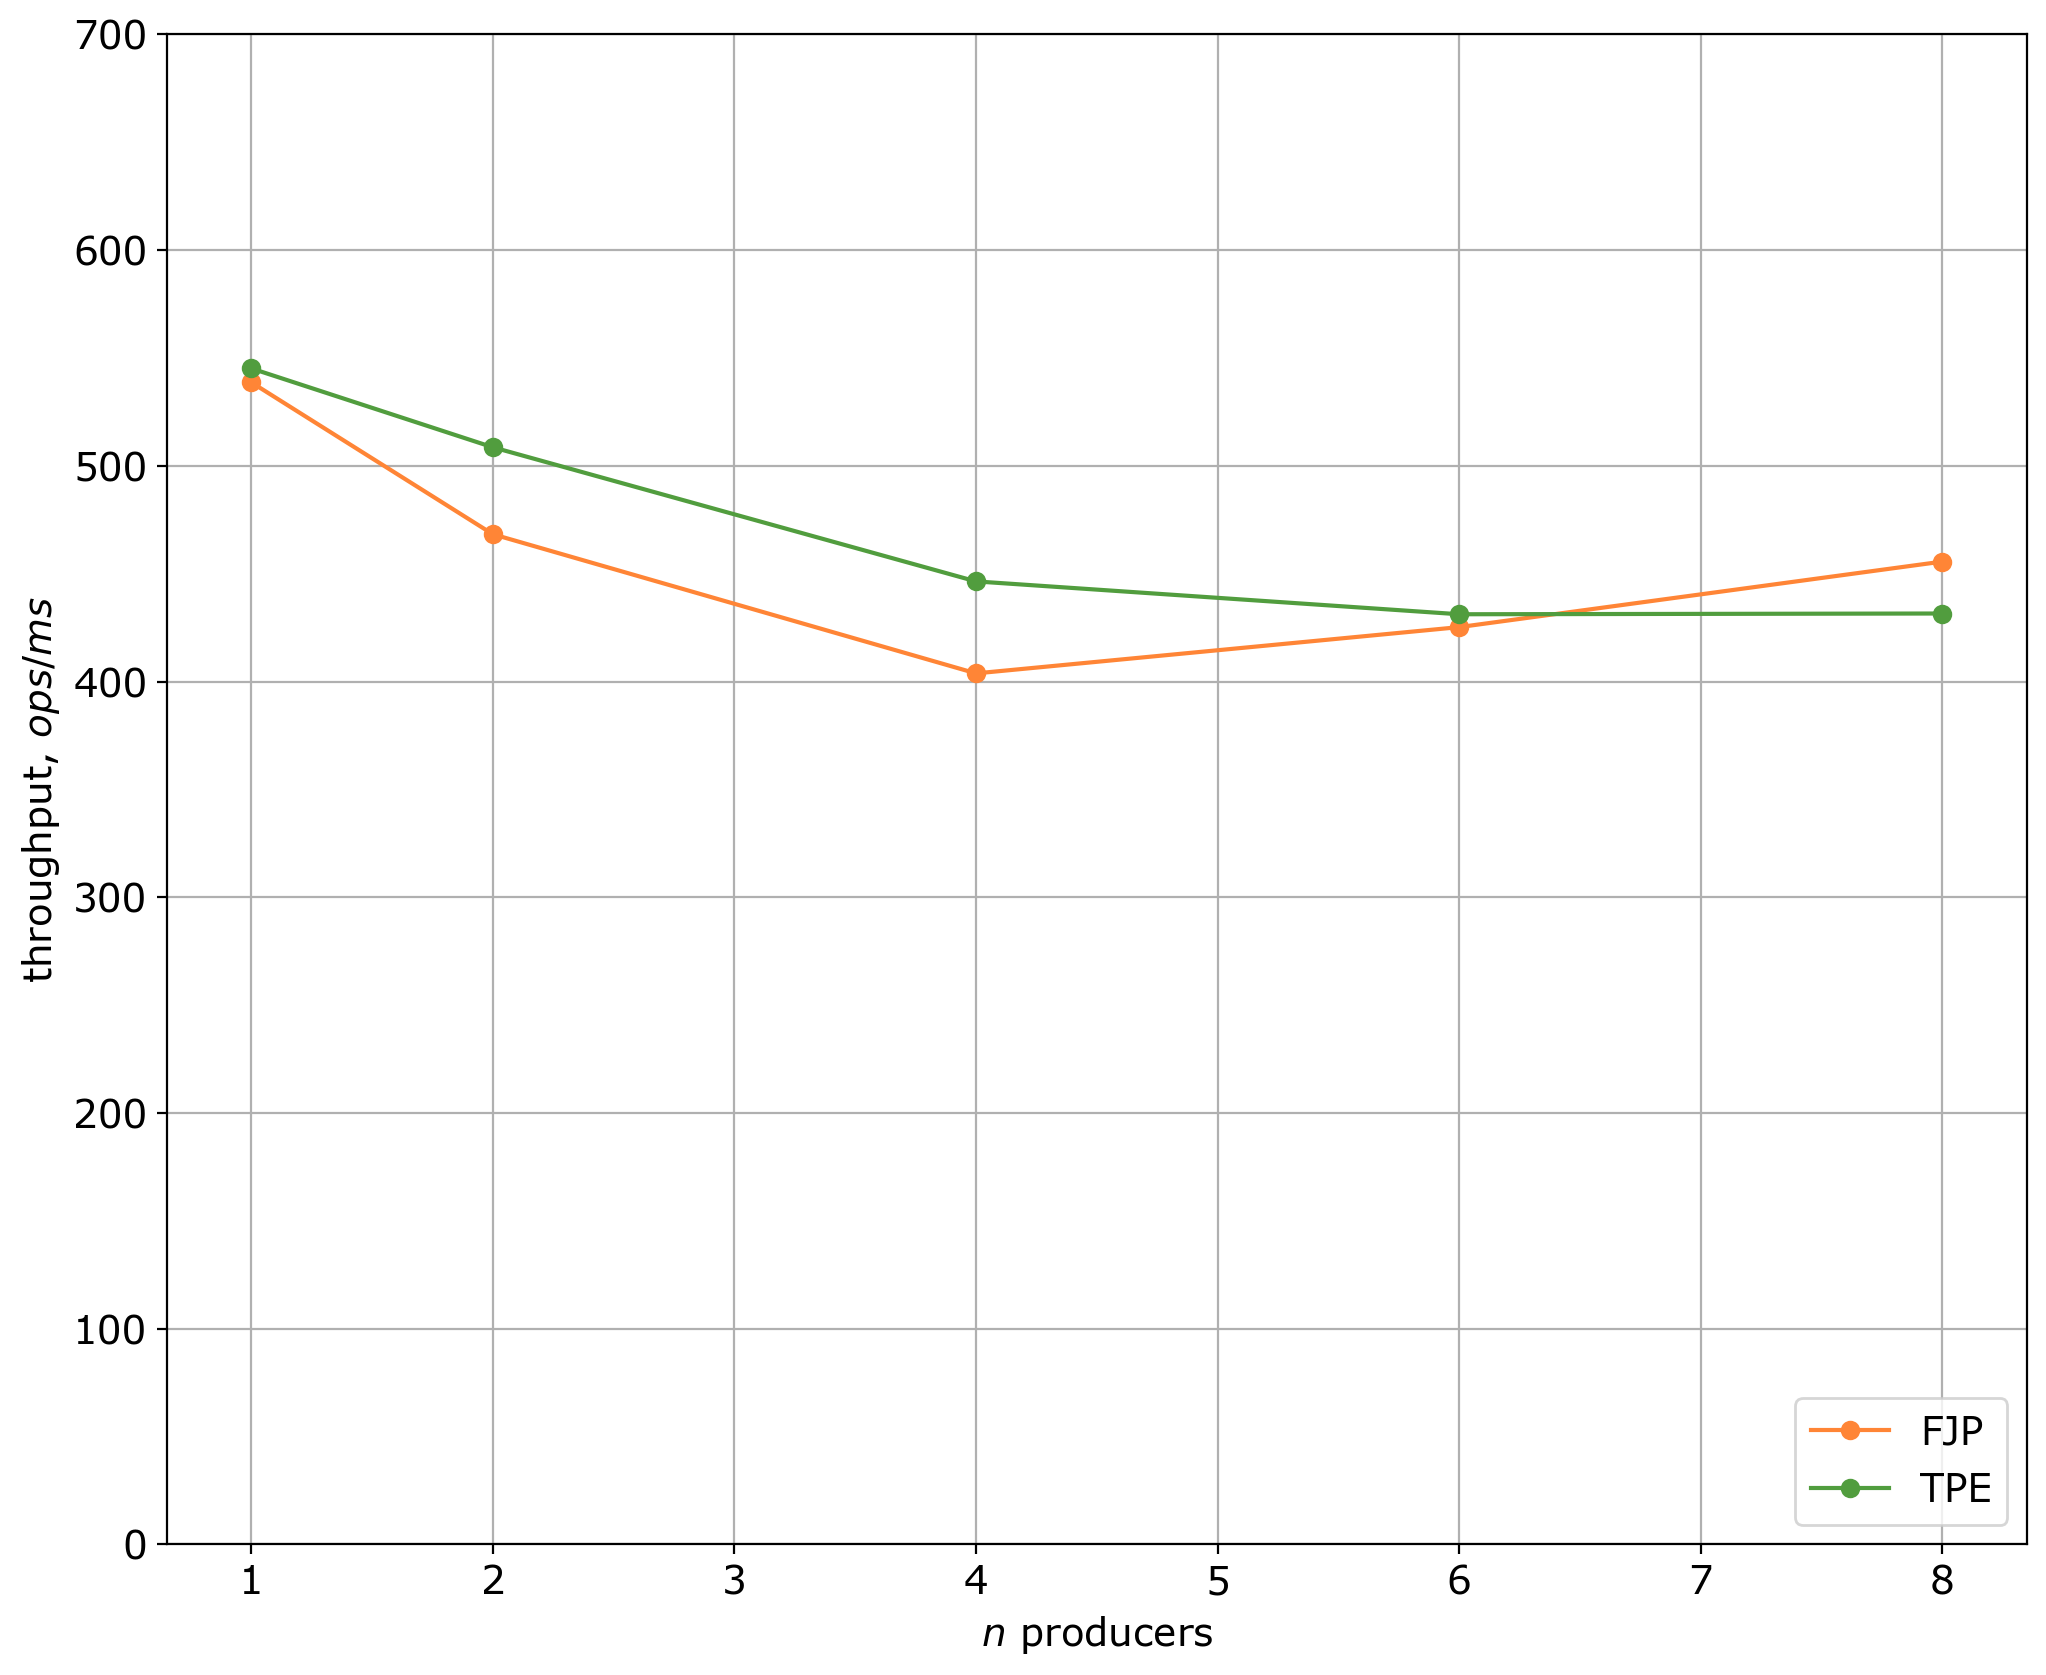

In [308]:
plot_equal_prod_dist(df, 6, types, colors, 0, 700)

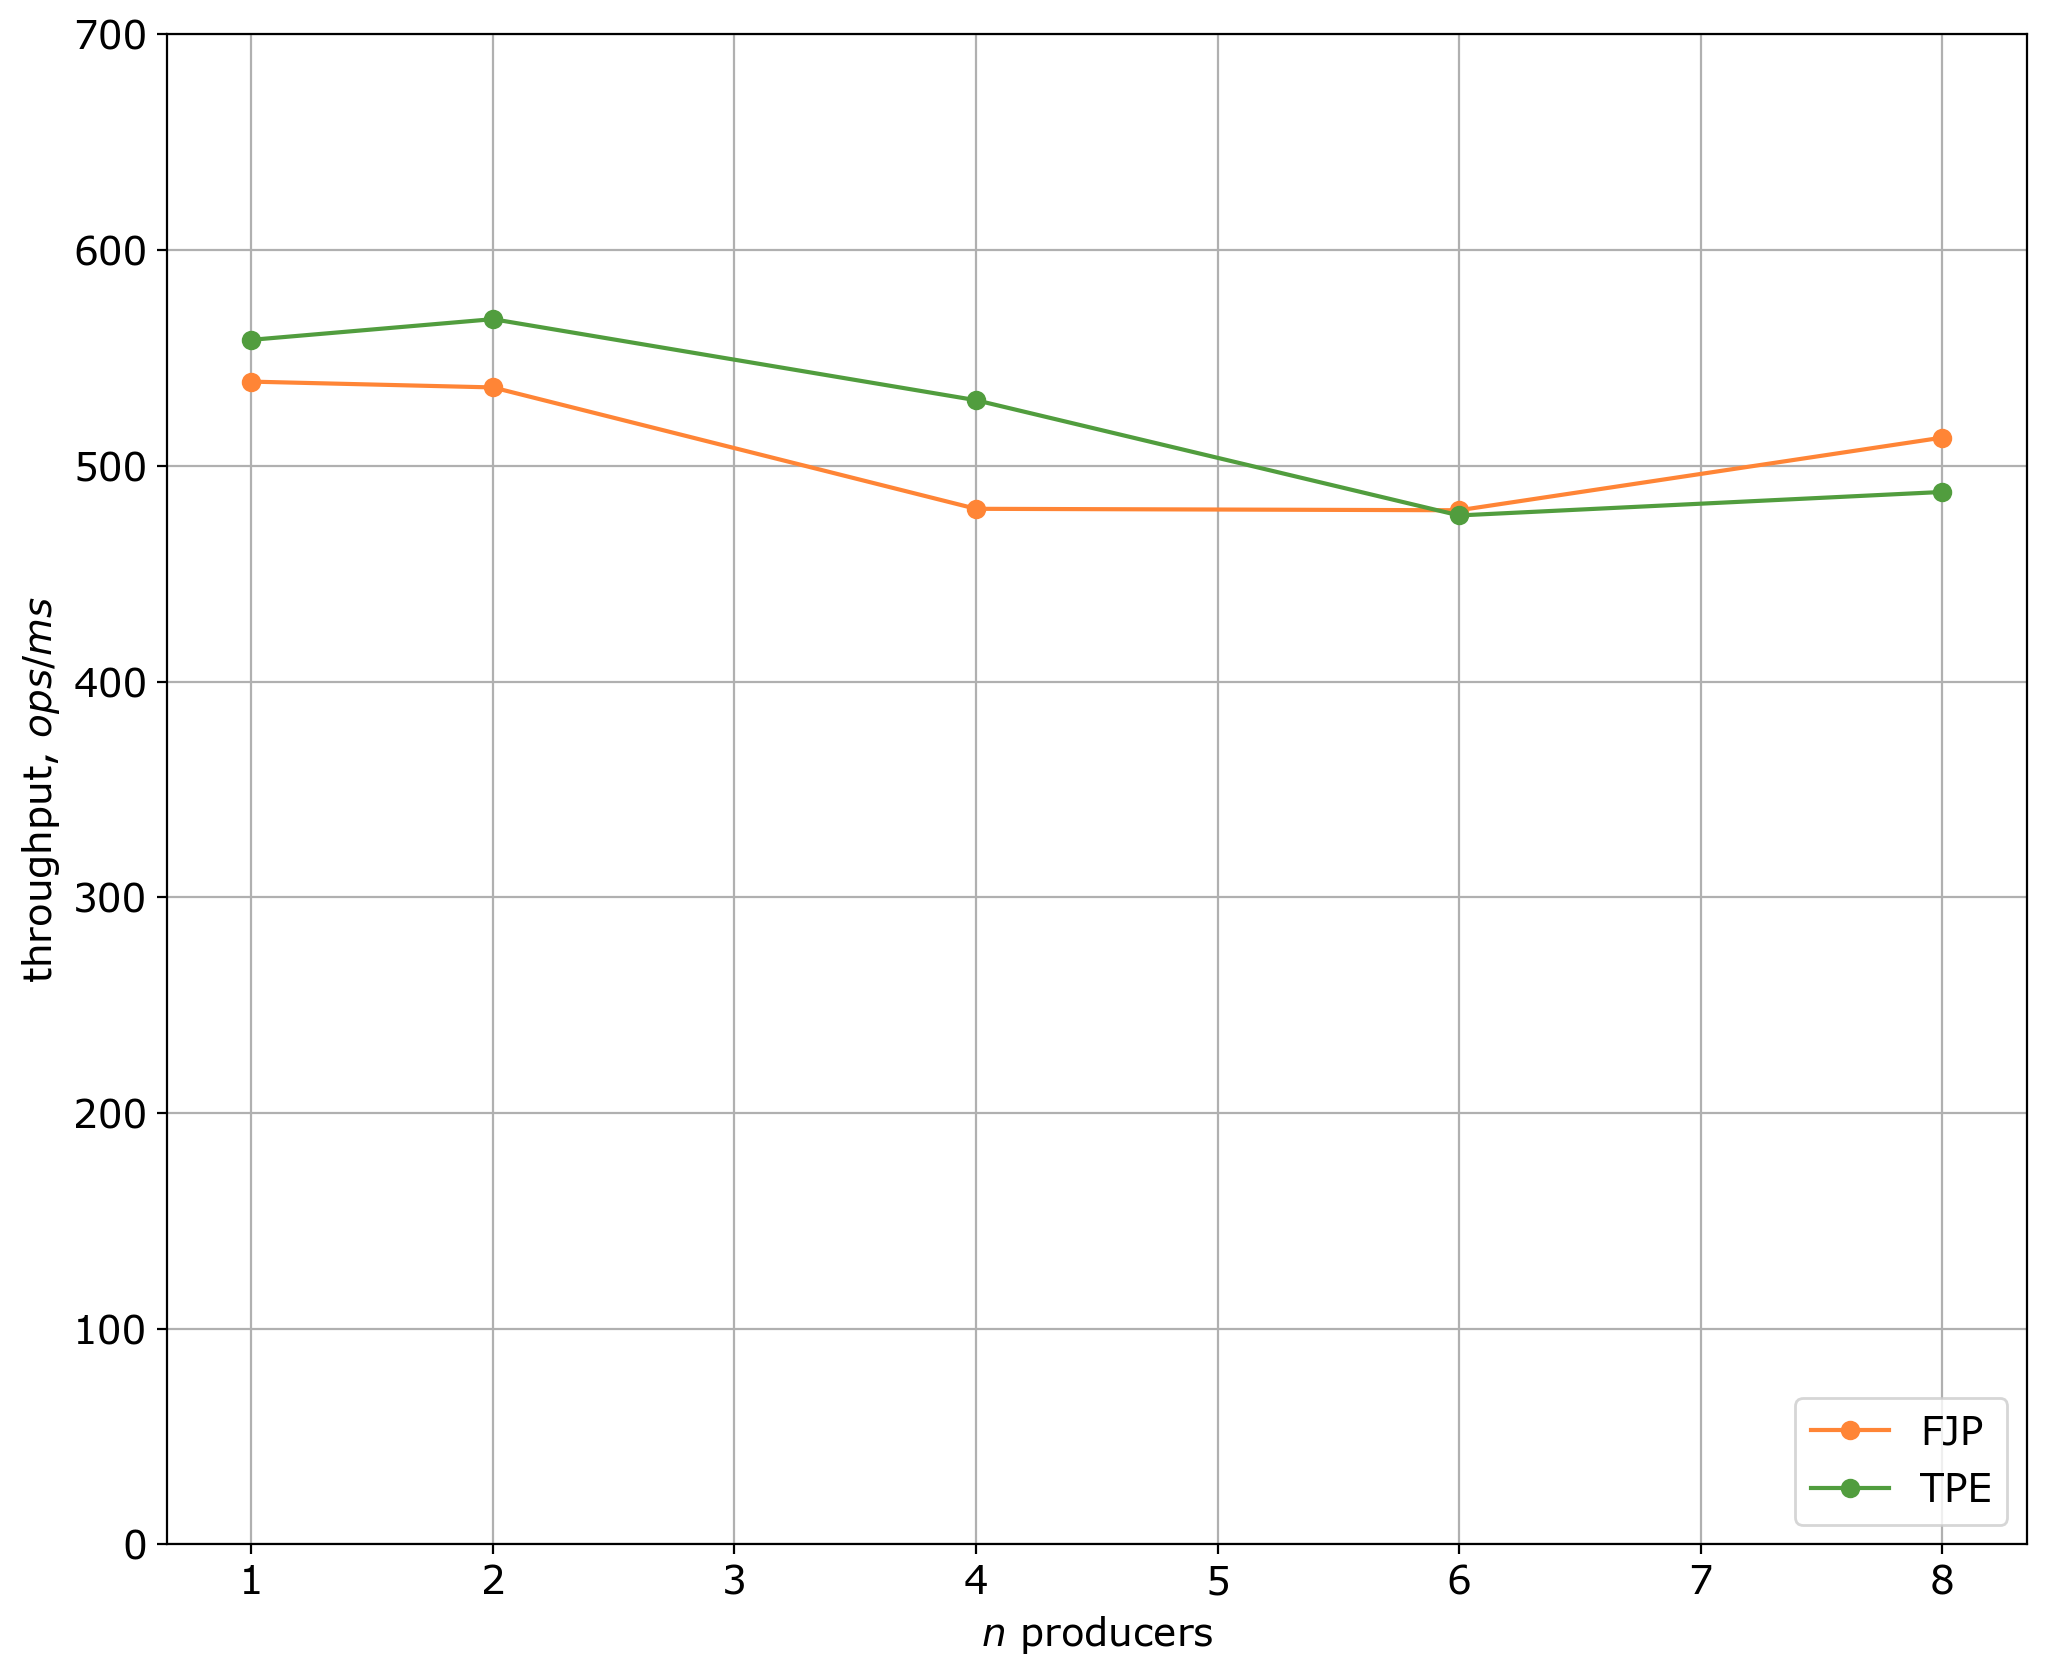

In [309]:
plot_equal_prod_dist(df, 8, types, colors, 0, 700)

In [310]:
def plot_combined_prod(df, nConsumers):
    df1 = filter_cons(df, nConsumers)
    x = [1, 2, 4, 6, 8]
    ys = []
    ys_labels = ["SALSA", "FJP", "TPE"]
    colors = ["#C53A32", "#FF8536", "#519D3E"]
    
    df2 = filter_salsa_type(df1, "0", "100", "1")
    ys.append(list(df2["Score"].to_numpy()))
    
    df3 = filter_type(df1, "FJP")
    ys.append(list(df3["Score"].to_numpy()))
    
    df4 = filter_type(df1, "TPE")
    ys.append(list(df4["Score"].to_numpy()))
    
    plot(x, ys, "$n$ consumers", ys_labels, colors, 0, 700)
    
def plot_combined_cons(df, nProducers):
    df1 = filter_prods(df, nProducers)
    x = [1, 2, 4, 6, 8]
    ys = []
    ys_labels = ["SALSA", "FJP", "TPE"]
    colors = ["#C53A32", "#FF8536", "#519D3E"]
    
    df2 = filter_salsa_type(df1, "0", "100", "1")
    ys.append(list(df2["Score"].to_numpy()))
    
    df3 = filter_type(df1, "FJP")
    ys.append(list(df3["Score"].to_numpy()))
    
    df4 = filter_type(df1, "TPE")
    ys.append(list(df4["Score"].to_numpy()))
    
    plot(x, ys, "$n$ consumers", ys_labels, colors, 0, 700)

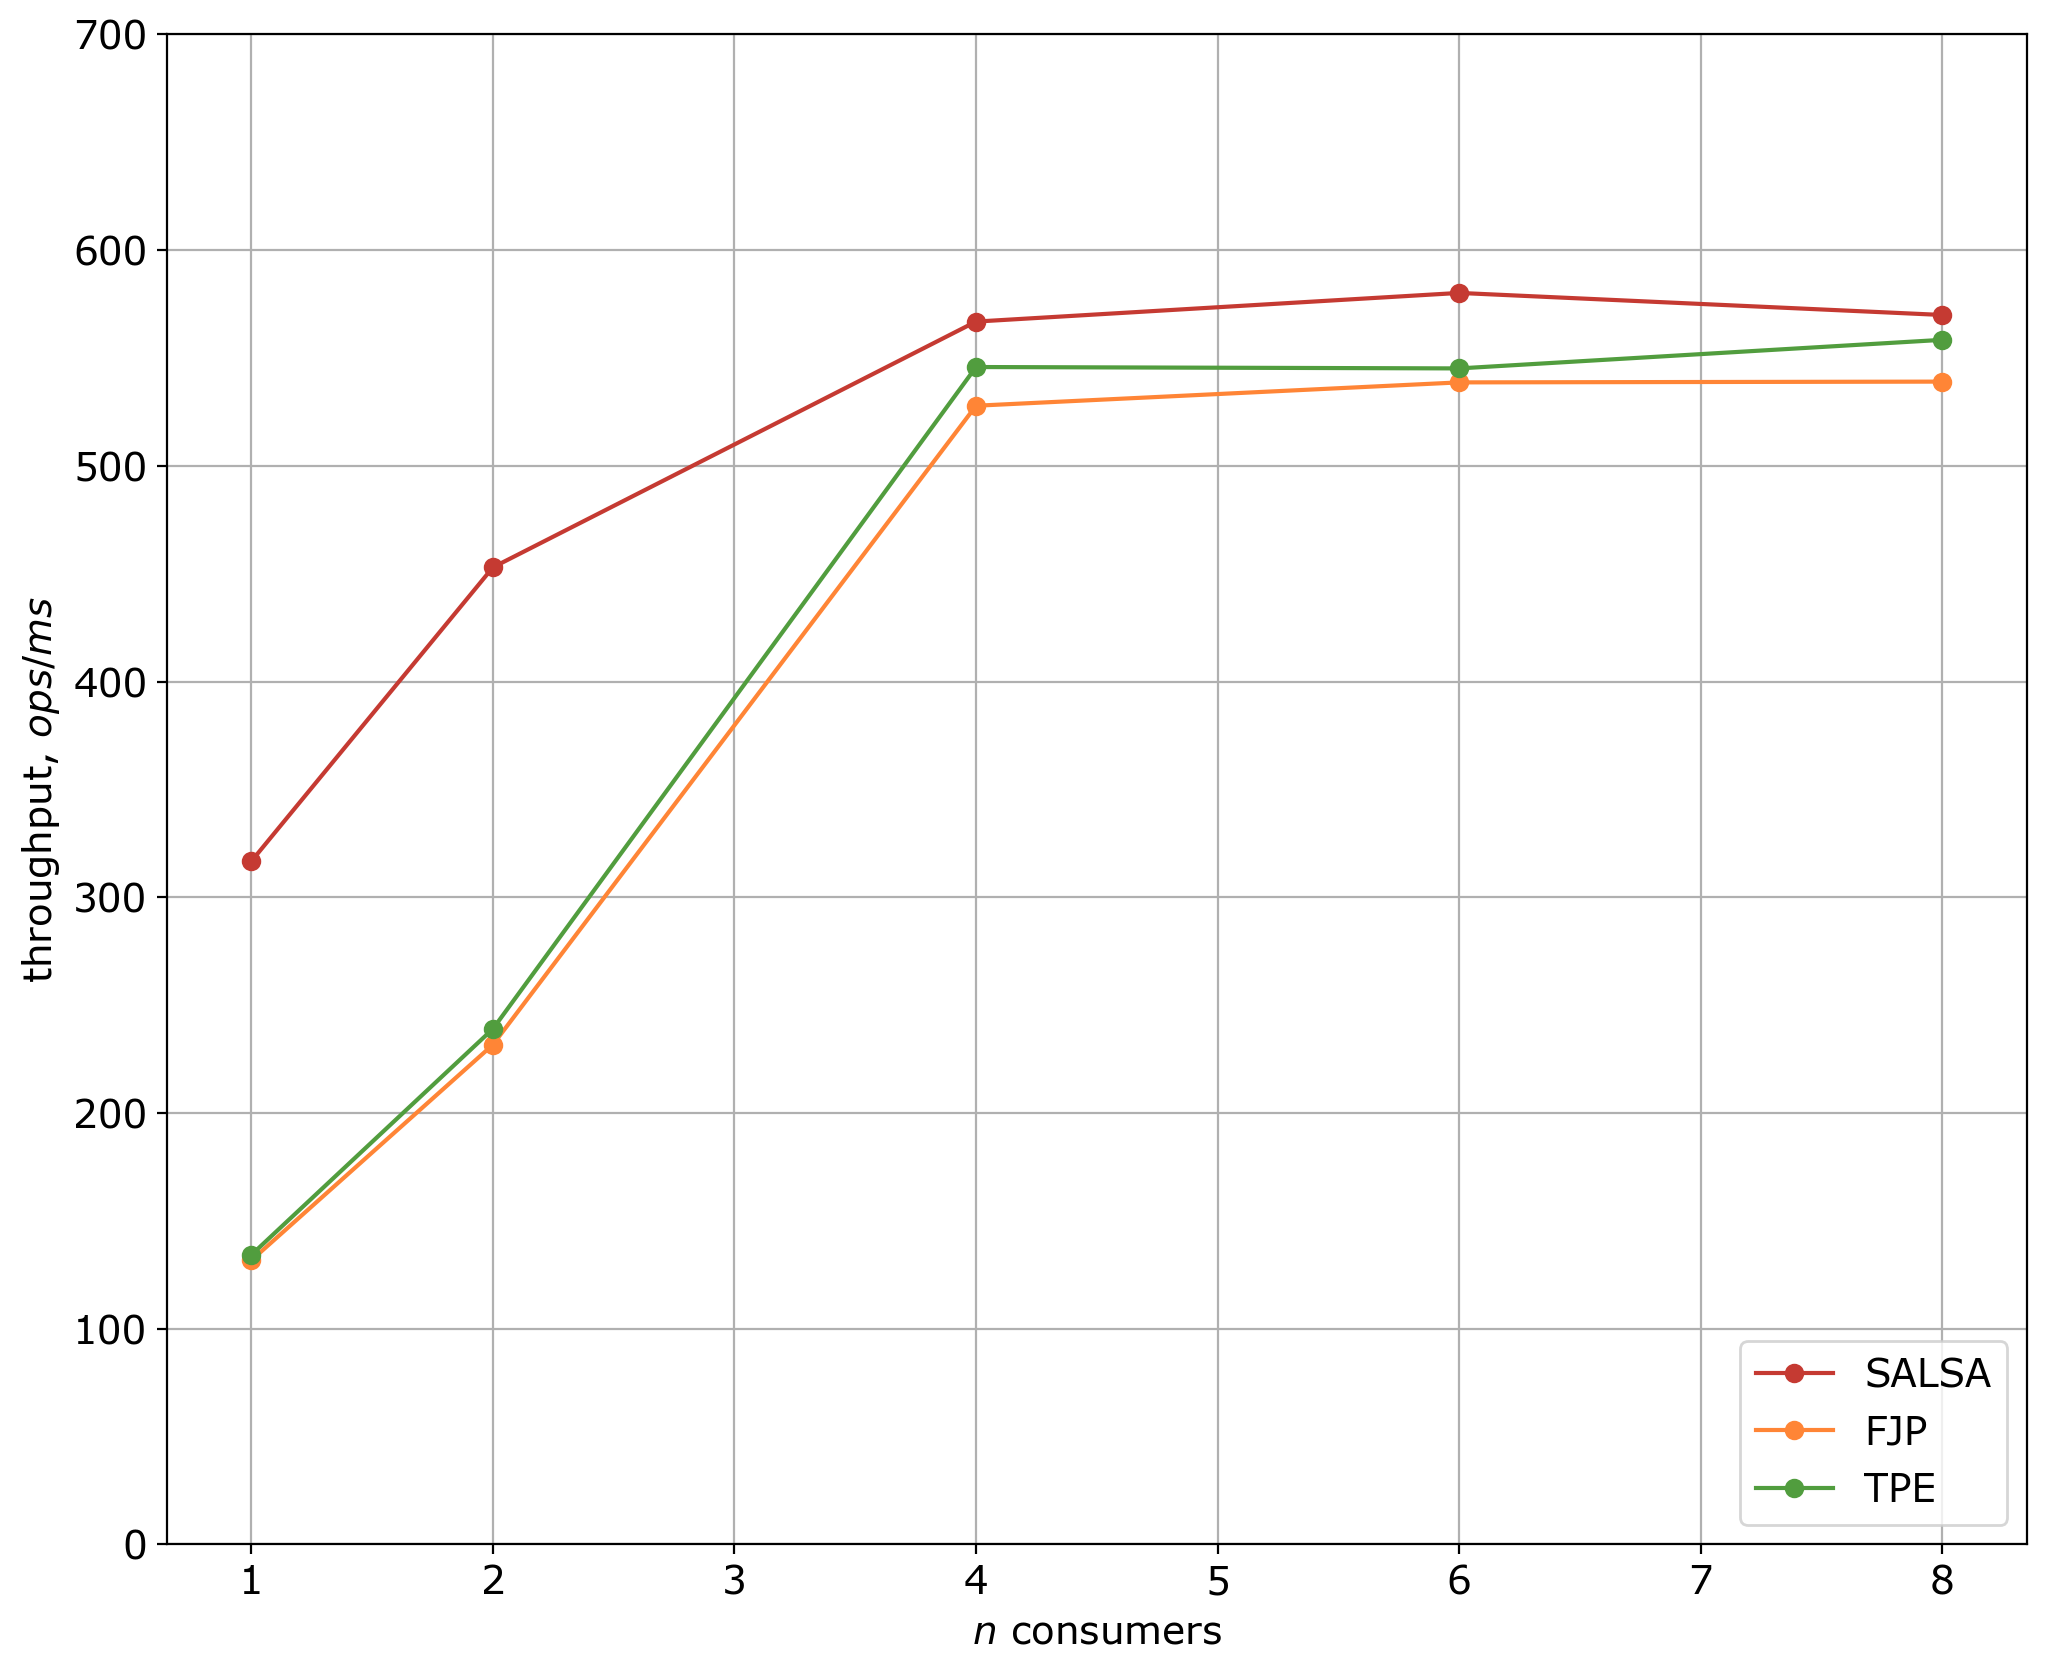

In [311]:
plot_combined_prod(df, 1)

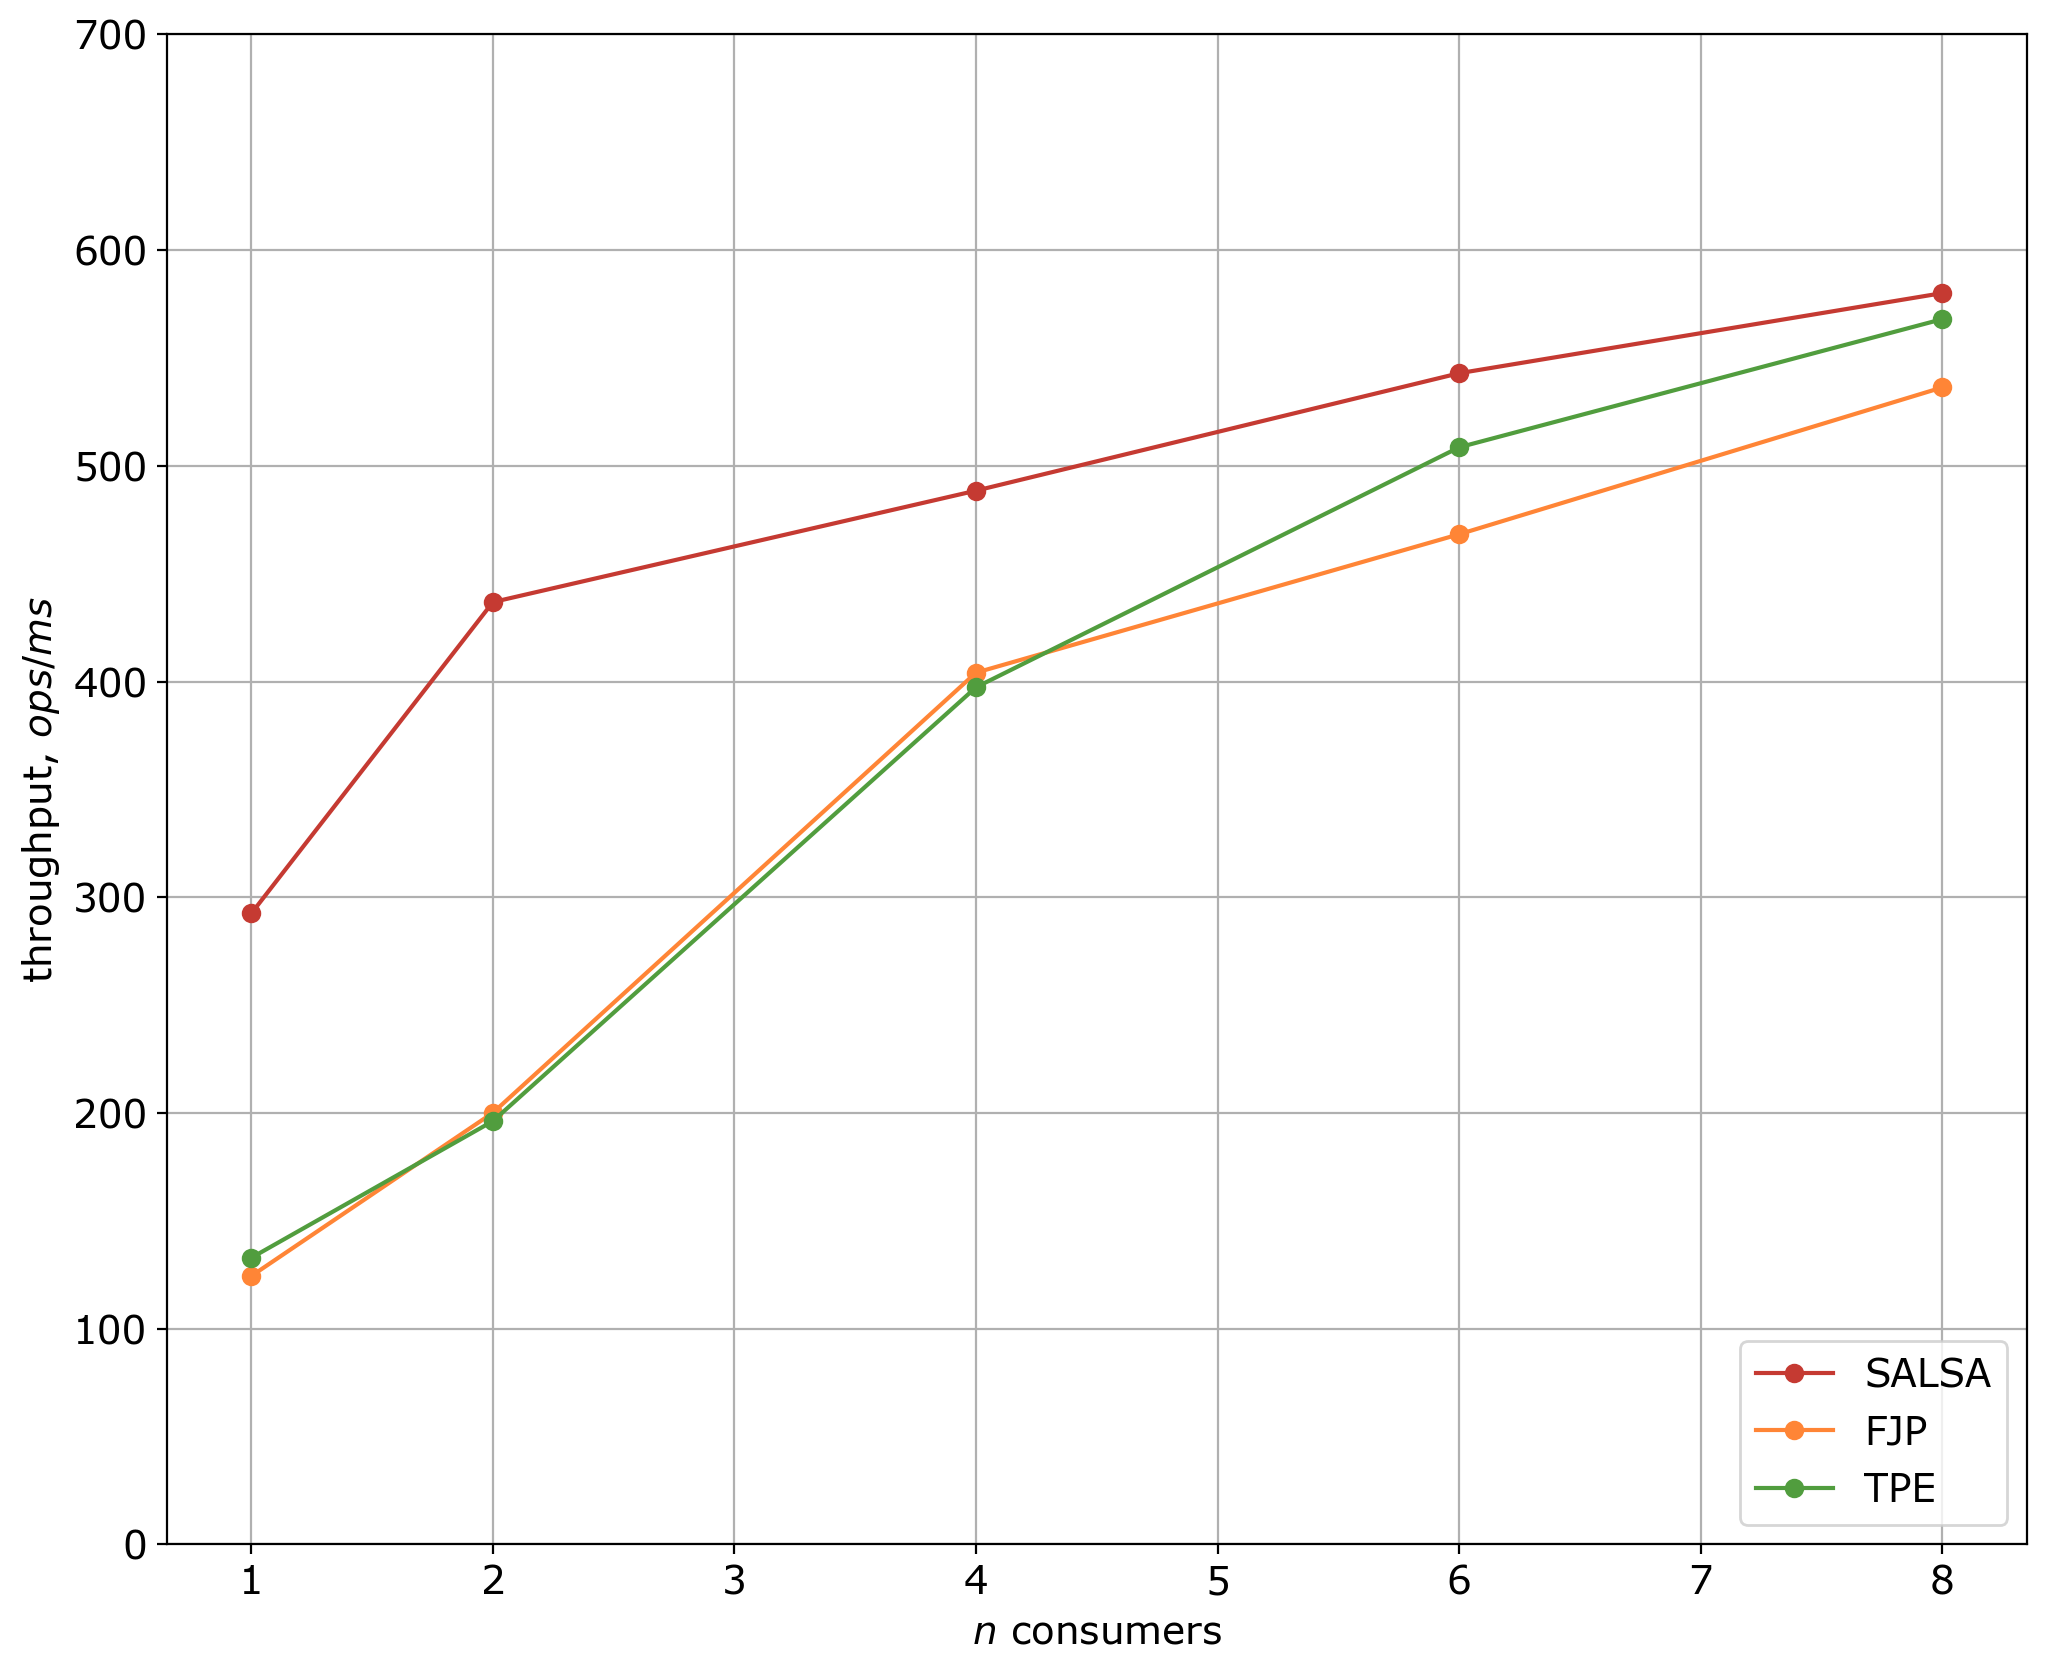

In [312]:
plot_combined_prod(df, 2)

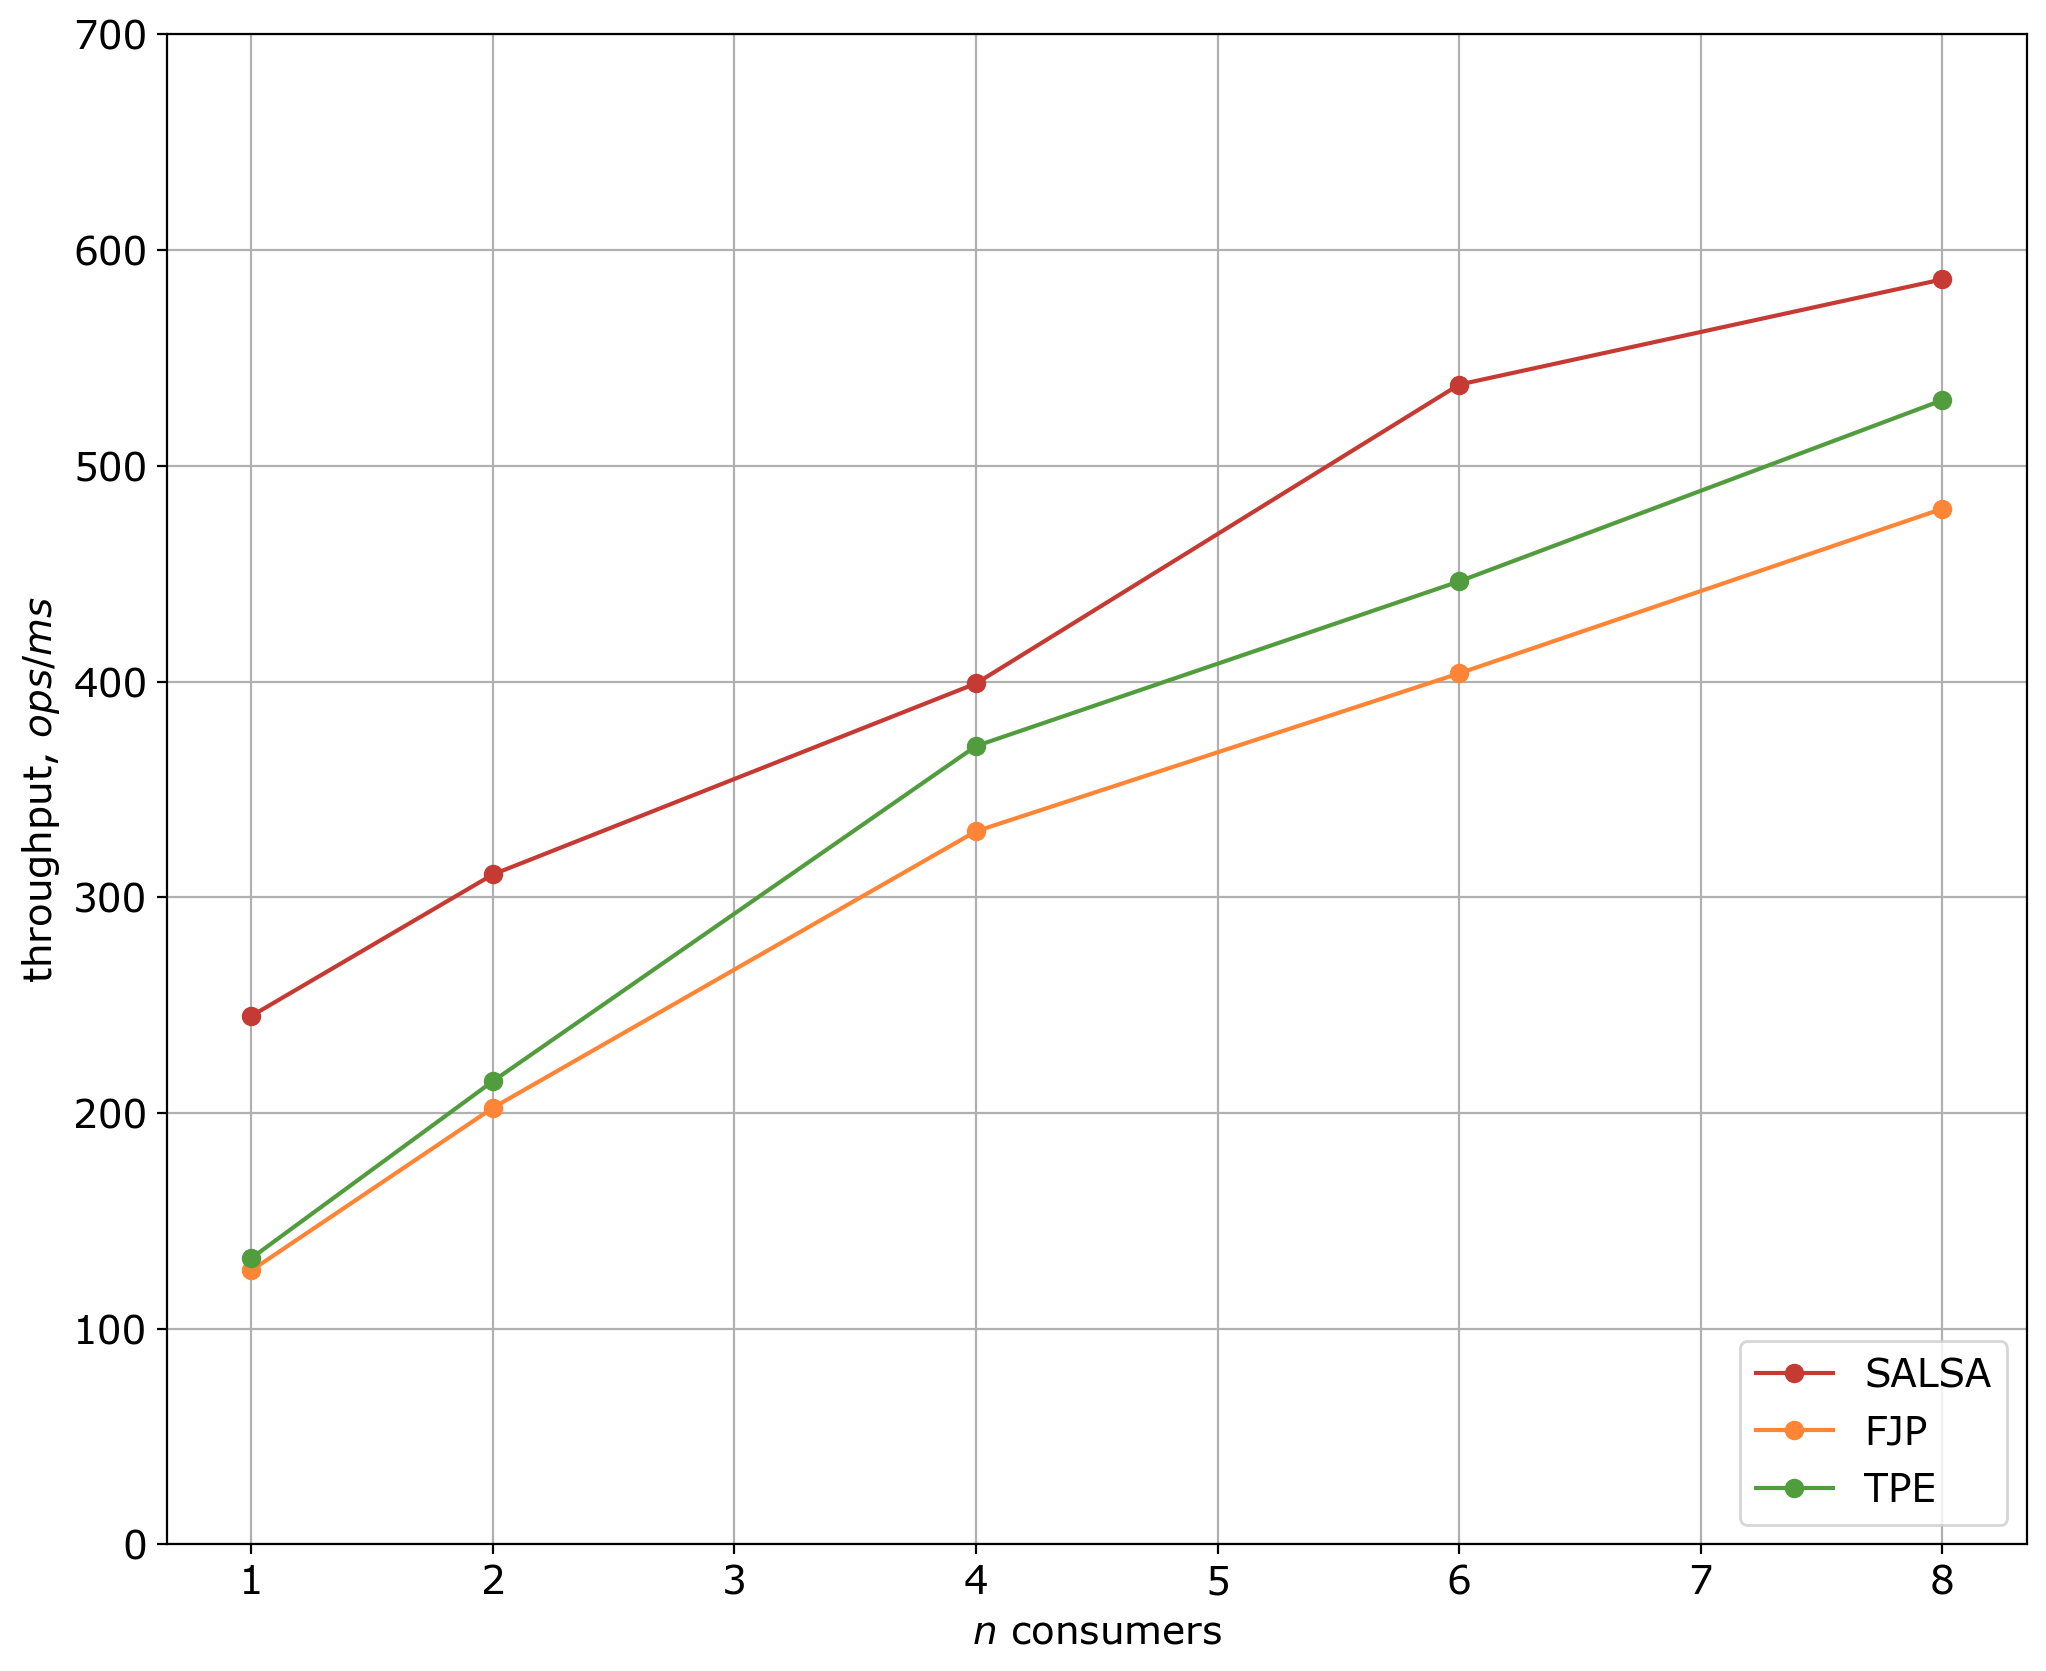

In [313]:
plot_combined_prod(df, 4)

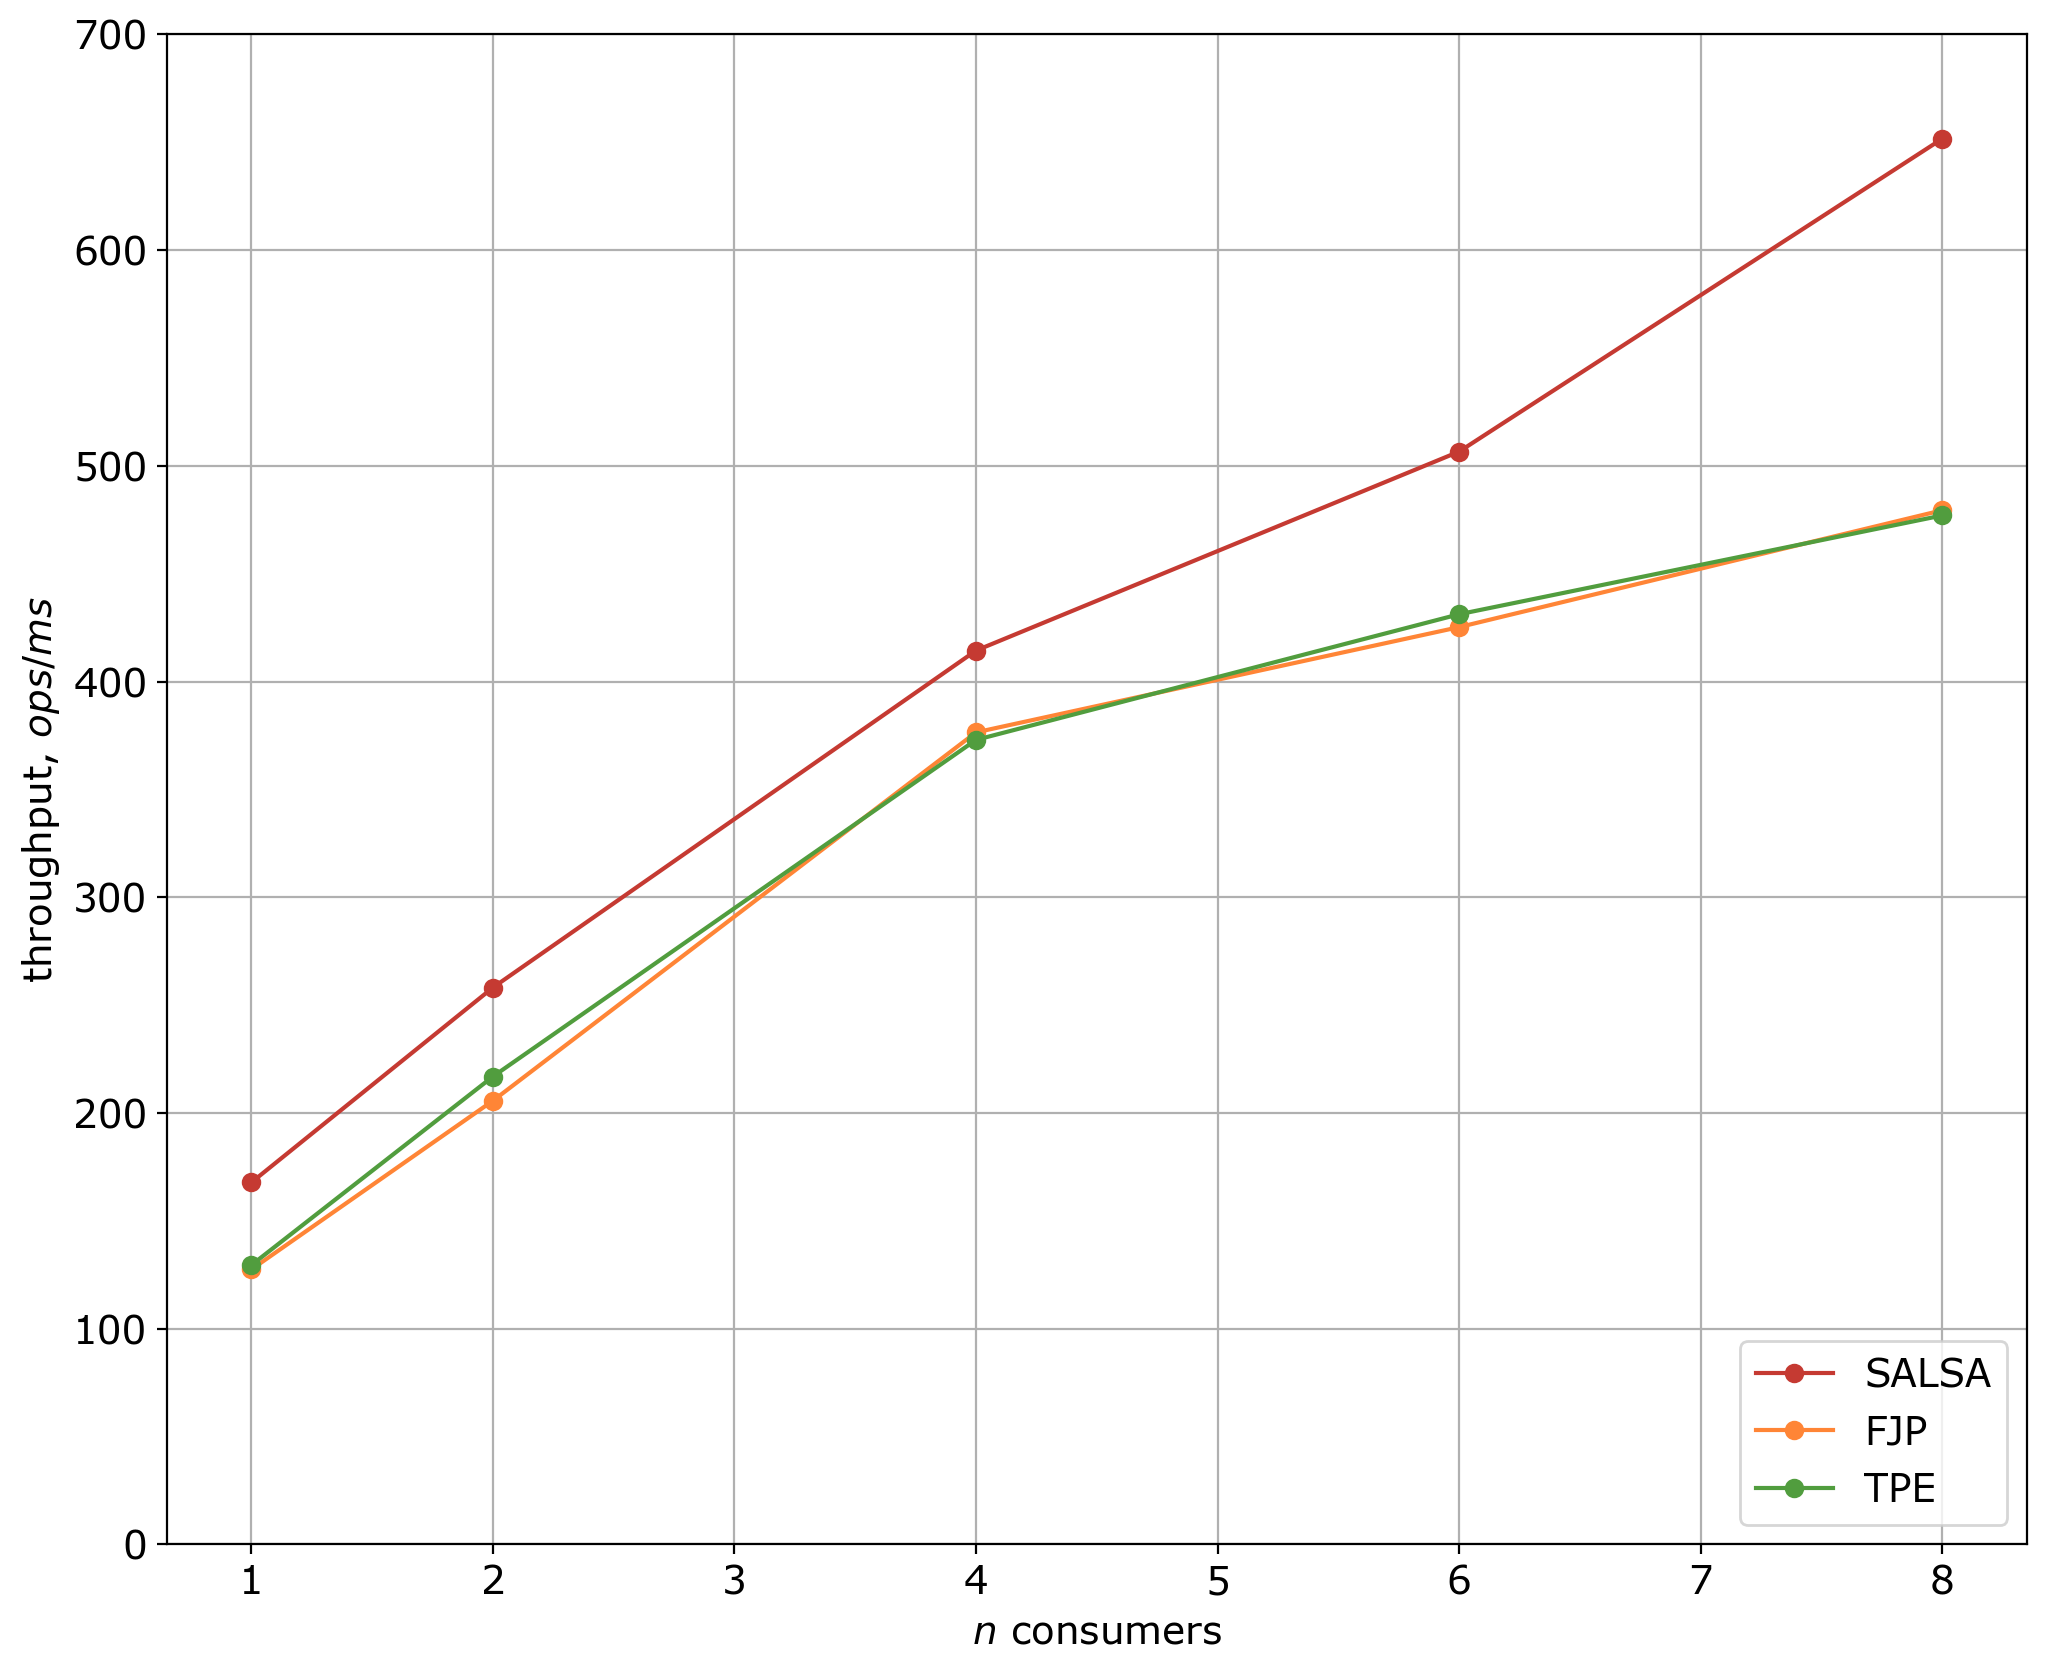

In [314]:
plot_combined_prod(df, 6)

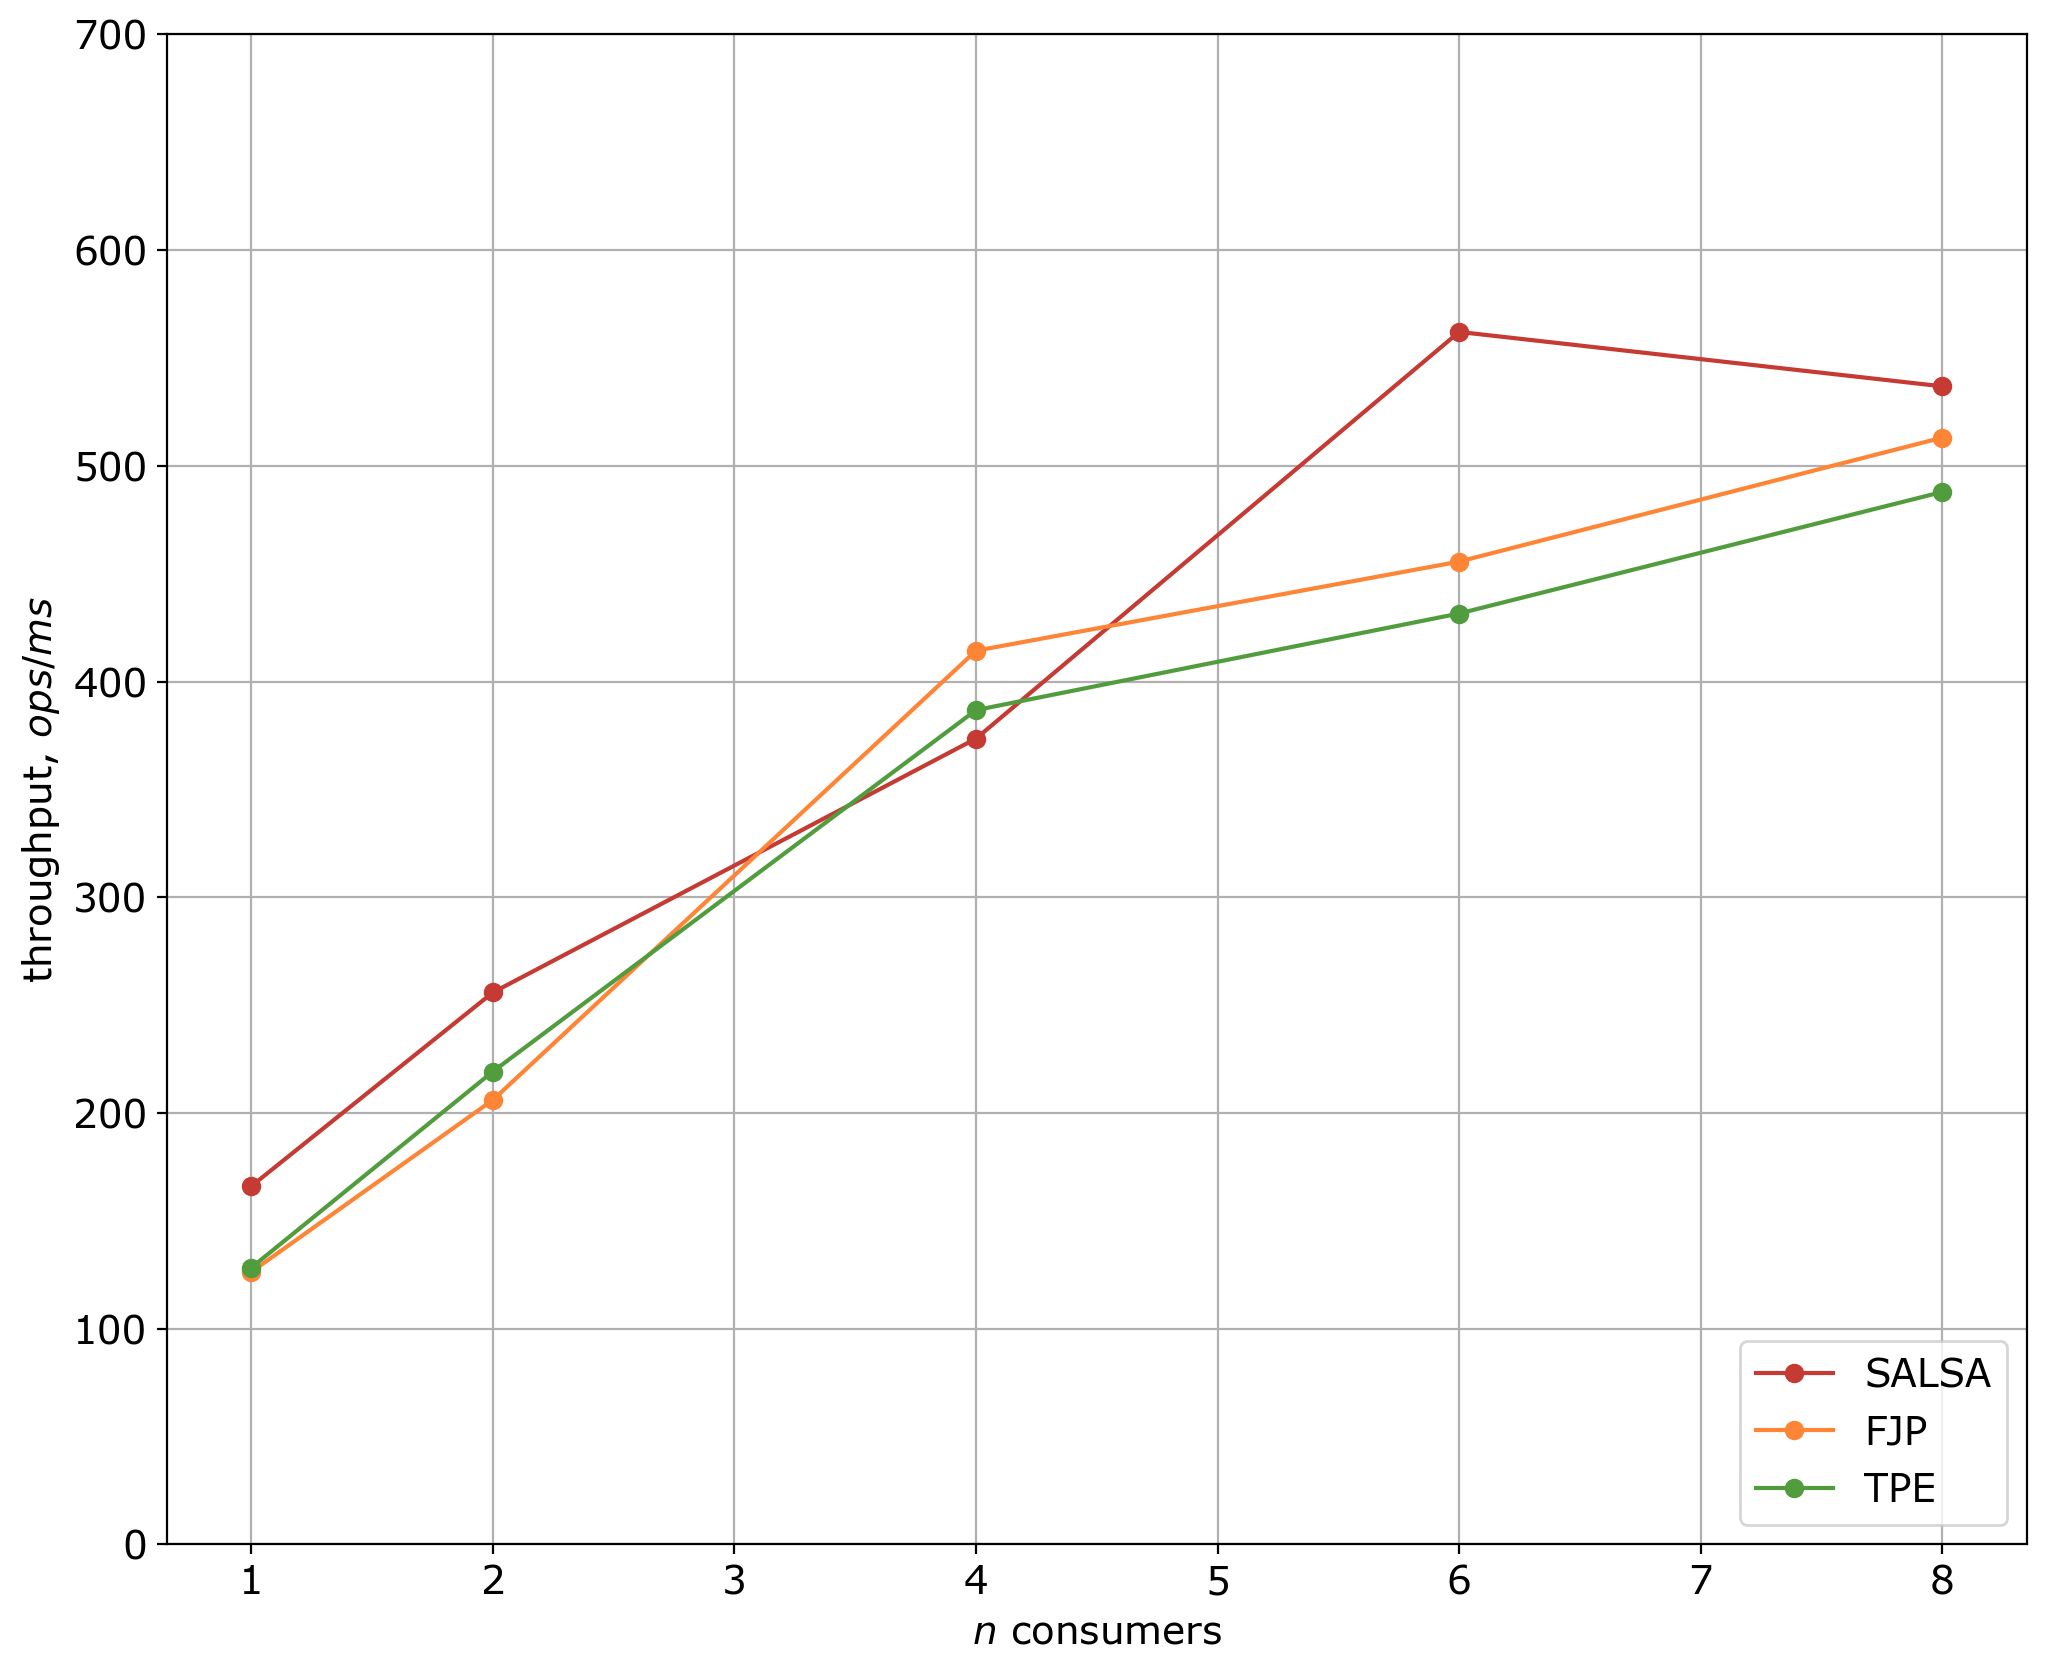

In [315]:
plot_combined_prod(df, 8)

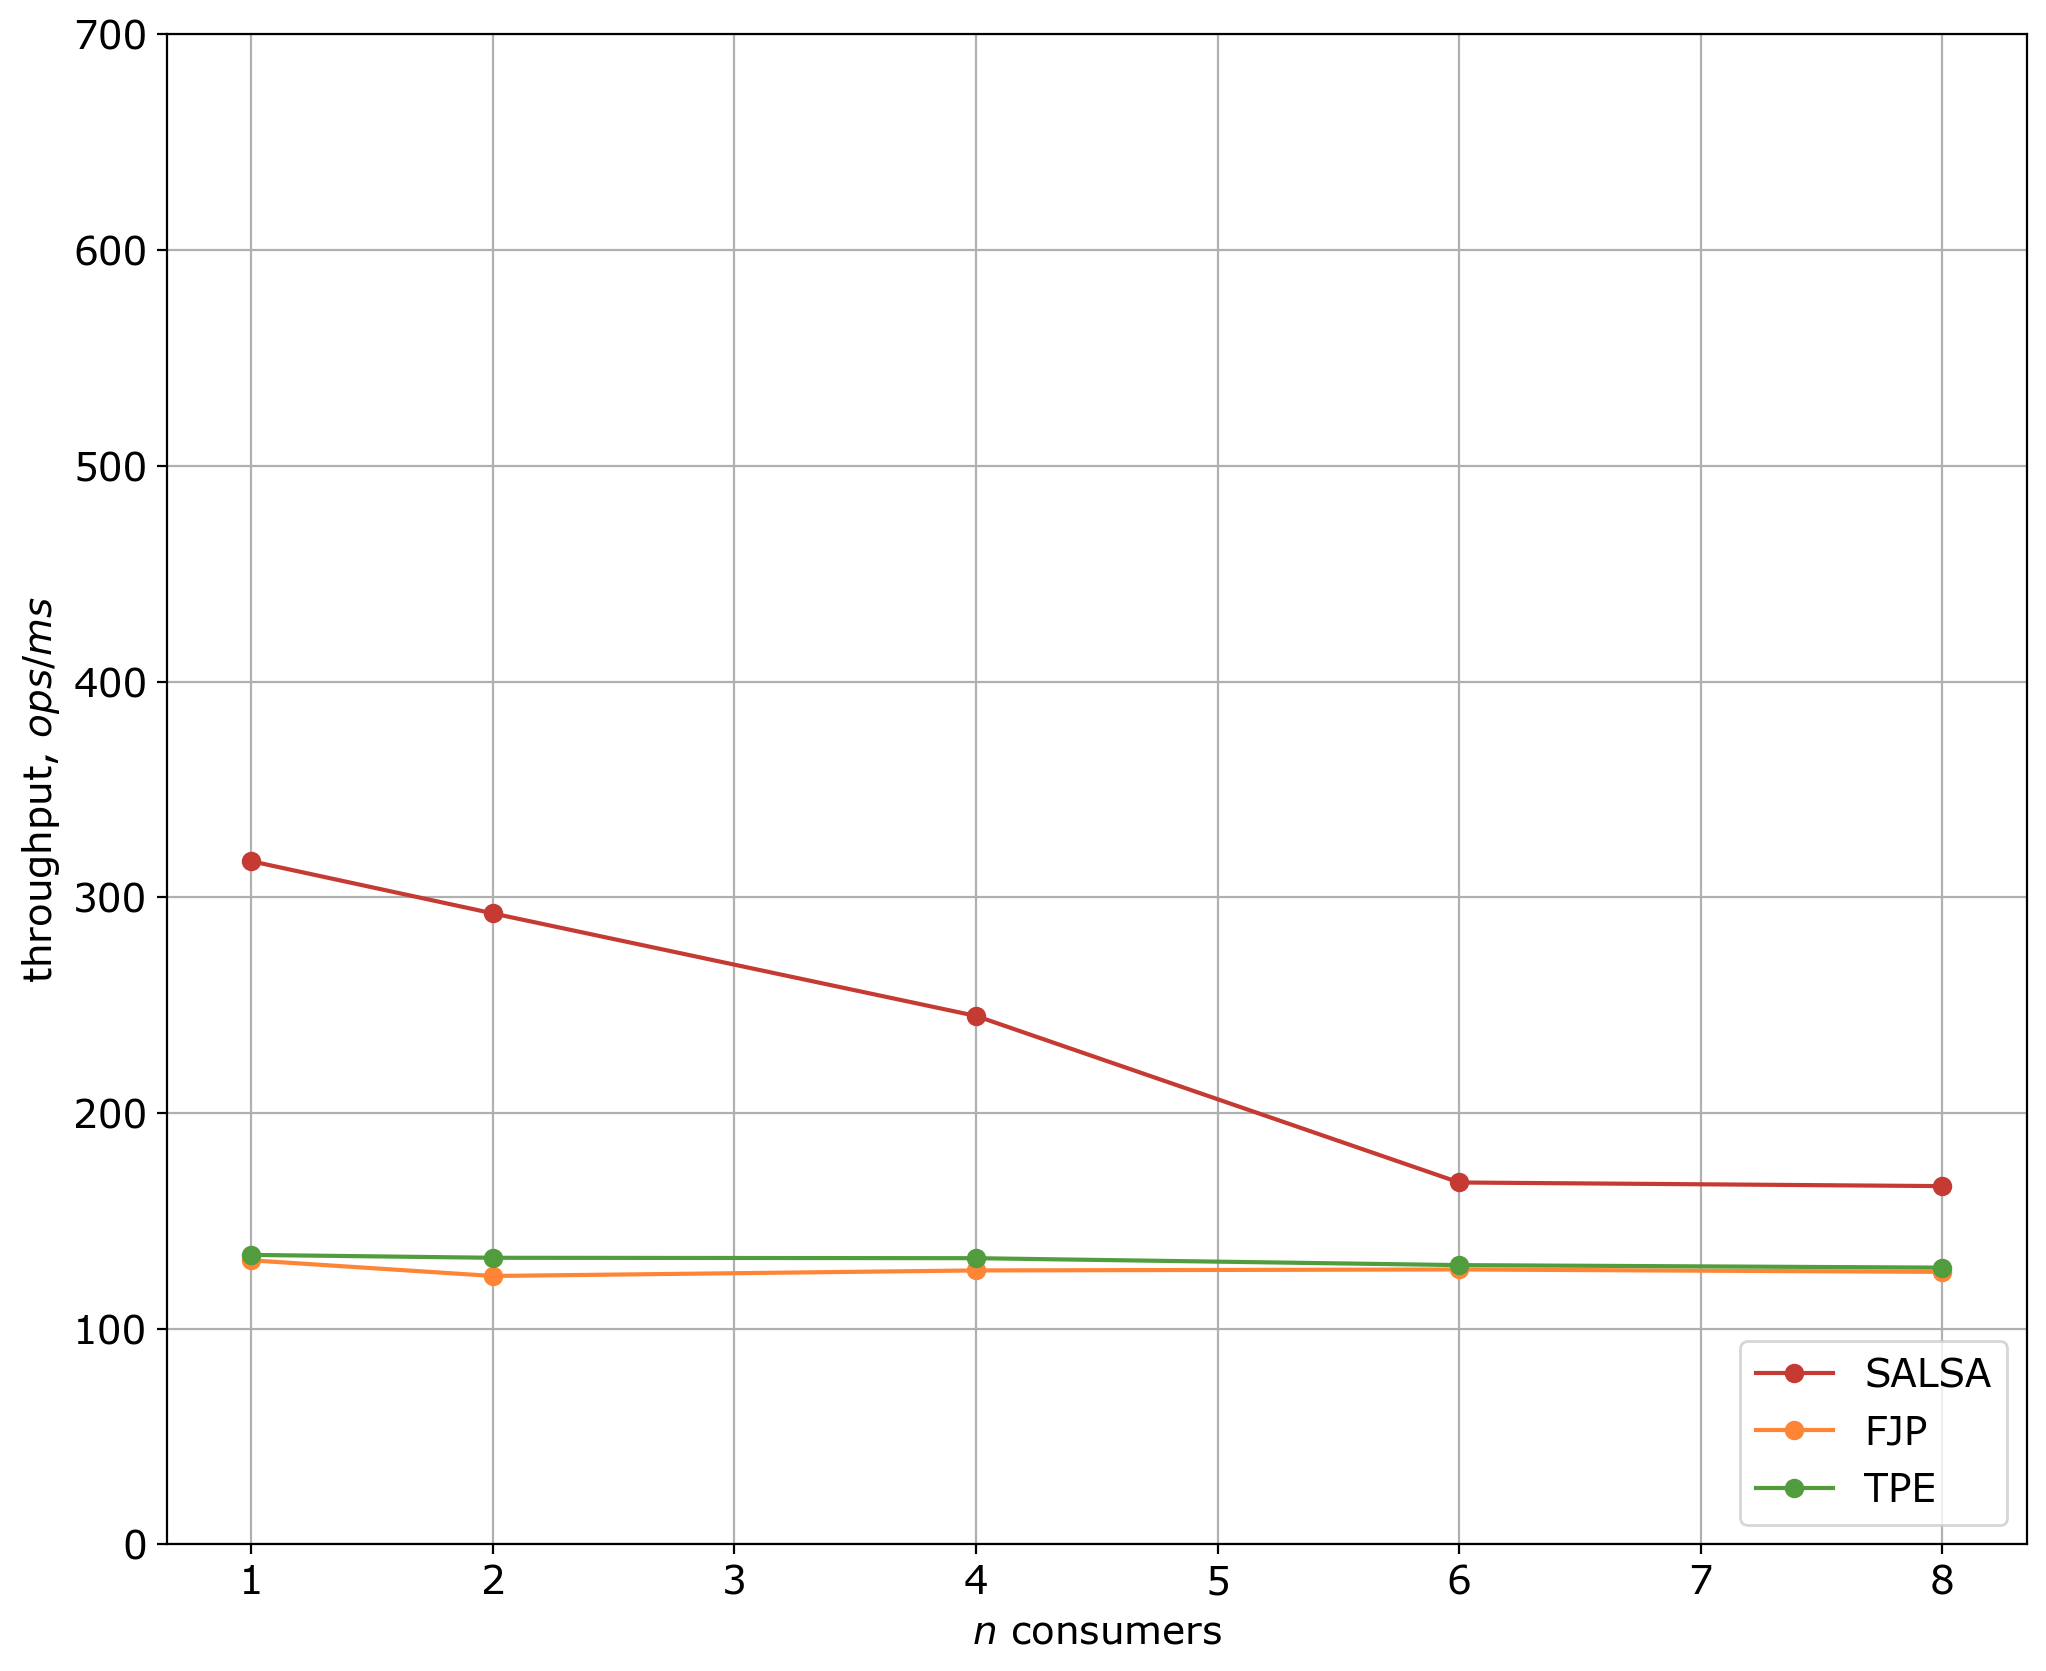

In [316]:
plot_combined_cons(df, 1)

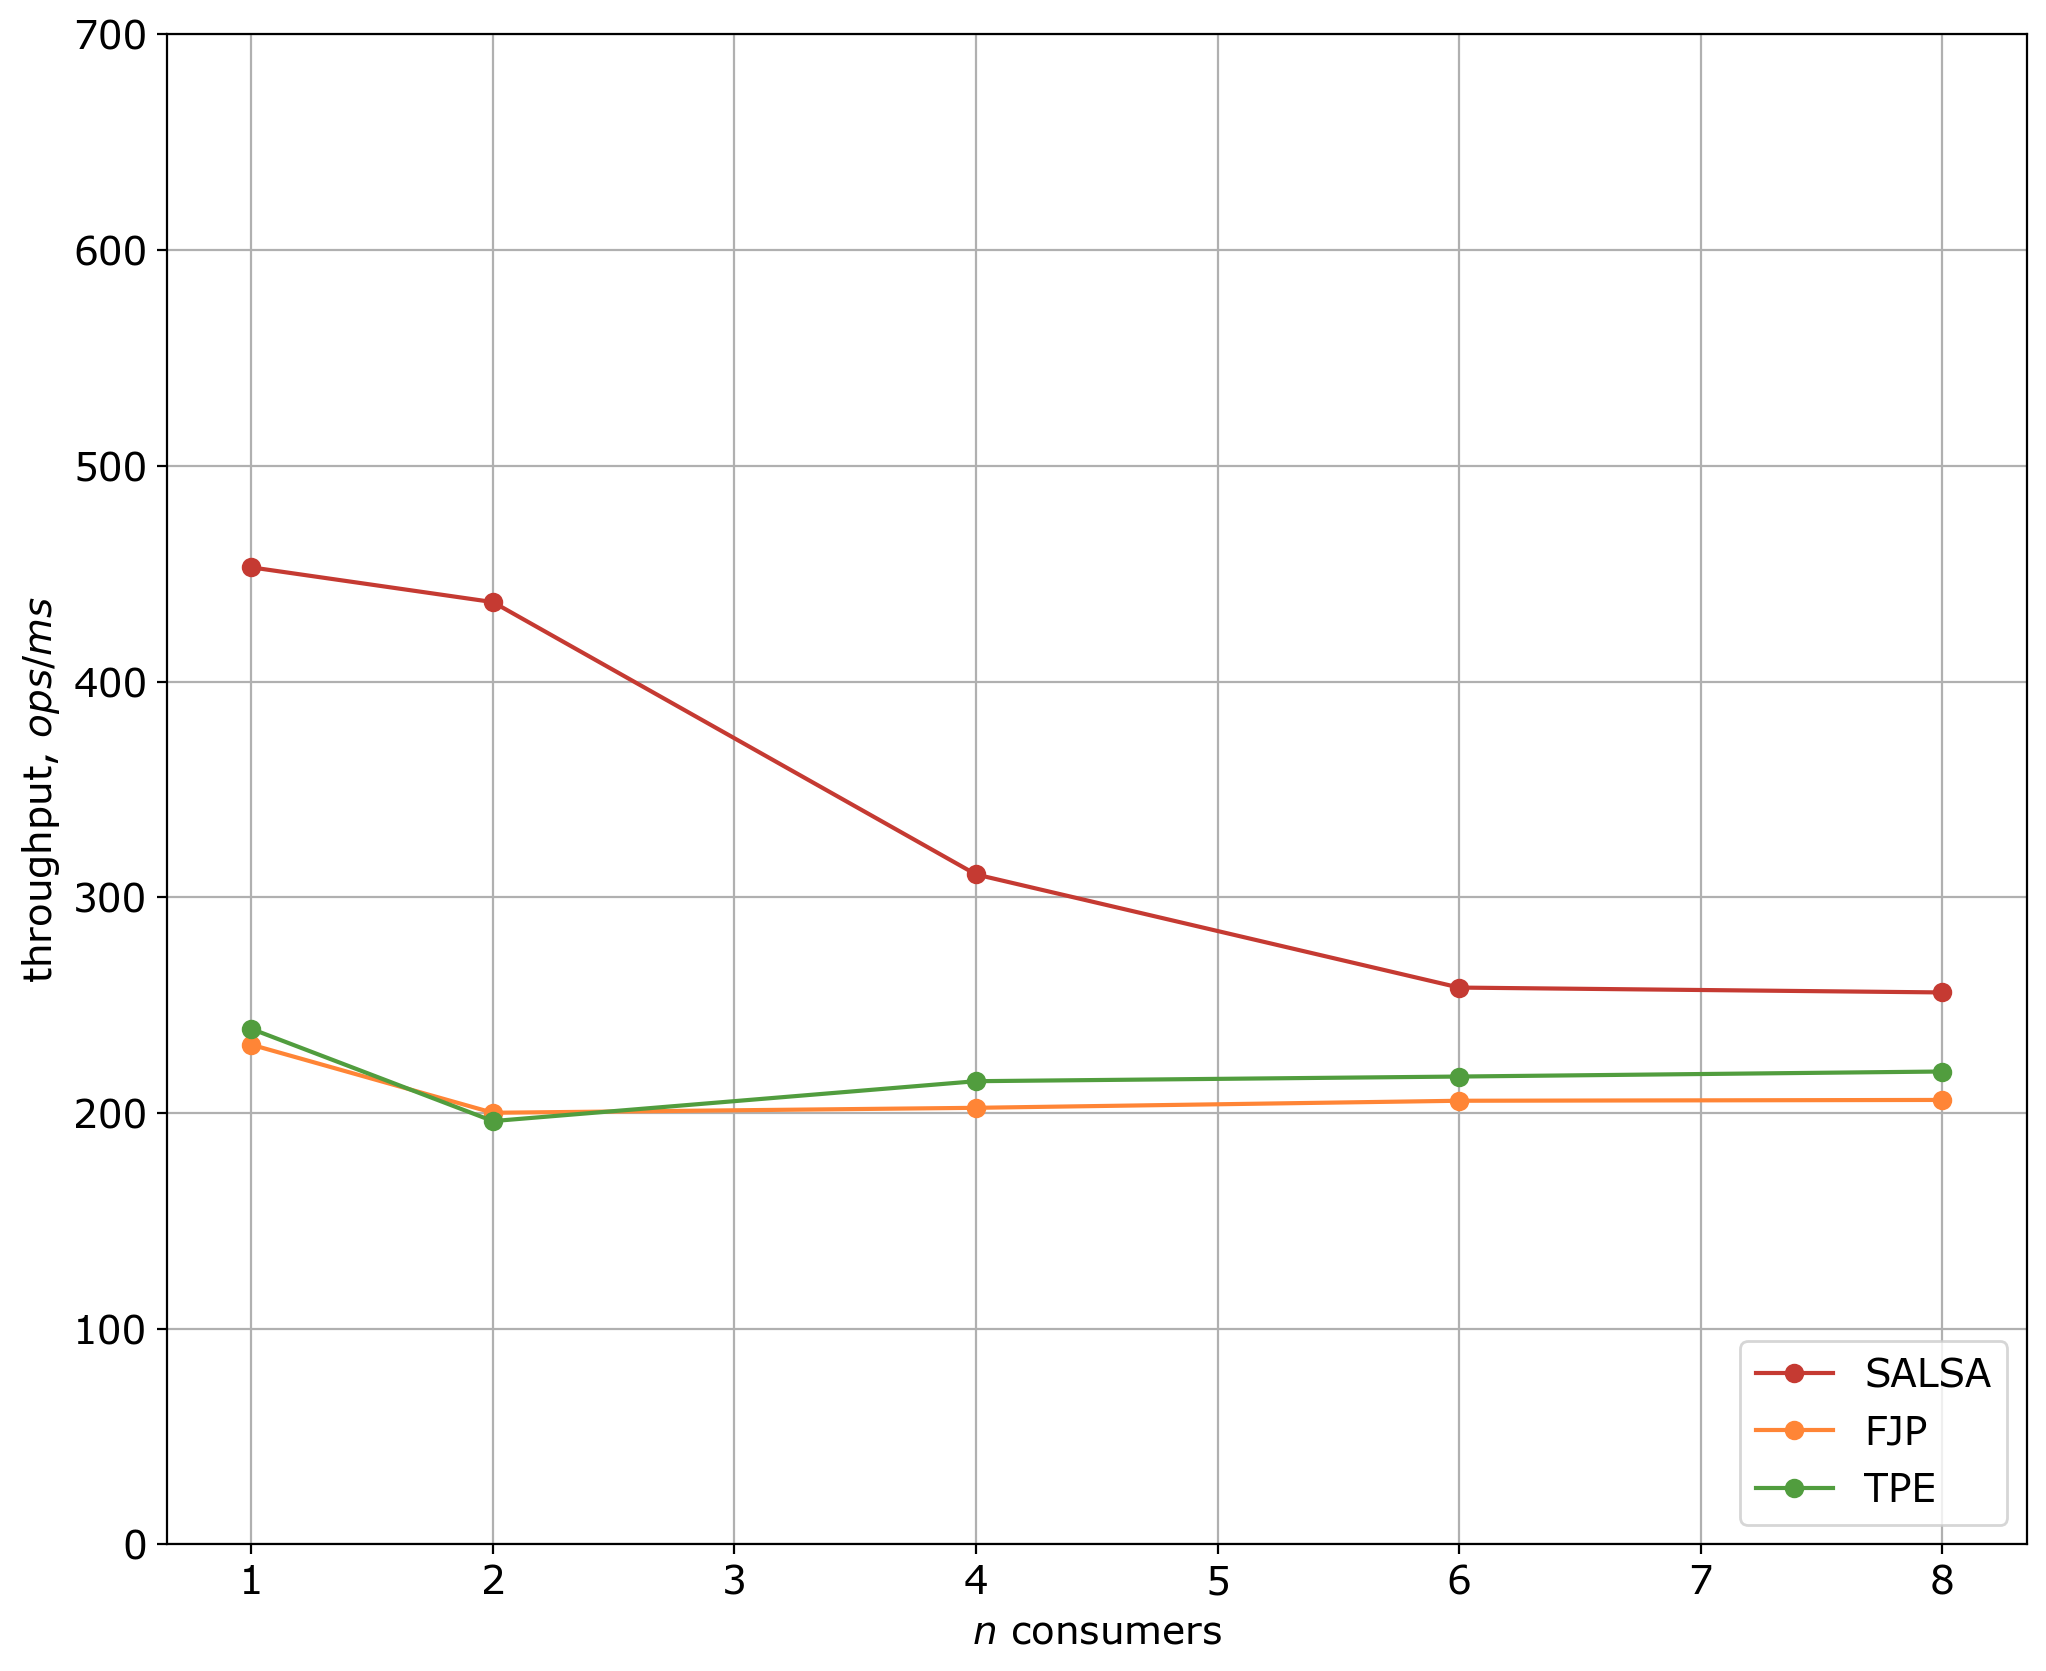

In [317]:
plot_combined_cons(df, 2)

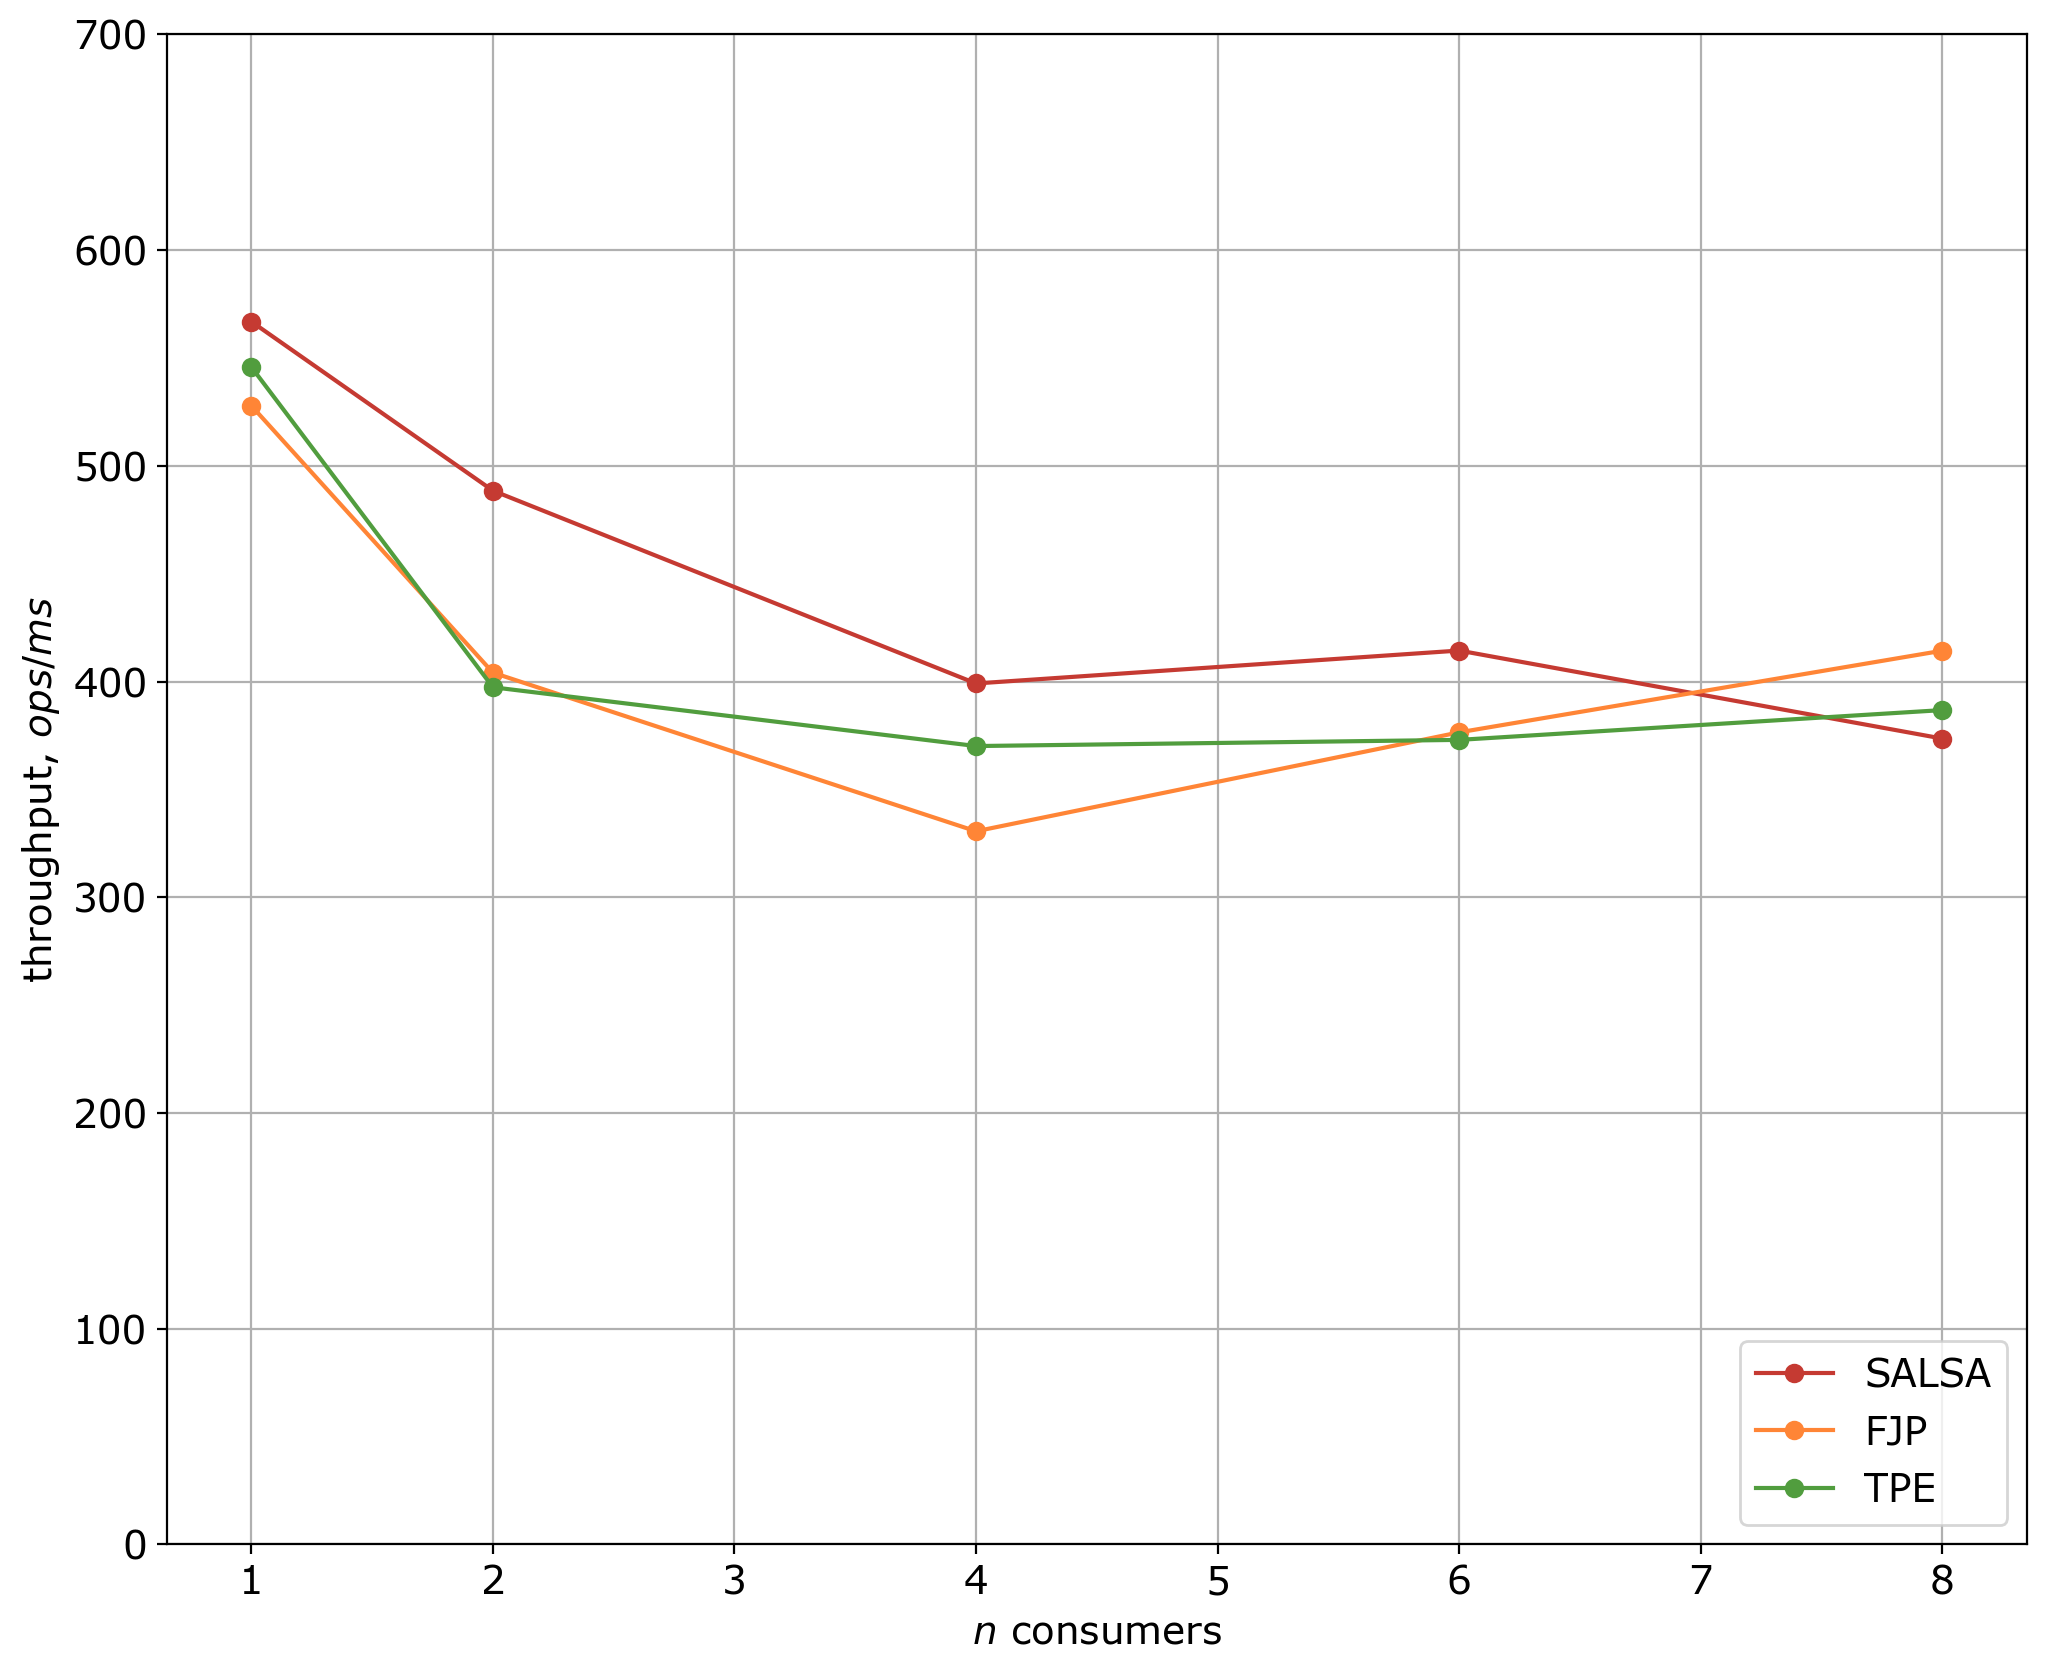

In [318]:
plot_combined_cons(df, 4)

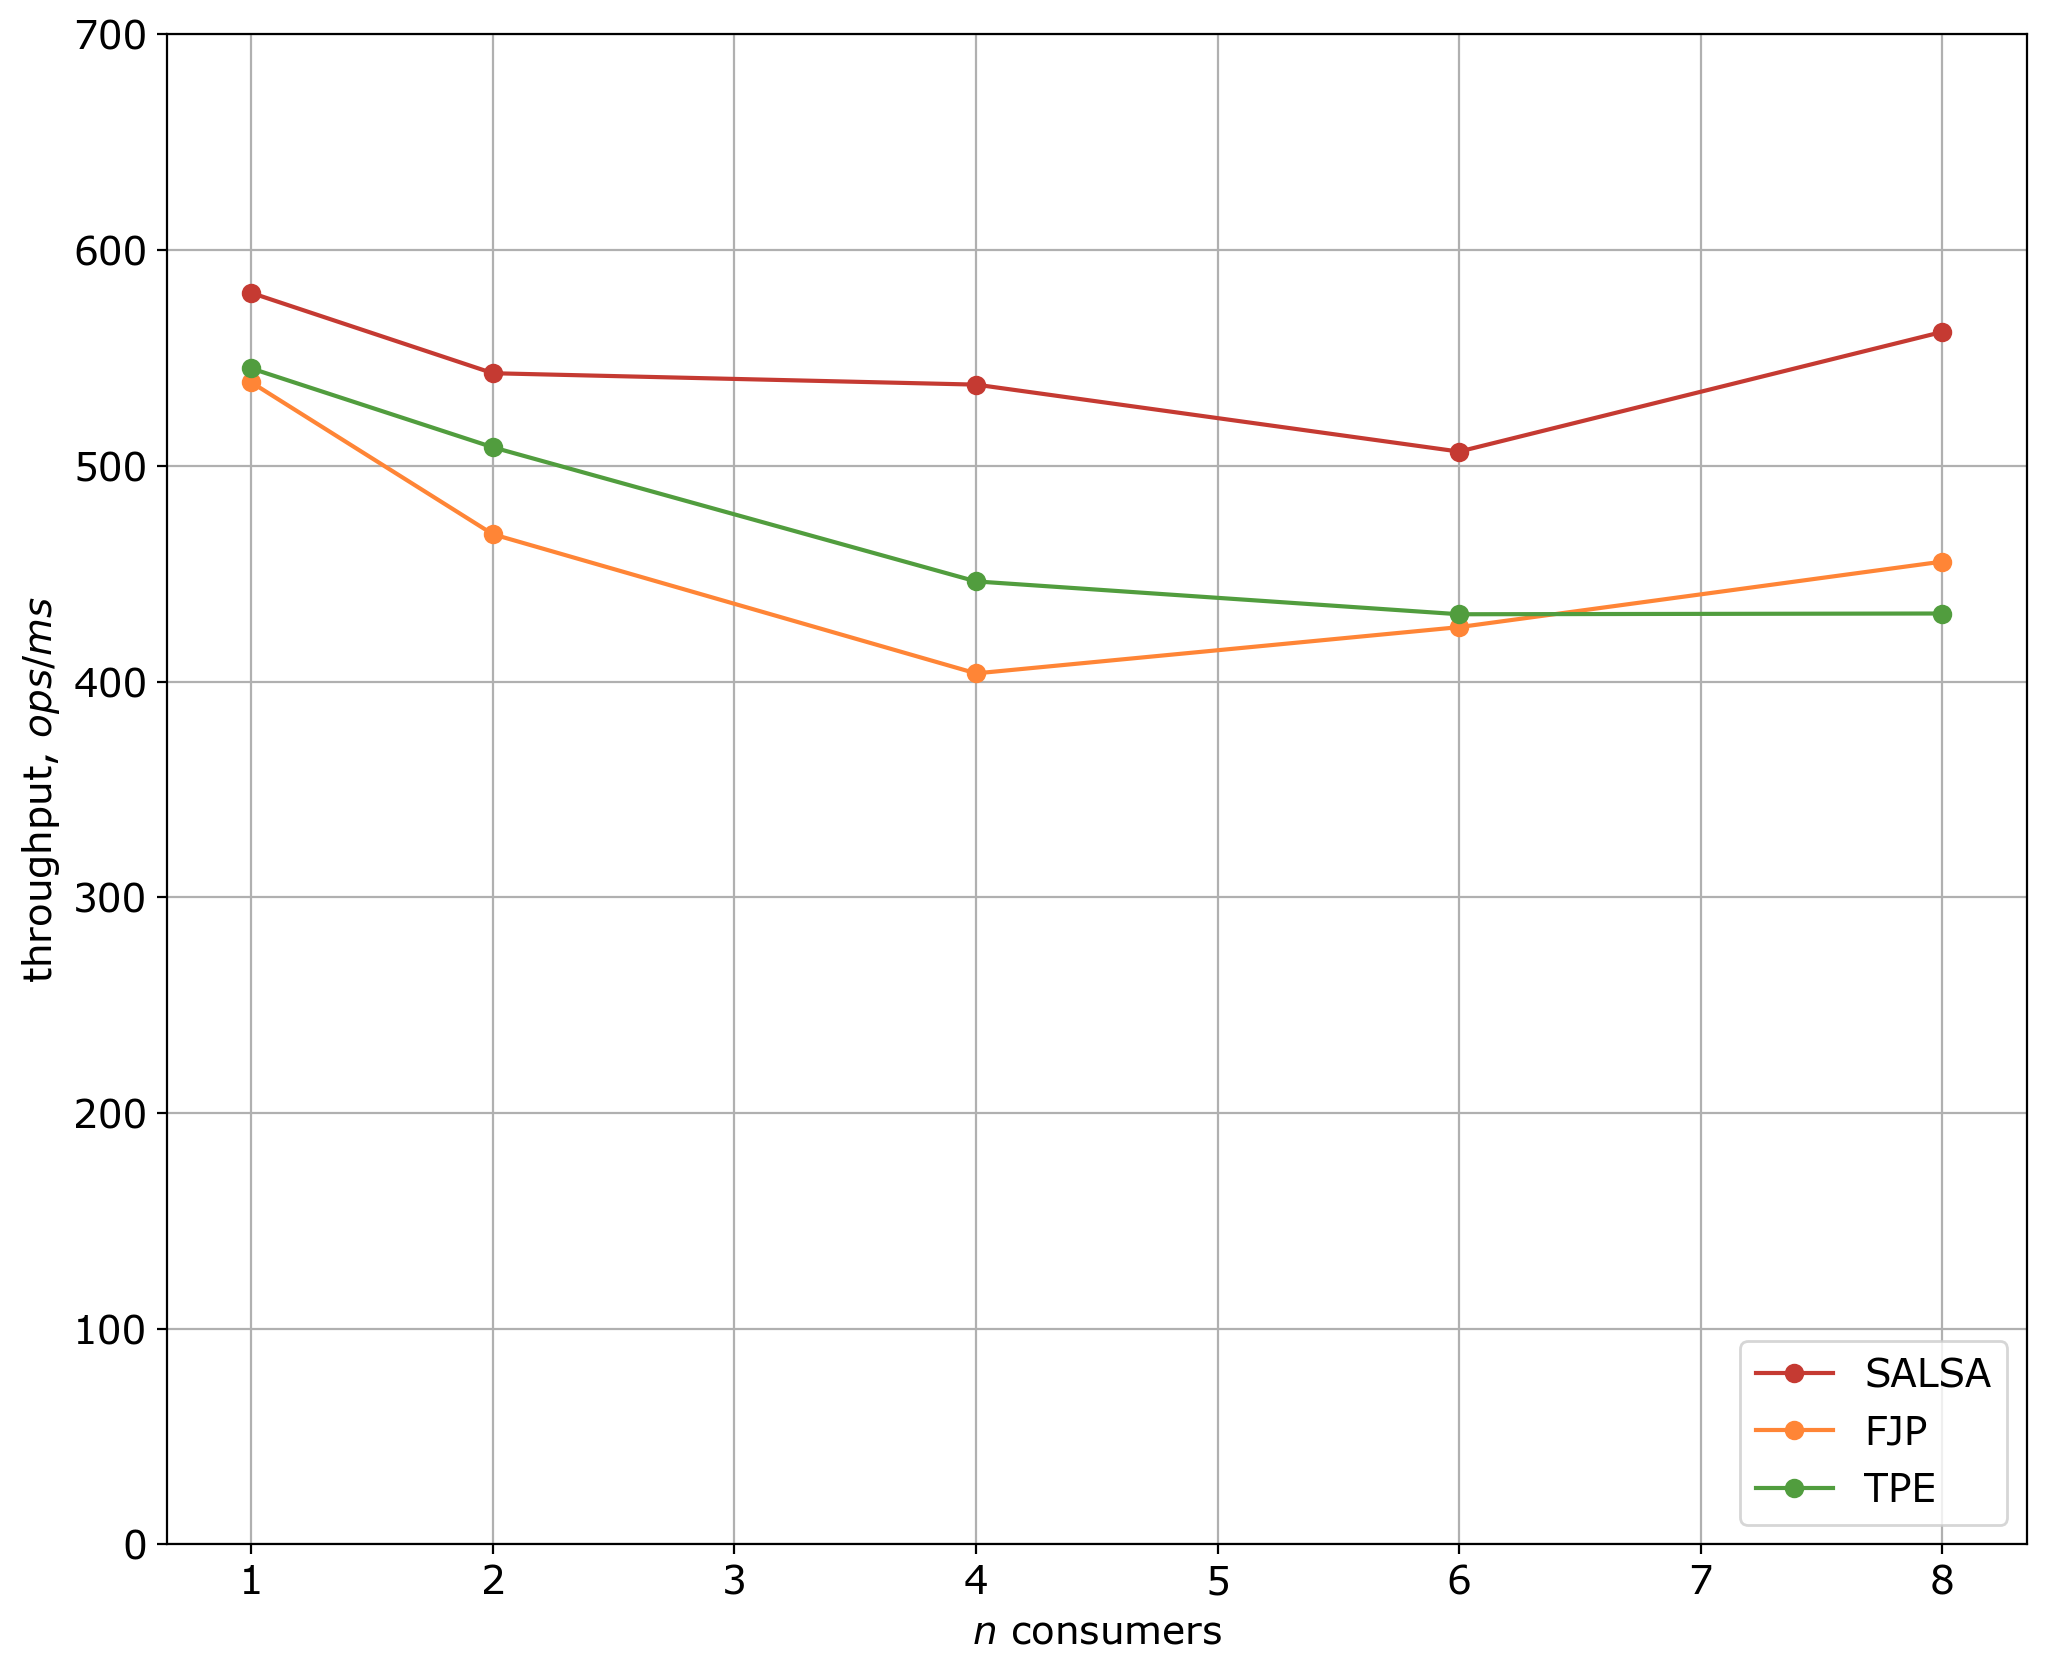

In [319]:
plot_combined_cons(df, 6)

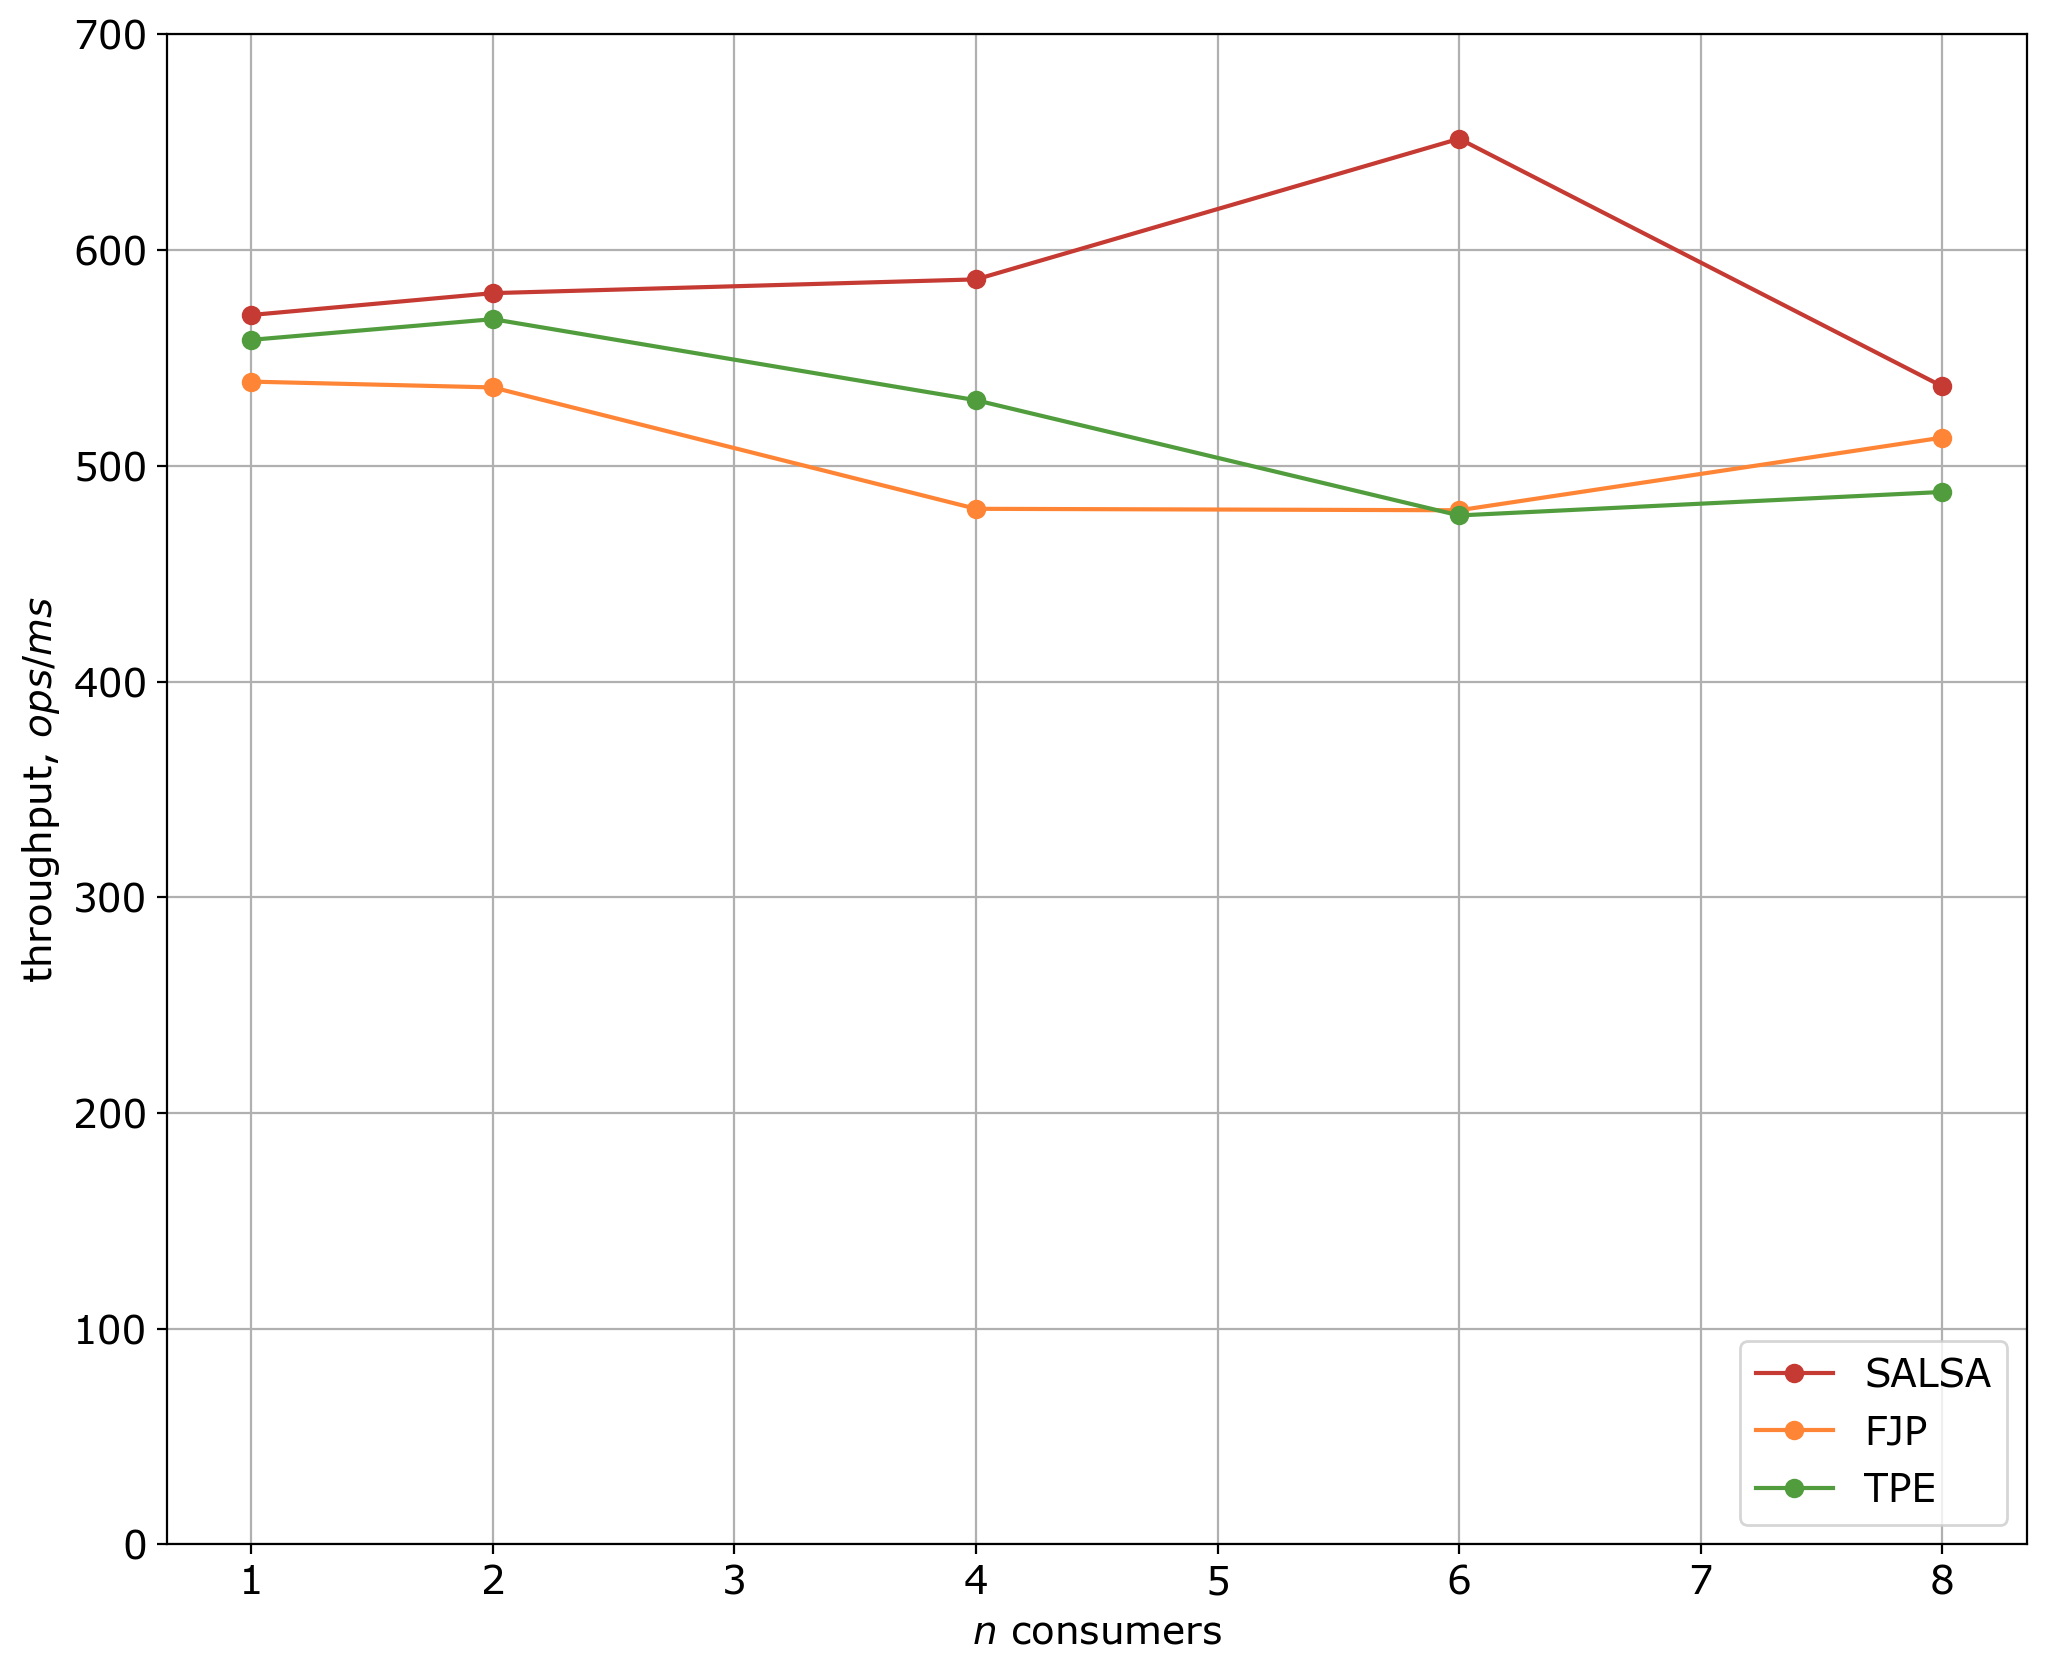

In [320]:
plot_combined_cons(df, 8)

In [341]:
def plot_salsa_balanced(df):
    x = ["1/1", "2/2", "4/4", "6/6", "8/8"]
    ys = []
    ys_labels = ["SALSA", "FJP", "TPE"]
    colors = ["#C53A32", "#FF8536", "#519D3E"]
    
    salsa_df = filter_balanced(filter_salsa_type(df, "0", "100", "1"))
    ys.append(list(salsa_df["Score"].to_numpy()))
    
    fjp_df = filter_balanced(filter_type(df, "FJP"))
    ys.append(list(fjp_df["Score"].to_numpy()))
    
    tpe_df = filter_balanced(filter_type(df, "TPE"))
    ys.append(list(tpe_df["Score"].to_numpy()))
    
    plot(x, ys, "$n$ threads (prod/cons)", ys_labels, colors, 0, 700)

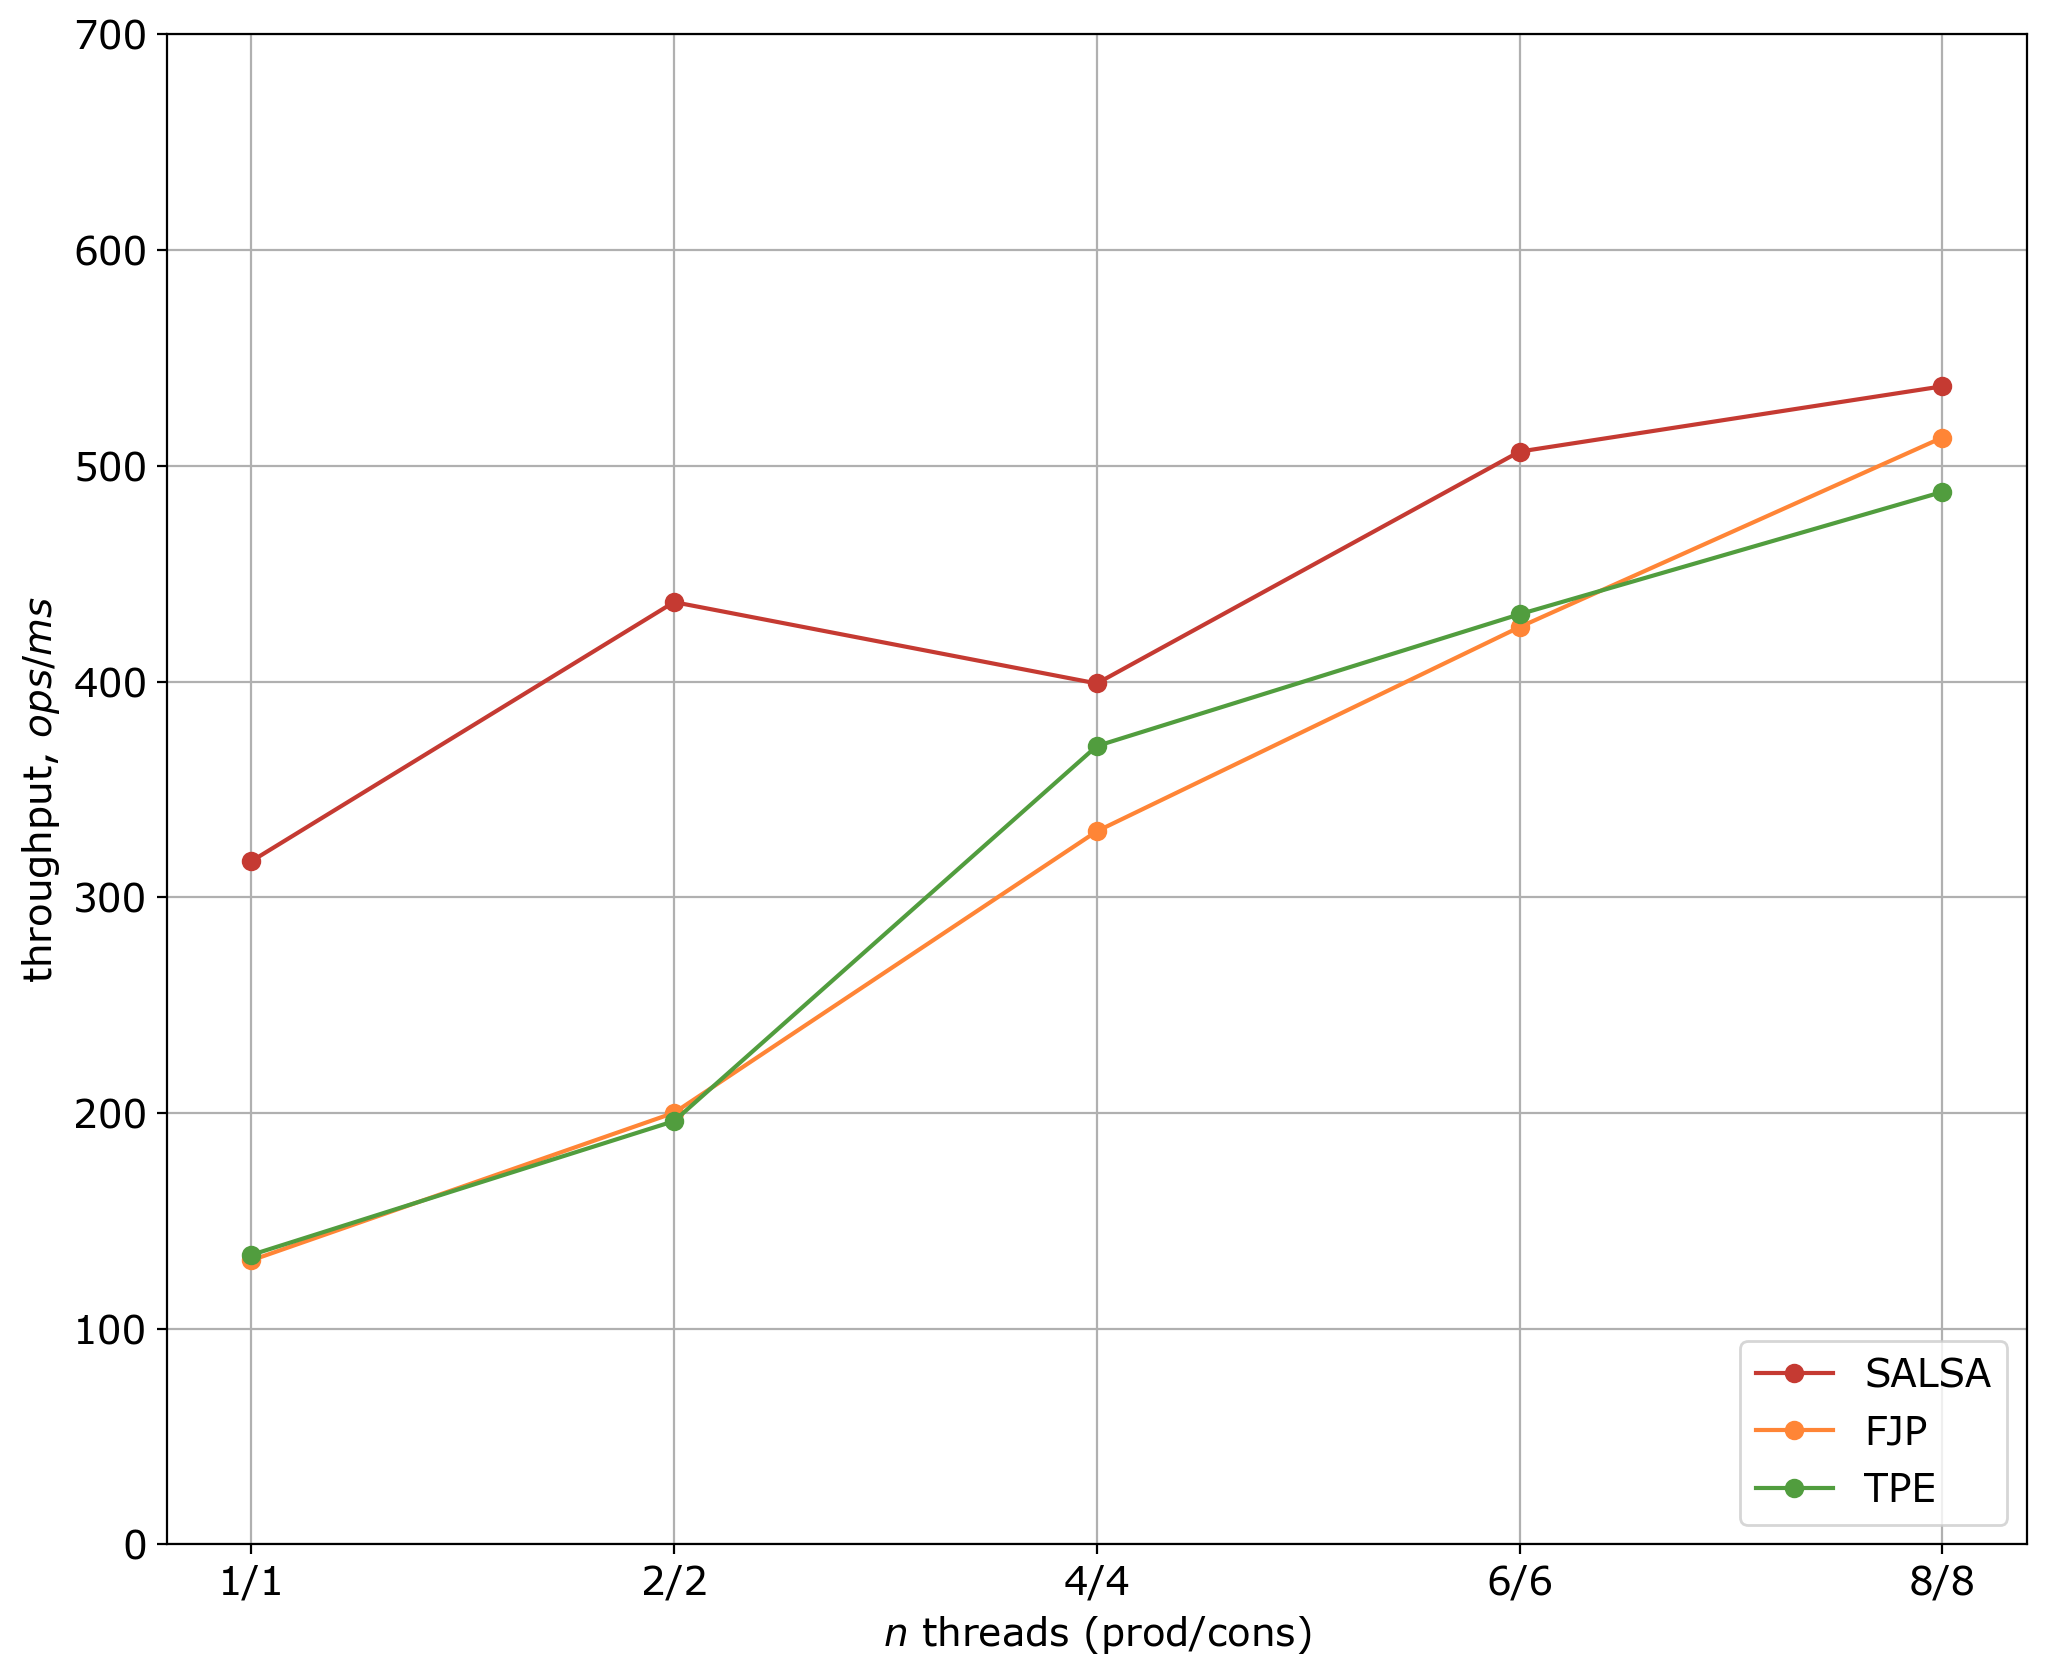

In [342]:
plot_salsa_balanced(df)